In [1]:
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from cartopy.mpl.gridliner import LATITUDE_FORMATTER, LONGITUDE_FORMATTER
import cftime
import datetime
from datetime import date
from matplotlib import pyplot
from matplotlib import colors
from matplotlib import font_manager
import matplotlib.colors as mcolors
from matplotlib.cm import ScalarMappable
import matplotlib.dates as mdates
import matplotlib.lines as mlines
import matplotlib.patches as mpatches
import matplotlib.ticker as mticker
from mpl_toolkits.mplot3d import Axes3D
import netCDF4
from netCDF4 import Dataset
import numpy
import os
import pandas
from PIL import Image
import random
import readline
import scipy
from scipy import fft
from scipy import linalg
from scipy import stats
from scipy.stats import poisson, ttest_ind
import seaborn
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.preprocessing import normalize
from statsmodels.tsa.ar_model import AutoReg
import xarray as xr

In [ ]:
# Plot Phase Space Distributions (Annual)
Fig = pyplot.figure(figsize=(16,25))
Phase_Distr_Plot(Control_1013hPa, "Control", False, True, 0, True, "")
Phase_Distr_Plot(RCP45_1013hPa, "RCP4.5", False, True, 1, False, "")
Phase_Distr_Plot(RCP85_1013hPa, "RCP8.5", False, True, 2, False, "")
Fig.savefig(Output_Diri+'Phase_Distr_Annual.png', bbox_inches='tight')

In [ ]:
# Plot Differences Between Phase Space Distributions (Annual)
Fig = pyplot.figure(figsize=(16,25))
Phase_Distr_Plot(Control_1013hPa, "Control", False, True, 0, True, "")
Phase_Diff_Plot(RCP45_1013hPa, Control_1013hPa, "RCP4.5", "Control", False, True, 1, True, "")
Phase_Diff_Plot(RCP85_1013hPa, Control_1013hPa, "RCP8.5", "Control", False, True, 2, False, "")
Fig.savefig(Output_Diri+'Phase_Diff_Annual.png', bbox_inches='tight')

In [ ]:
#
# Calculate ET Locations Annual
#    else:
#        if Model == "Control":
#            Num_Year = 90
#        else:
#            Num_Year = 93
#        Begin_Annual = Begin_Count_Mean / Num_Year * 100
#        Compl_Annual = Compl_Count_Mean / Num_Year * 100
#        return (Begin_Annual, Compl_Annual)

In [ ]:
# Plot ET Initiation and Completion Spatial Distributions (Annual)
Fig = pyplot.figure(figsize=(18,14))
ET_Distr_Plot(Control_ET, "Control", False, True, 0, True)
ET_Distr_Plot(RCP45_ET, "RCP4.5", False, True, 1, False)
ET_Distr_Plot(RCP85_ET, "RCP8.5", False, True, 2, False)
Fig.tight_layout()
Fig.savefig(Output_Diri+'ET_Distr_Annual.png', bbox_inches='tight')

In [ ]:
# Plot Differences Between ET Initiation and Completion Spatial Distributions (Annual)
Fig = pyplot.figure(figsize=(18,14))
ET_Distr_Plot(Control_ET, "Control", False, True, 0, True)
ET_Diff_Plot(RCP45_ET, Control_ET, "RCP4.5", "Control", False, True, 1, True)
ET_Diff_Plot(RCP85_ET, Control_ET, "RCP8.5", "Control", False, True, 2, False)
Fig.tight_layout()
Fig.savefig(Output_Diri+'ET_Diff_Annual.png', bbox_inches='tight')

In [15]:
# Phase Space Distribution For Control Run (Relative)
Control_VLT_B_Rela, Control_VLT_VUT_Rela = Phase_Space_Distribution(Control_Data, VLT_Bins, B_Bins, "Control", True)
# Phase Space Distribution For RCP4.5 Run (Relative)
RCP45_VLT_B_Rela, RCP45_VLT_VUT_Rela = Phase_Space_Distribution(RCP45_Data, VLT_Bins, B_Bins, "RCP4.5", True)
# Phase Space Distribution For RCP8.5 Run (Relative)
RCP85_VLT_B_Rela, RCP85_VLT_VUT_Rela = Phase_Space_Distribution(RCP85_Data, VLT_Bins, B_Bins, "RCP8.5", True)

In [16]:
# Phase Space Distribution For Control Run (Annual)
Control_VLT_B_Annual, Control_VLT_VUT_Annual = Phase_Space_Distribution(Control_Data, VLT_Bins, B_Bins, "Control", False)
# Phase Space Distribution For RCP4.5 Run (Annual)
RCP45_VLT_B_Annual, RCP45_VLT_VUT_Annual = Phase_Space_Distribution(RCP45_Data, VLT_Bins, B_Bins, "RCP4.5", False)
# Phase Space Distribution For RCP8.5 Run (Annual)
RCP85_VLT_B_Annual, RCP85_VLT_VUT_Annual = Phase_Space_Distribution(RCP85_Data, VLT_Bins, B_Bins, "RCP8.5", False)

In [47]:
# Create Subset of Data: Below 25N Latitude
Control_25N_Below = Control_Data[Control_Data["Lat"] < 25].reset_index()
RCP45_25N_Below = RCP45_Data[RCP45_Data["Lat"] < 25].reset_index()
RCP85_25N_Below = RCP85_Data[RCP85_Data["Lat"] < 25].reset_index()

In [48]:
# Phase Space Distribution For Control Run (Relative)
Control_VLT_B_25N_Below, Control_VLT_VUT_25N_Below = Phase_Space_Distribution(Control_25N_Below, VLT_Bins, B_Bins, "Control", True)
# Phase Space Distribution For RCP4.5 Run (Relative)
RCP45_VLT_B_25N_Below, RCP45_VLT_VUT_25N_Below = Phase_Space_Distribution(RCP45_25N_Below, VLT_Bins, B_Bins, "RCP4.5", True)
# Phase Space Distribution For RCP8.5 Run (Relative)
RCP85_VLT_B_25N_Below, RCP85_VLT_VUT_25N_Below = Phase_Space_Distribution(RCP85_25N_Below, VLT_Bins, B_Bins, "RCP8.5", True)

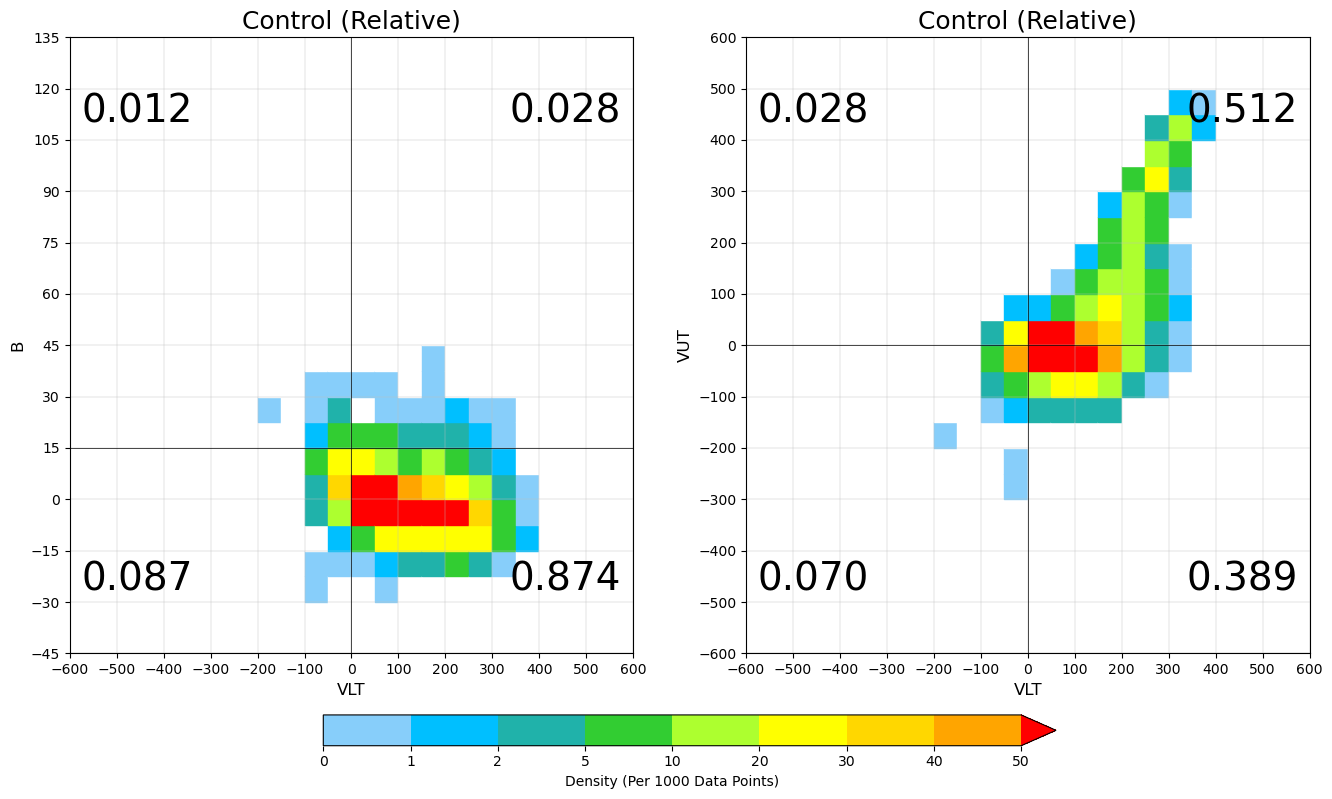

In [49]:
# Plot Relative Phase Space Distribution For Control Run
Fig = Phase_Distr_Plot(Control_VLT_B_25N_Below, Control_VLT_VUT_25N_Below, "Control", True, True, \
"Control_Phase_Distr_25N_Below")

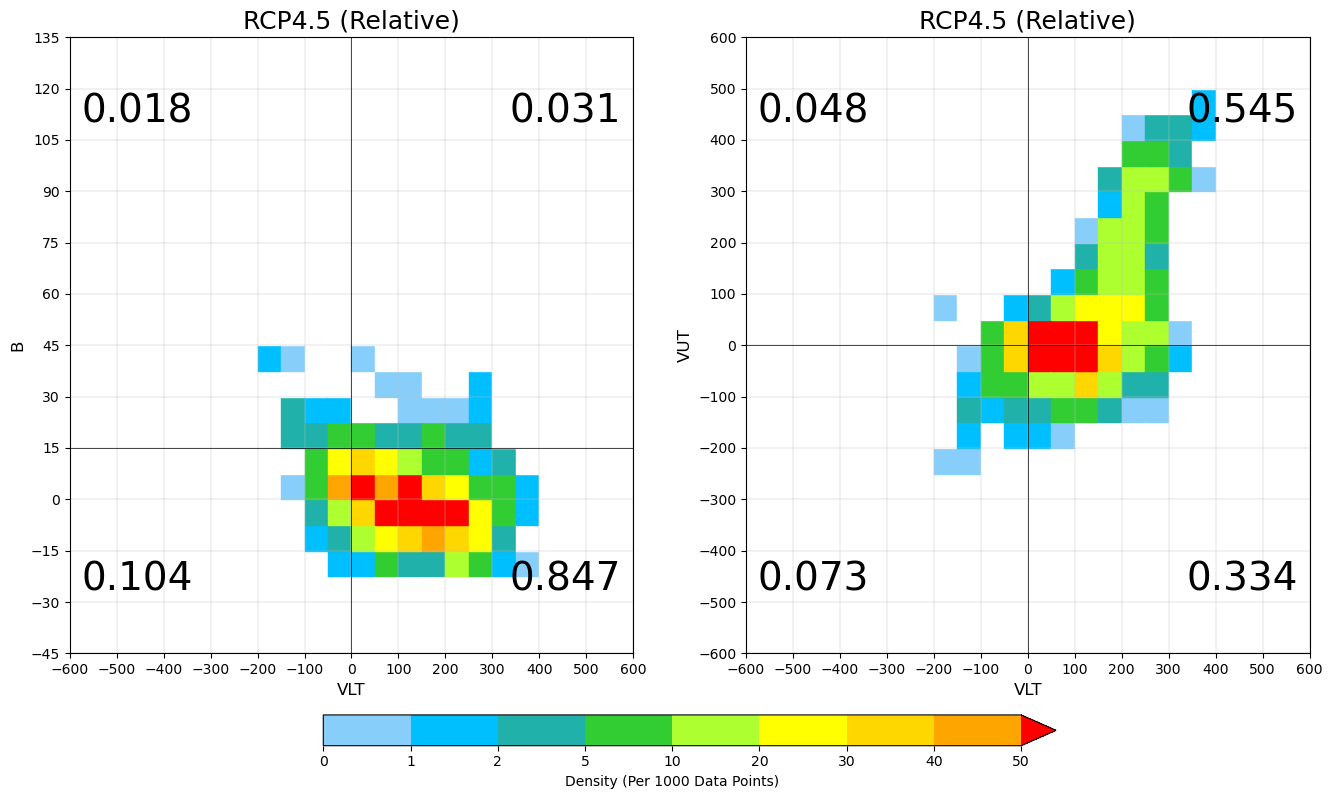

In [50]:
# Plot Relative Phase Space Distribution For RCP4.5 Run
Fig = Phase_Distr_Plot(RCP45_VLT_B_25N_Below, RCP45_VLT_VUT_25N_Below, "RCP4.5", True, False, "")

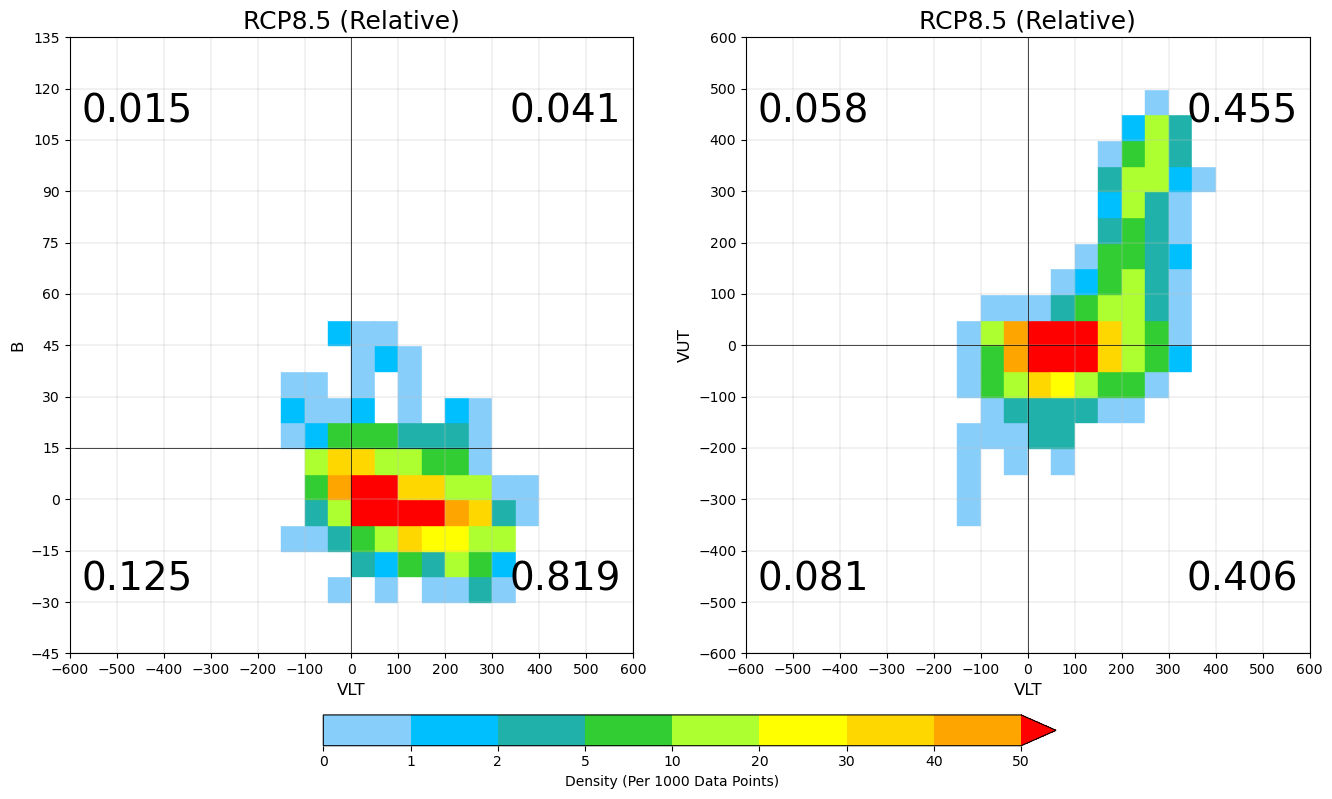

In [51]:
# Plot Relative Phase Space Distribution For RCP8.5 Run
Fig = Phase_Distr_Plot(RCP85_VLT_B_25N_Below, RCP85_VLT_VUT_25N_Below, "RCP8.5", True, False, "")

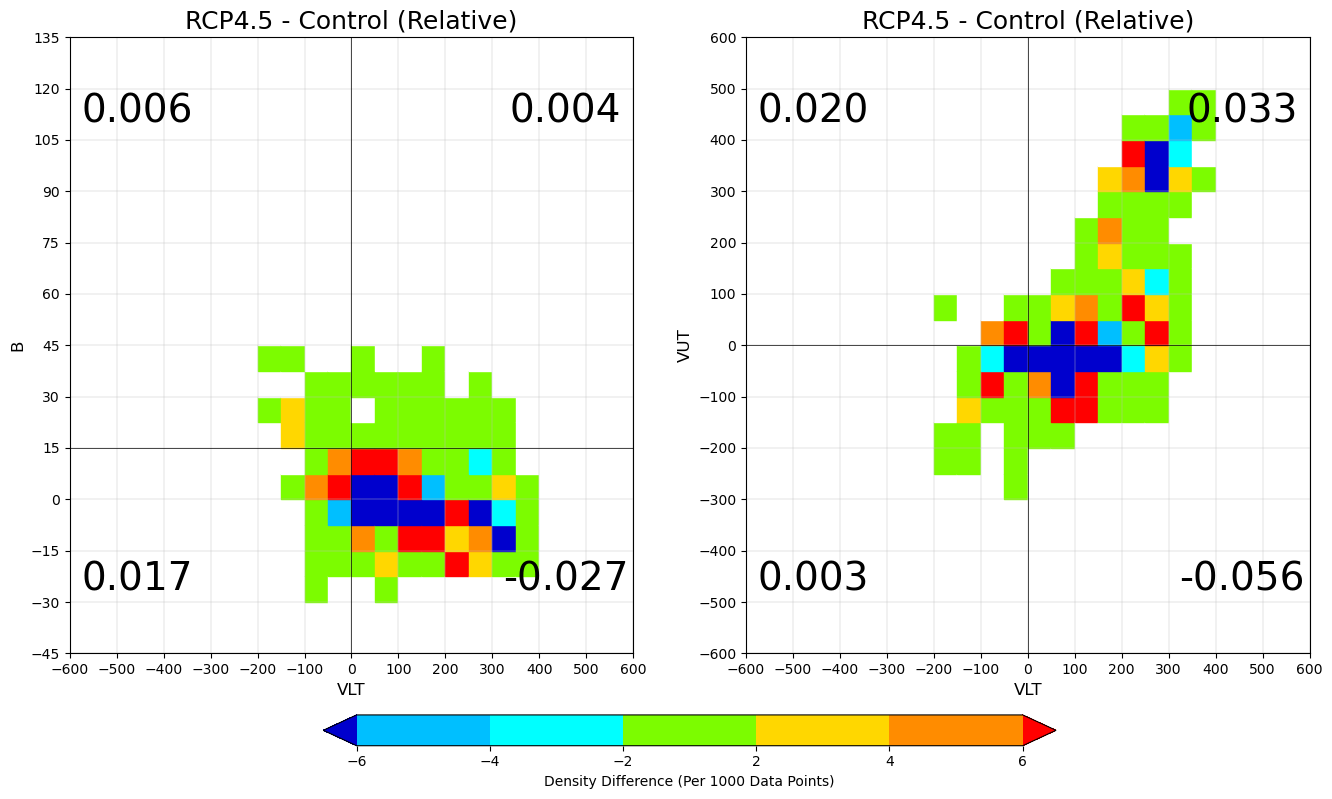

In [52]:
# Plot Relative Difference Between Phase Space Distributions of RCP4.5 - Control
Phase_Diff_Plot("RCP4.5", "Control", RCP45_VLT_B_25N_Below, RCP45_VLT_VUT_25N_Below, Control_VLT_B_25N_Below, Control_VLT_VUT_25N_Below, \
True, True, "RCP45-Control_Phase_Diff_25N_Below")

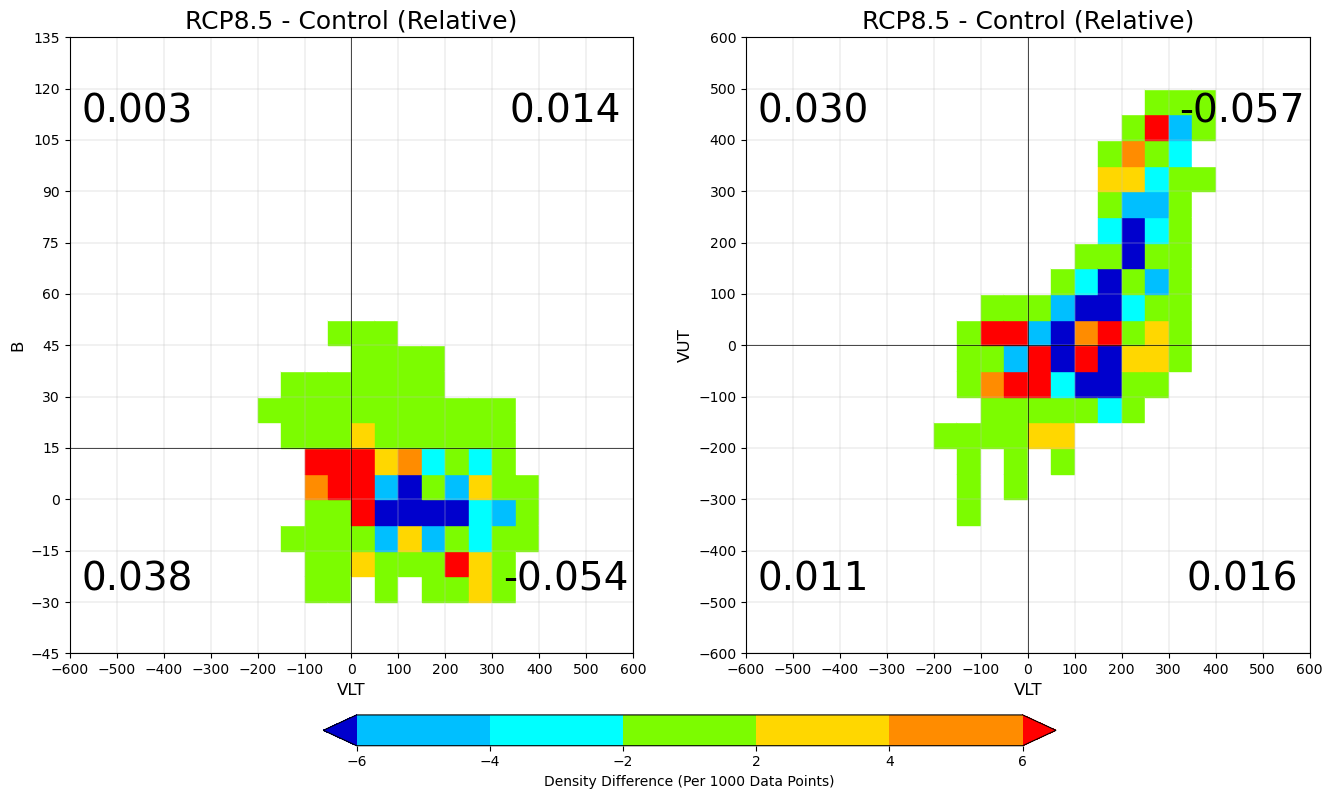

In [53]:
# Plot Relative Difference Between Phase Space Distributions of RCP8.5 - Control
Phase_Diff_Plot("RCP8.5", "Control", RCP85_VLT_B_25N_Below, RCP85_VLT_VUT_25N_Below, Control_VLT_B_25N_Below, Control_VLT_VUT_25N_Below, \
True, True, "RCP85-Control_Phase_Diff_25N_Below")

In [54]:
# Create Subset of Data: 25~30N Latitude
Control_25_30N = Control_Data[(Control_Data["Lat"] >= 25) & (Control_Data["Lat"] < 30)].reset_index()
RCP45_25_30N = RCP45_Data[(RCP45_Data["Lat"] >= 25) & (RCP45_Data["Lat"] < 30)].reset_index()
RCP85_25_30N = RCP85_Data[(RCP85_Data["Lat"] >= 25) & (RCP85_Data["Lat"] < 30)].reset_index()

In [55]:
# Phase Space Distribution For Control Run (Relative)
Control_VLT_B_25_30N, Control_VLT_VUT_25_30N = Phase_Space_Distribution(Control_25_30N, VLT_Bins, B_Bins, "Control", True)
# Phase Space Distribution For RCP4.5 Run (Relative)
RCP45_VLT_B_25_30N, RCP45_VLT_VUT_25_30N = Phase_Space_Distribution(RCP45_25_30N, VLT_Bins, B_Bins, "RCP4.5", True)
# Phase Space Distribution For RCP8.5 Run (Relative)
RCP85_VLT_B_25_30N, RCP85_VLT_VUT_25_30N = Phase_Space_Distribution(RCP85_25_30N, VLT_Bins, B_Bins, "RCP8.5", True)

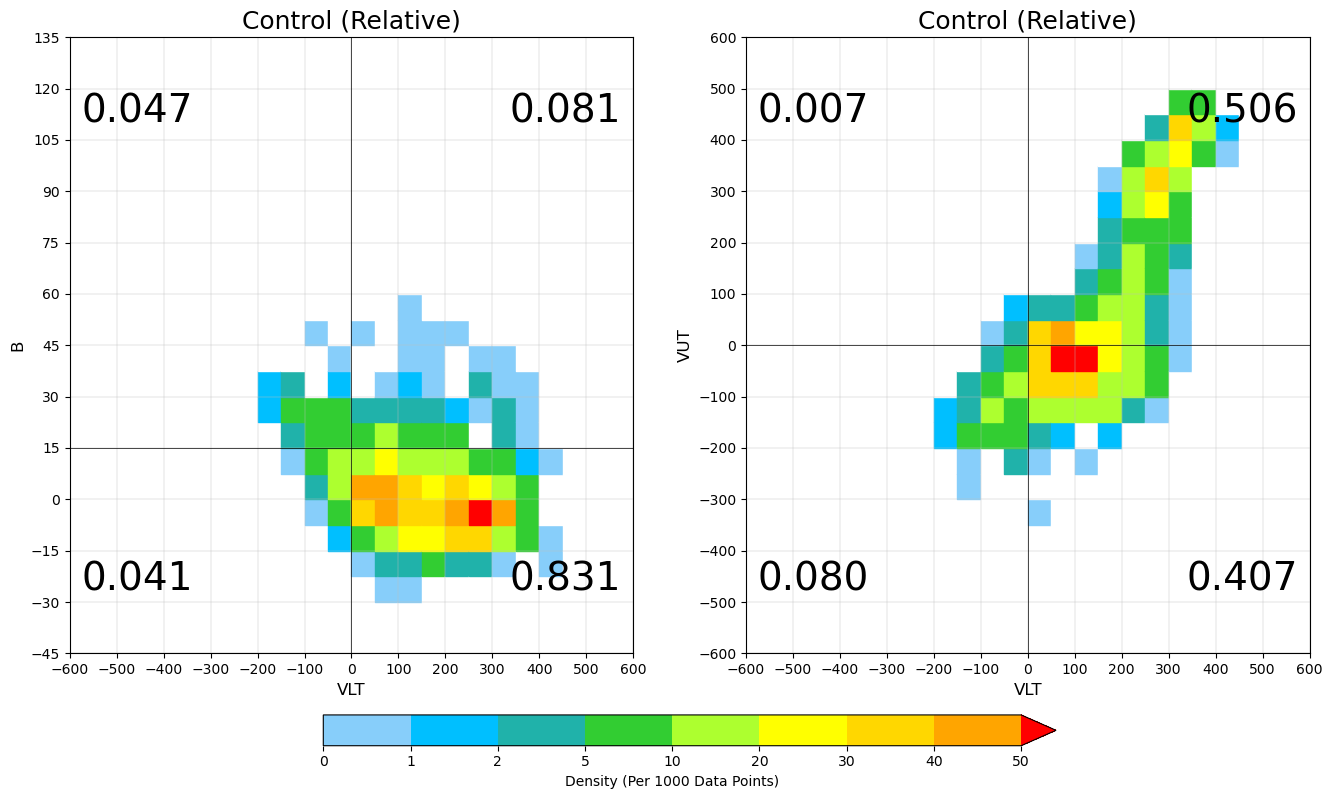

In [56]:
# Plot Relative Phase Space Distribution For Control Run
Fig = Phase_Distr_Plot(Control_VLT_B_25_30N, Control_VLT_VUT_25_30N, "Control", True, False, \
"Control_Phase_Distr_25_30N")

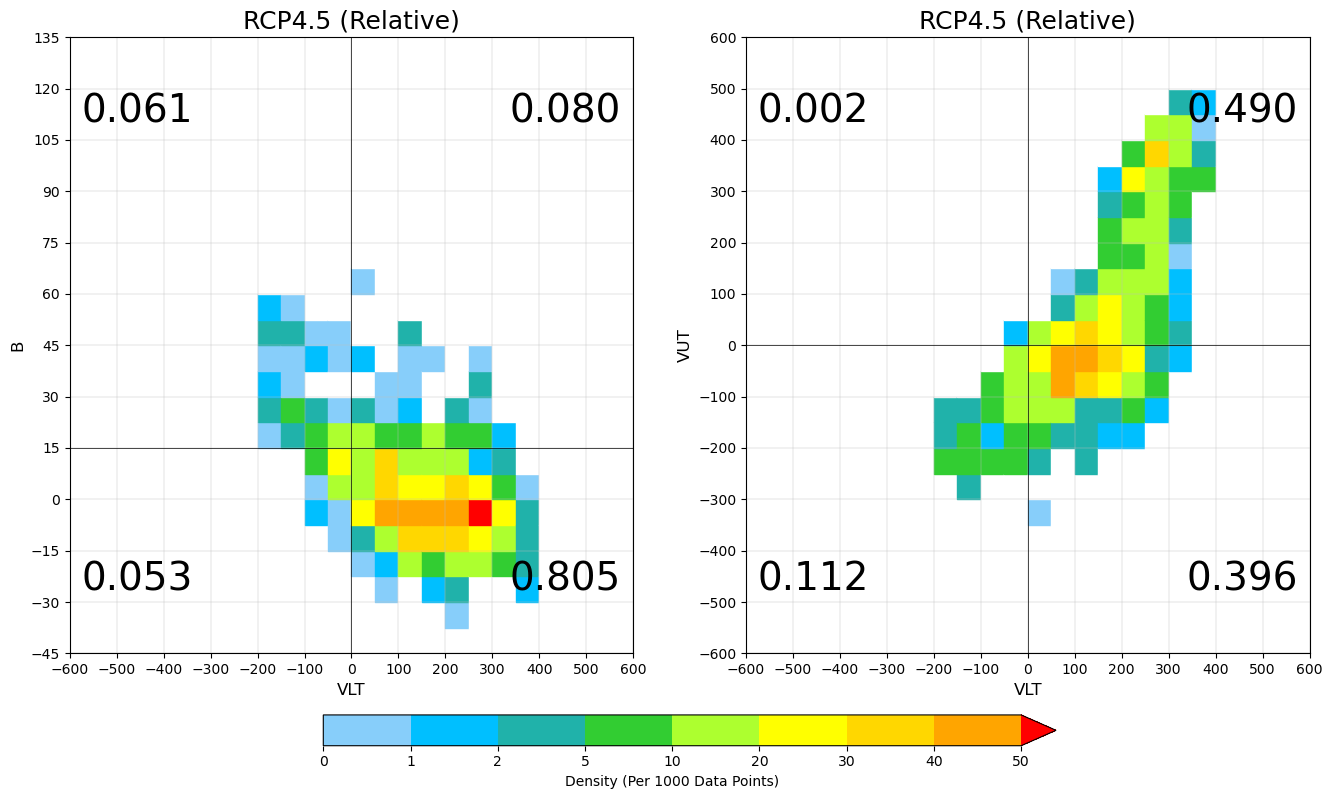

In [57]:
# Plot Relative Phase Space Distribution For RCP4.5 Run
Fig = Phase_Distr_Plot(RCP45_VLT_B_25_30N, RCP45_VLT_VUT_25_30N, "RCP4.5", True, False, "")

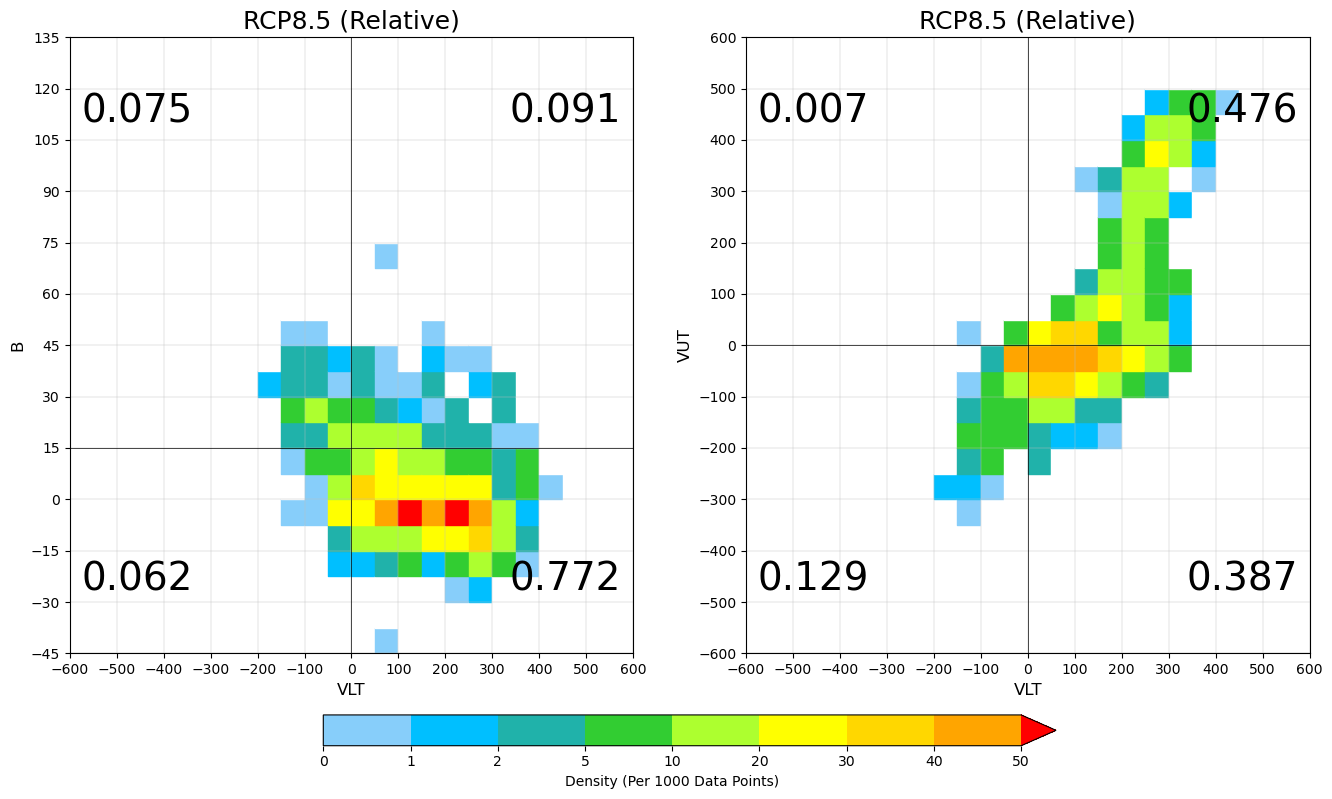

In [58]:
# Plot Relative Phase Space Distribution For RCP8.5 Run
Fig = Phase_Distr_Plot(RCP85_VLT_B_25_30N, RCP85_VLT_VUT_25_30N, "RCP8.5", True, False, "")

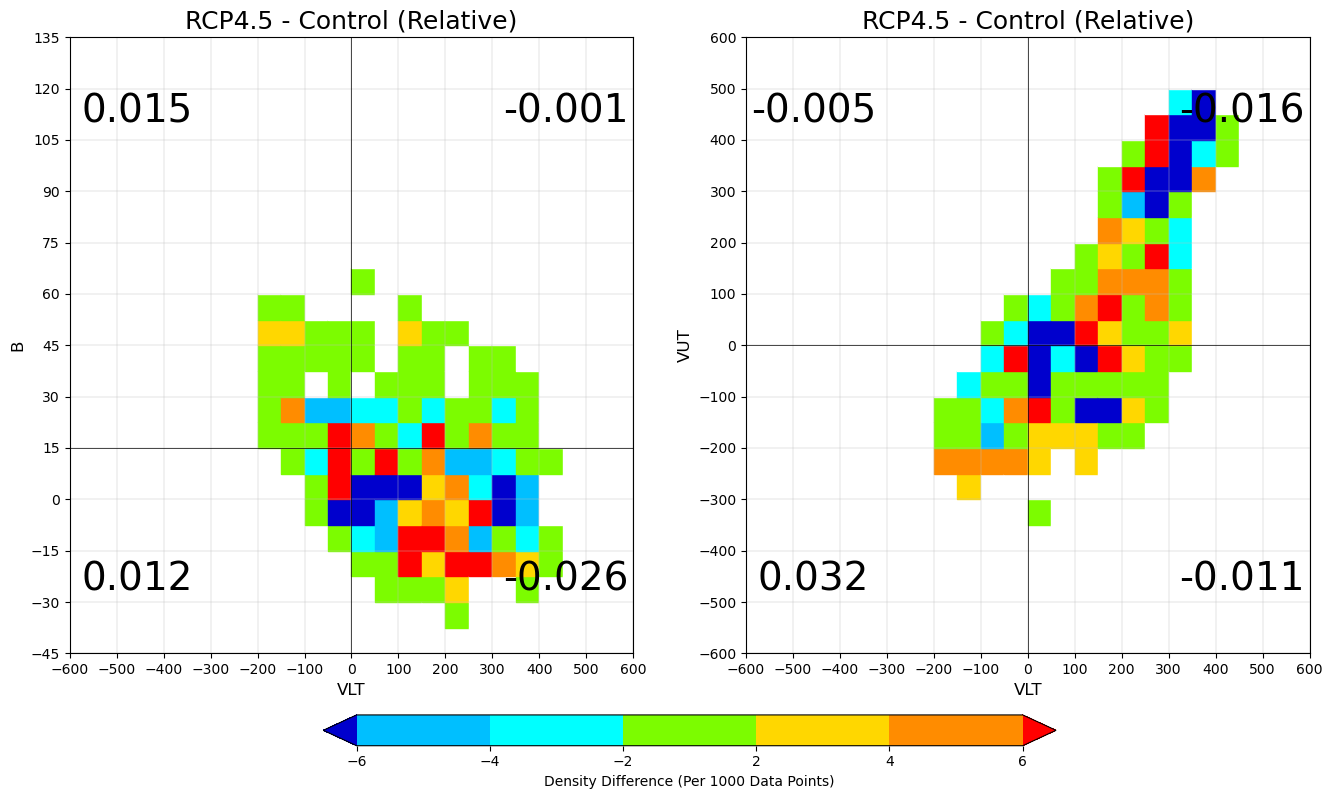

In [59]:
# Plot Relative Difference Between Phase Space Distributions of RCP4.5 - Control
Phase_Diff_Plot("RCP4.5", "Control", RCP45_VLT_B_25_30N, RCP45_VLT_VUT_25_30N, Control_VLT_B_25_30N, Control_VLT_VUT_25_30N, \
True, False, "RCP45-Control_Phase_Diff_25_30N")

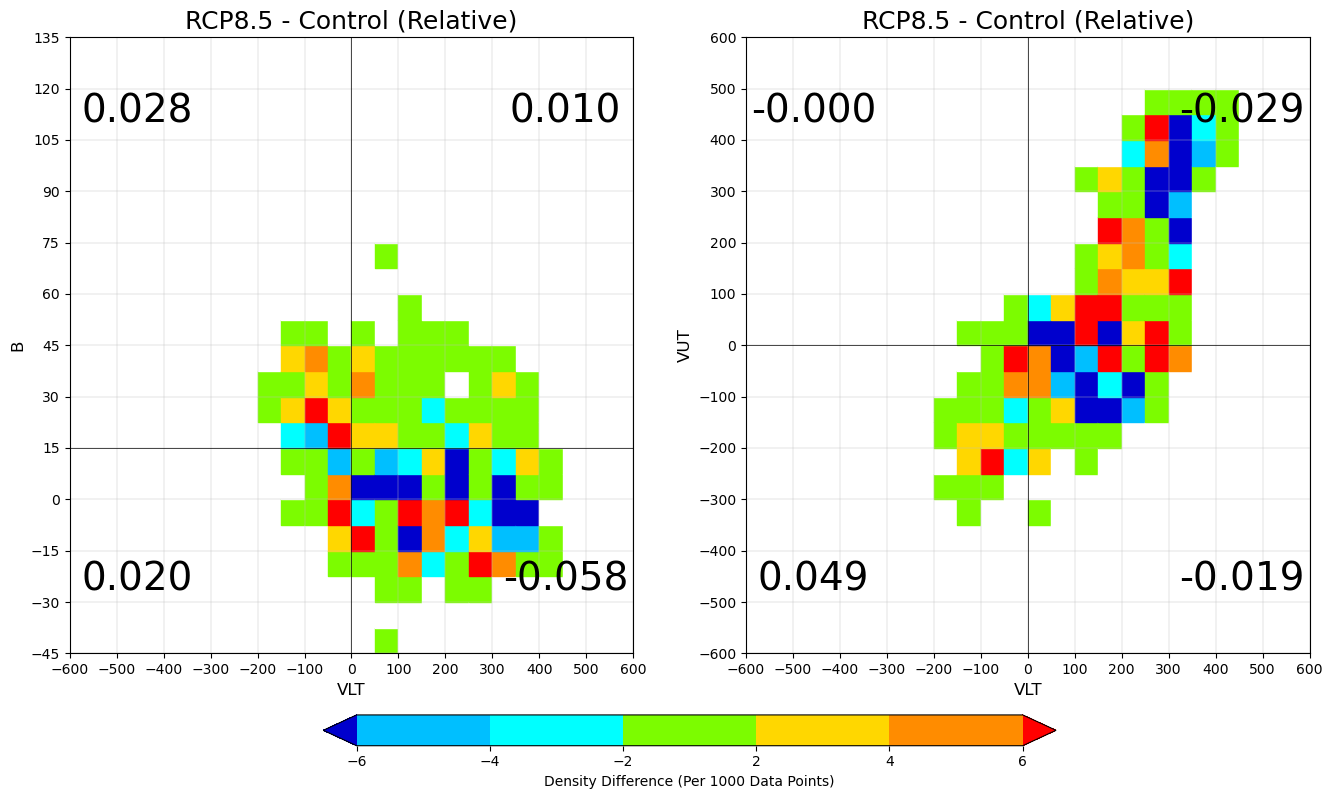

In [60]:
# Plot Relative Difference Between Phase Space Distributions of RCP8.5 - Control
Phase_Diff_Plot("RCP8.5", "Control", RCP85_VLT_B_25_30N, RCP85_VLT_VUT_25_30N, Control_VLT_B_25_30N, Control_VLT_VUT_25_30N, \
True, False, "RCP85-Control_Phase_Diff_25_30N")

In [61]:
# Create Subset of Data: 30~35N Latitude
Control_30_35N = Control_Data[(Control_Data["Lat"] >= 30) & (Control_Data["Lat"] < 35)].reset_index()
RCP45_30_35N = RCP45_Data[(RCP45_Data["Lat"] >= 30) & (RCP45_Data["Lat"] < 35)].reset_index()
RCP85_30_35N = RCP85_Data[(RCP85_Data["Lat"] >= 30) & (RCP85_Data["Lat"] < 35)].reset_index()

In [62]:
# Phase Space Distribution For Control Run (Relative)
Control_VLT_B_30_35N, Control_VLT_VUT_30_35N = Phase_Space_Distribution(Control_30_35N, VLT_Bins, B_Bins, "Control", True)
# Phase Space Distribution For RCP4.5 Run (Relative)
RCP45_VLT_B_30_35N, RCP45_VLT_VUT_30_35N = Phase_Space_Distribution(RCP45_30_35N, VLT_Bins, B_Bins, "RCP4.5", True)
# Phase Space Distribution For RCP8.5 Run (Relative)
RCP85_VLT_B_30_35N, RCP85_VLT_VUT_30_35N = Phase_Space_Distribution(RCP85_30_35N, VLT_Bins, B_Bins, "RCP8.5", True)

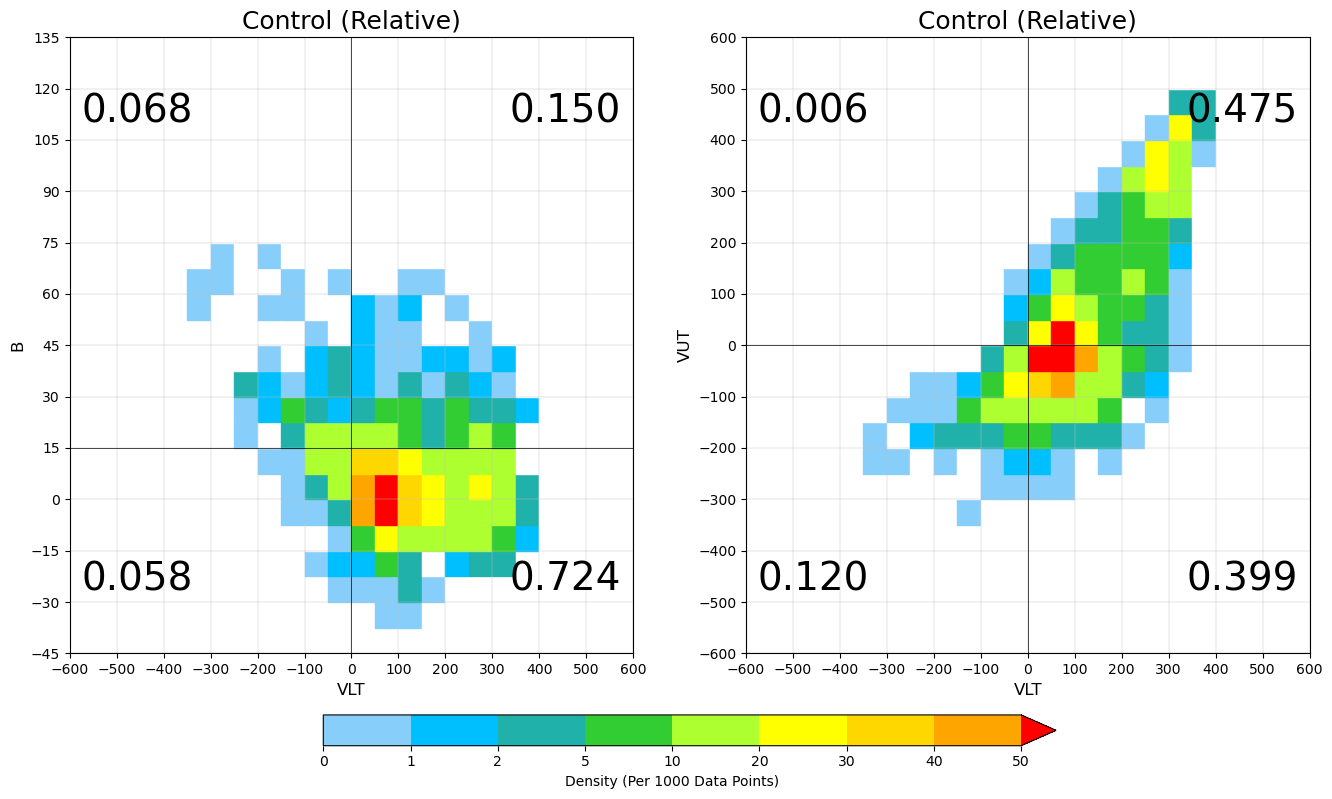

In [63]:
# Plot Relative Phase Space Distribution For Control Run
Fig = Phase_Distr_Plot(Control_VLT_B_30_35N, Control_VLT_VUT_30_35N, "Control", True, False, \
"Control_Phase_Distr_30_35N")

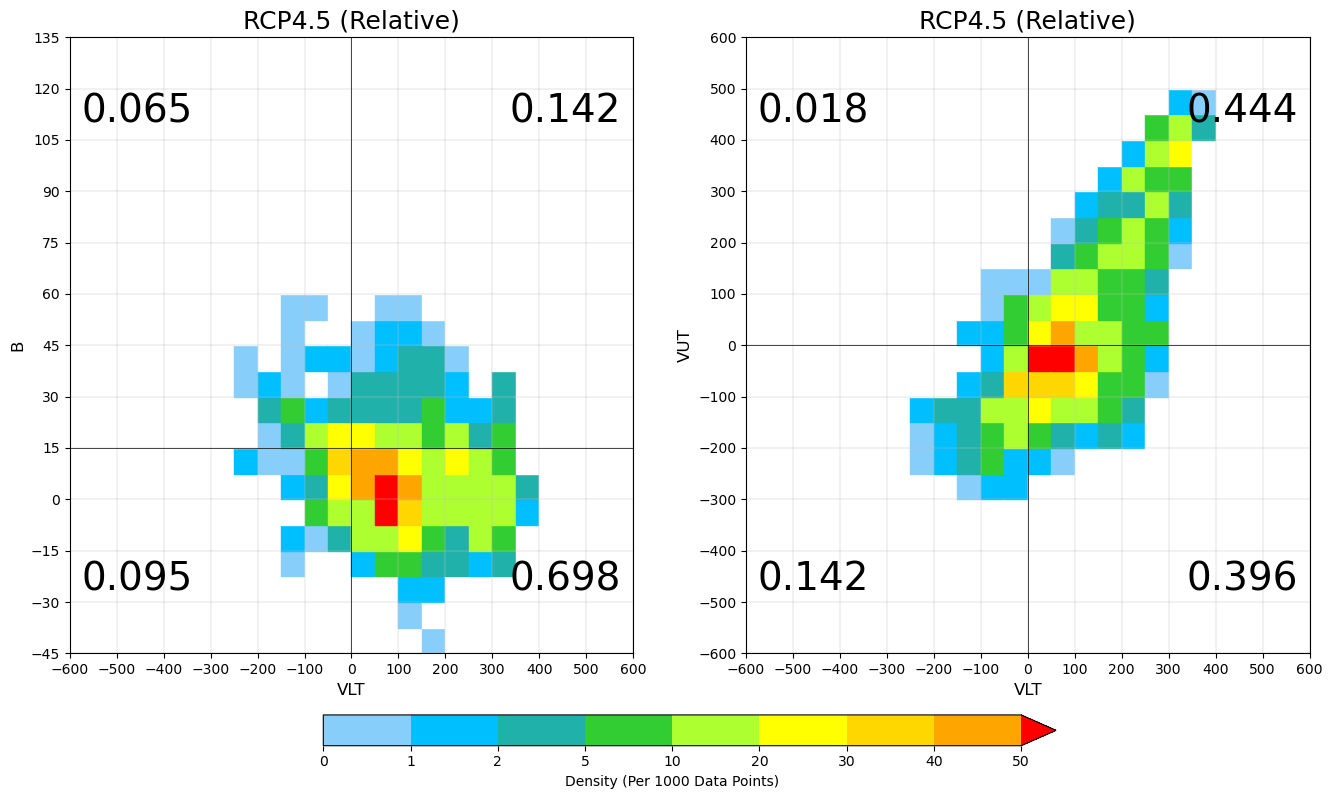

In [64]:
# Plot Relative Phase Space Distribution For RCP4.5 Run
Fig = Phase_Distr_Plot(RCP45_VLT_B_30_35N, RCP45_VLT_VUT_30_35N, "RCP4.5", True, False, "")

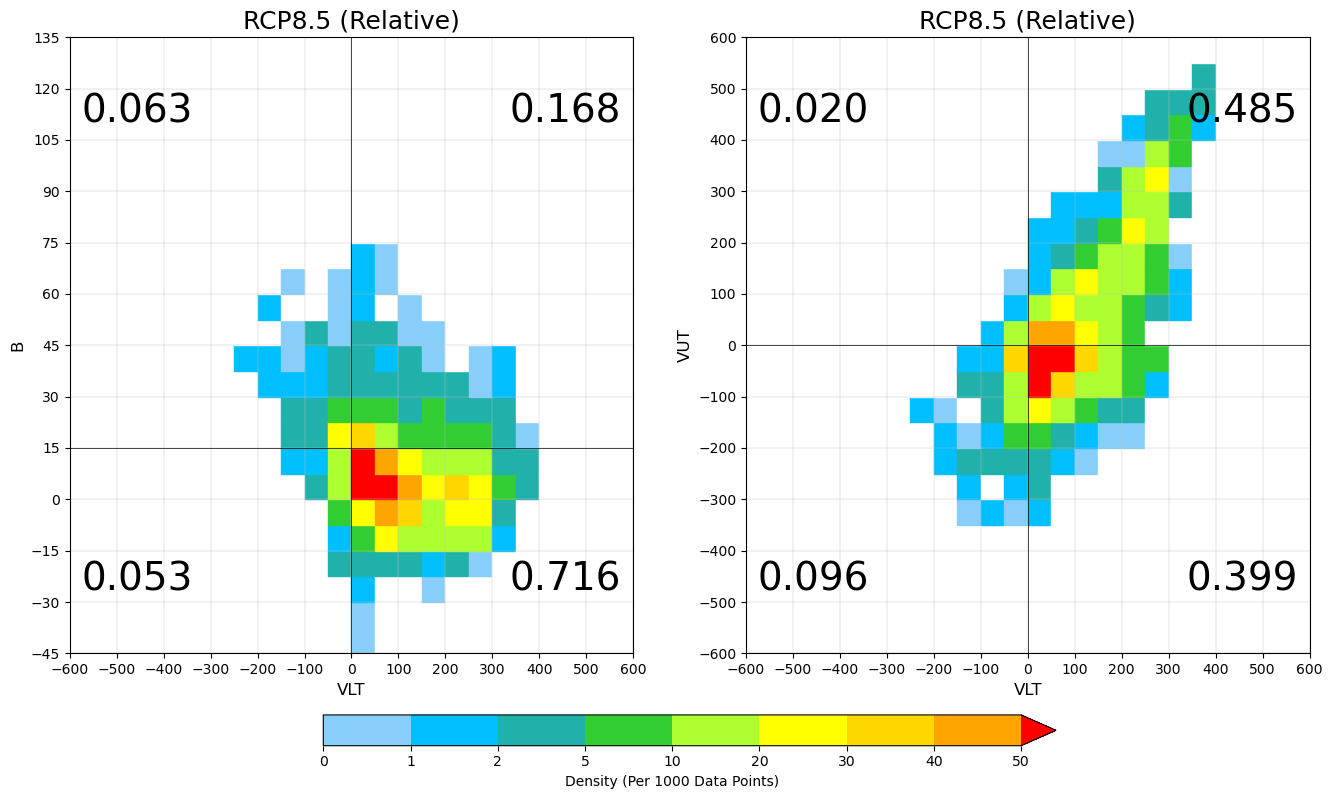

In [65]:
# Plot Relative Phase Space Distribution For RCP8.5 Run
Fig = Phase_Distr_Plot(RCP85_VLT_B_30_35N, RCP85_VLT_VUT_30_35N, "RCP8.5", True, False, "")

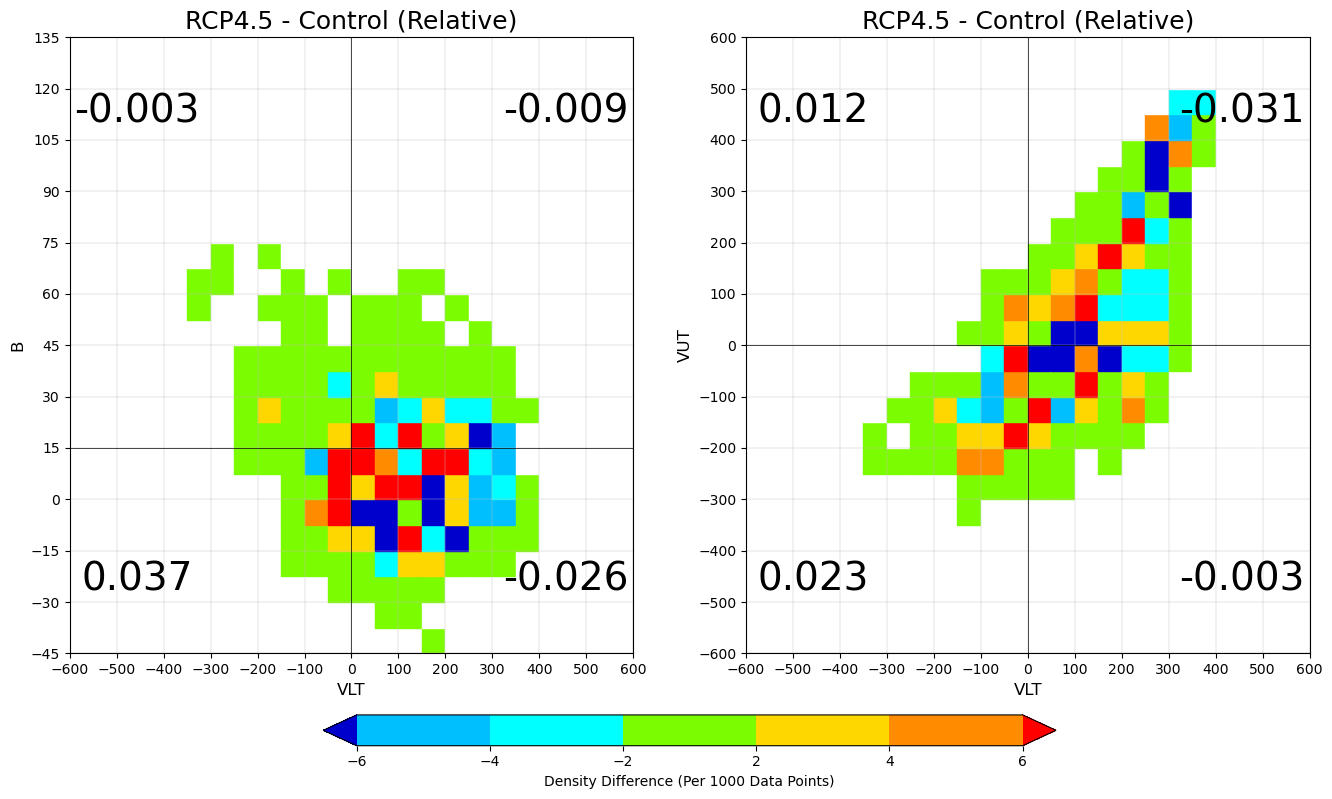

In [66]:
# Plot Relative Difference Between Phase Space Distributions of RCP4.5 - Control
Phase_Diff_Plot("RCP4.5", "Control", RCP45_VLT_B_30_35N, RCP45_VLT_VUT_30_35N, Control_VLT_B_30_35N, Control_VLT_VUT_30_35N, \
True, False, "RCP45-Control_Phase_Diff_30_35N")

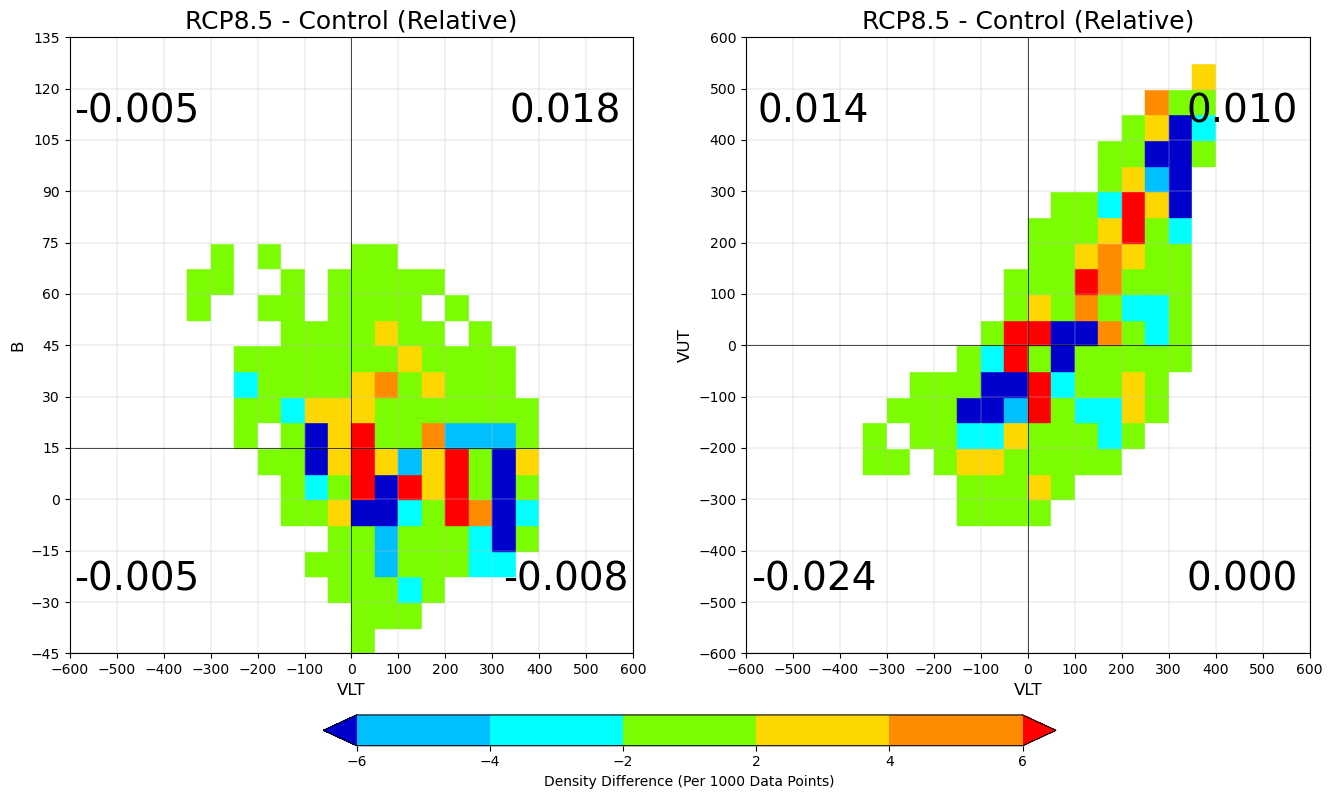

In [67]:
# Plot Relative Difference Between Phase Space Distributions of RCP8.5 - Control
Phase_Diff_Plot("RCP8.5", "Control", RCP85_VLT_B_30_35N, RCP85_VLT_VUT_30_35N, Control_VLT_B_30_35N, Control_VLT_VUT_30_35N, \
True, False, "RCP85-Control_Phase_Diff_30_35N")

In [68]:
# Create Subset of Data: 35~40N Latitude
Control_35_40N = Control_Data[(Control_Data["Lat"] >= 35) & (Control_Data["Lat"] < 40)].reset_index()
RCP45_35_40N = RCP45_Data[(RCP45_Data["Lat"] >= 35) & (RCP45_Data["Lat"] < 40)].reset_index()
RCP85_35_40N = RCP85_Data[(RCP85_Data["Lat"] >= 35) & (RCP85_Data["Lat"] < 40)].reset_index()

In [69]:
# Phase Space Distribution For Control Run (Relative)
Control_VLT_B_35_40N, Control_VLT_VUT_35_40N = Phase_Space_Distribution(Control_35_40N, VLT_Bins, B_Bins, "Control", True)
# Phase Space Distribution For RCP4.5 Run (Relative)
RCP45_VLT_B_35_40N, RCP45_VLT_VUT_35_40N = Phase_Space_Distribution(RCP45_35_40N, VLT_Bins, B_Bins, "RCP4.5", True)
# Phase Space Distribution For RCP8.5 Run (Relative)
RCP85_VLT_B_35_40N, RCP85_VLT_VUT_35_40N = Phase_Space_Distribution(RCP85_35_40N, VLT_Bins, B_Bins, "RCP8.5", True)

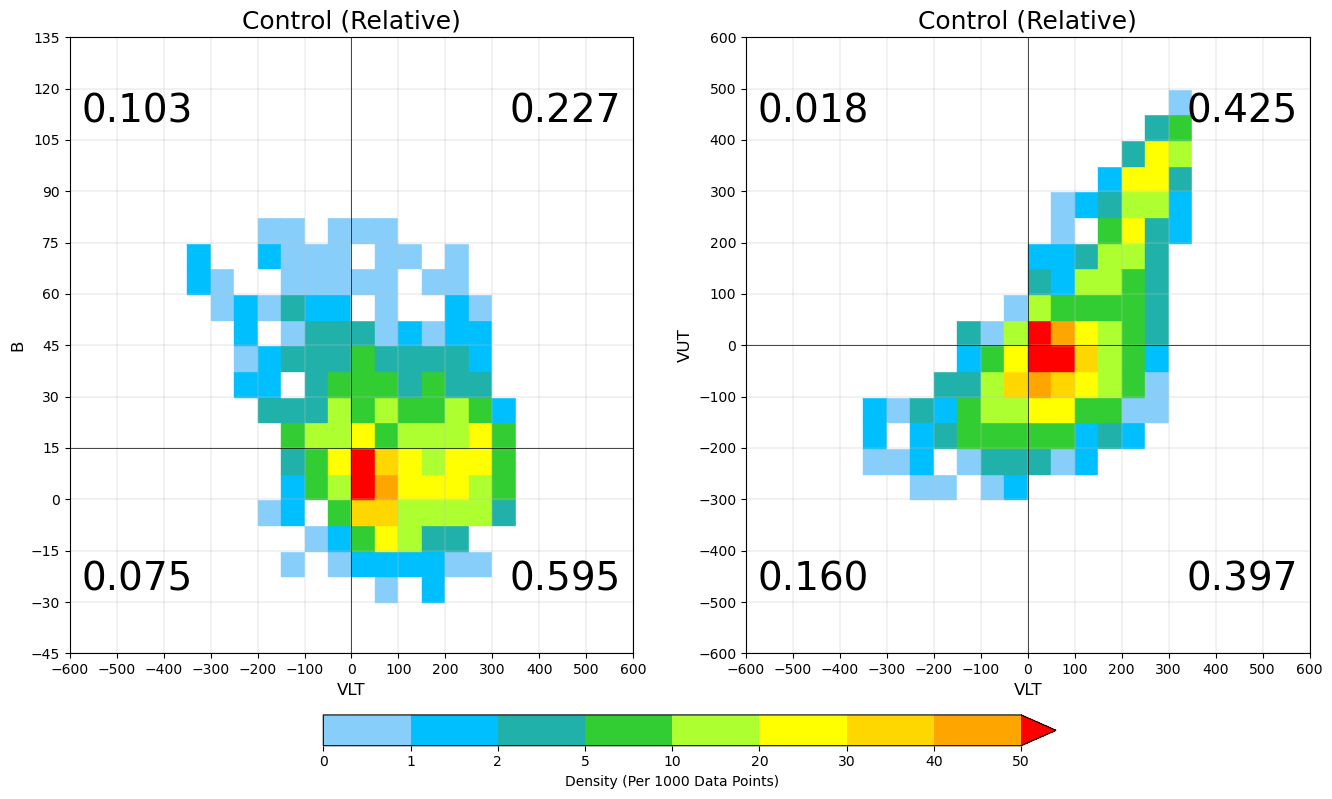

In [70]:
# Plot Relative Phase Space Distribution For Control Run
Fig = Phase_Distr_Plot(Control_VLT_B_35_40N, Control_VLT_VUT_35_40N, "Control", True, False, \
"Control_Phase_Distr_35_40N")

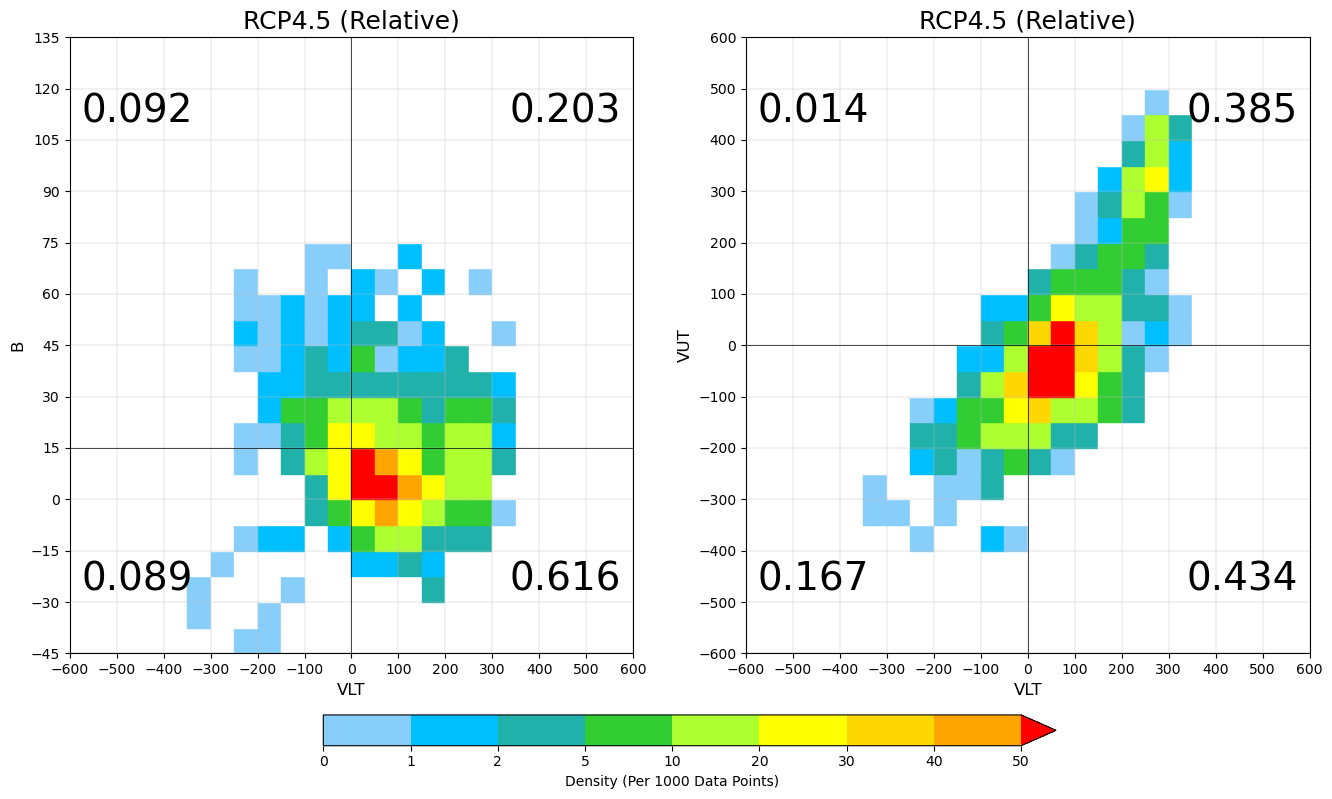

In [71]:
# Plot Relative Phase Space Distribution For RCP4.5 Run
Fig = Phase_Distr_Plot(RCP45_VLT_B_35_40N, RCP45_VLT_VUT_35_40N, "RCP4.5", True, False, "")

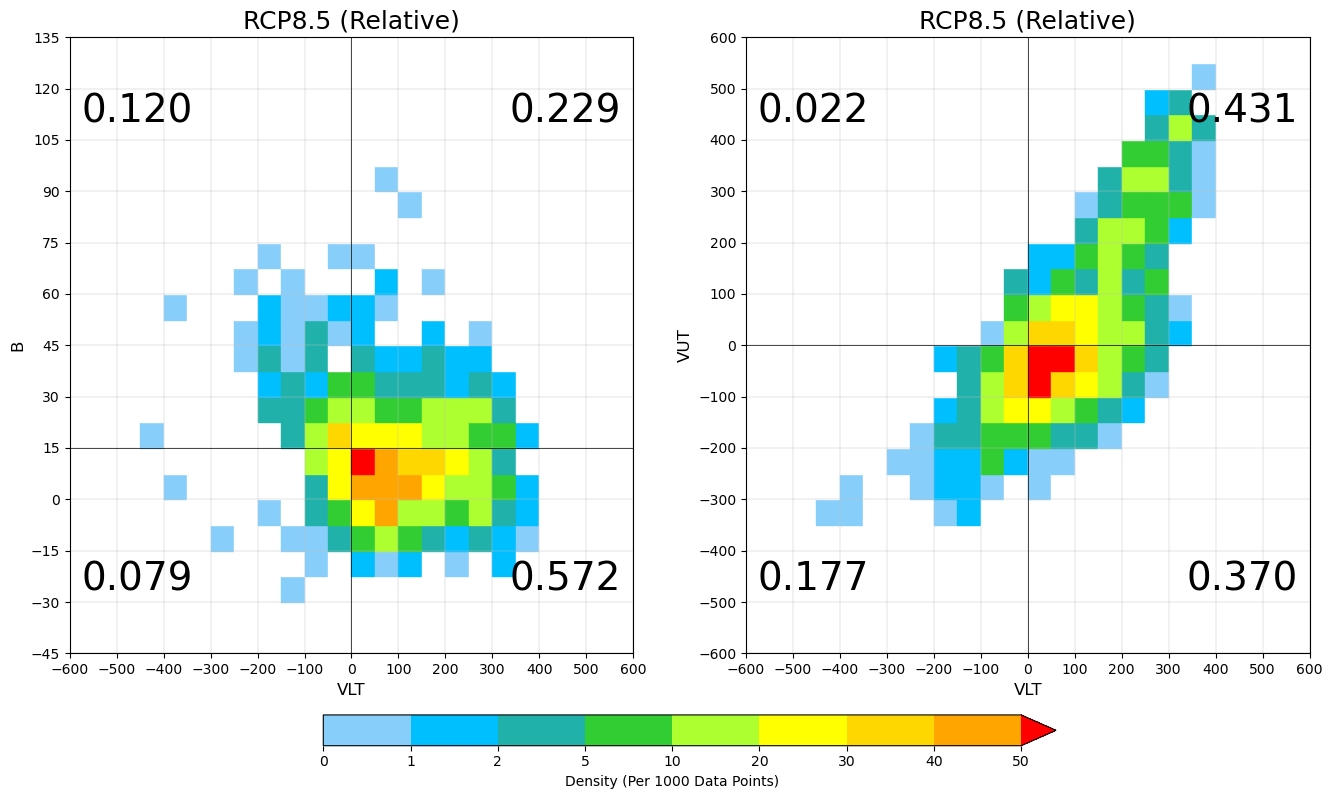

In [72]:
# Plot Relative Phase Space Distribution For RCP8.5 Run
Fig = Phase_Distr_Plot(RCP85_VLT_B_35_40N, RCP85_VLT_VUT_35_40N, "RCP8.5", True, False, "")

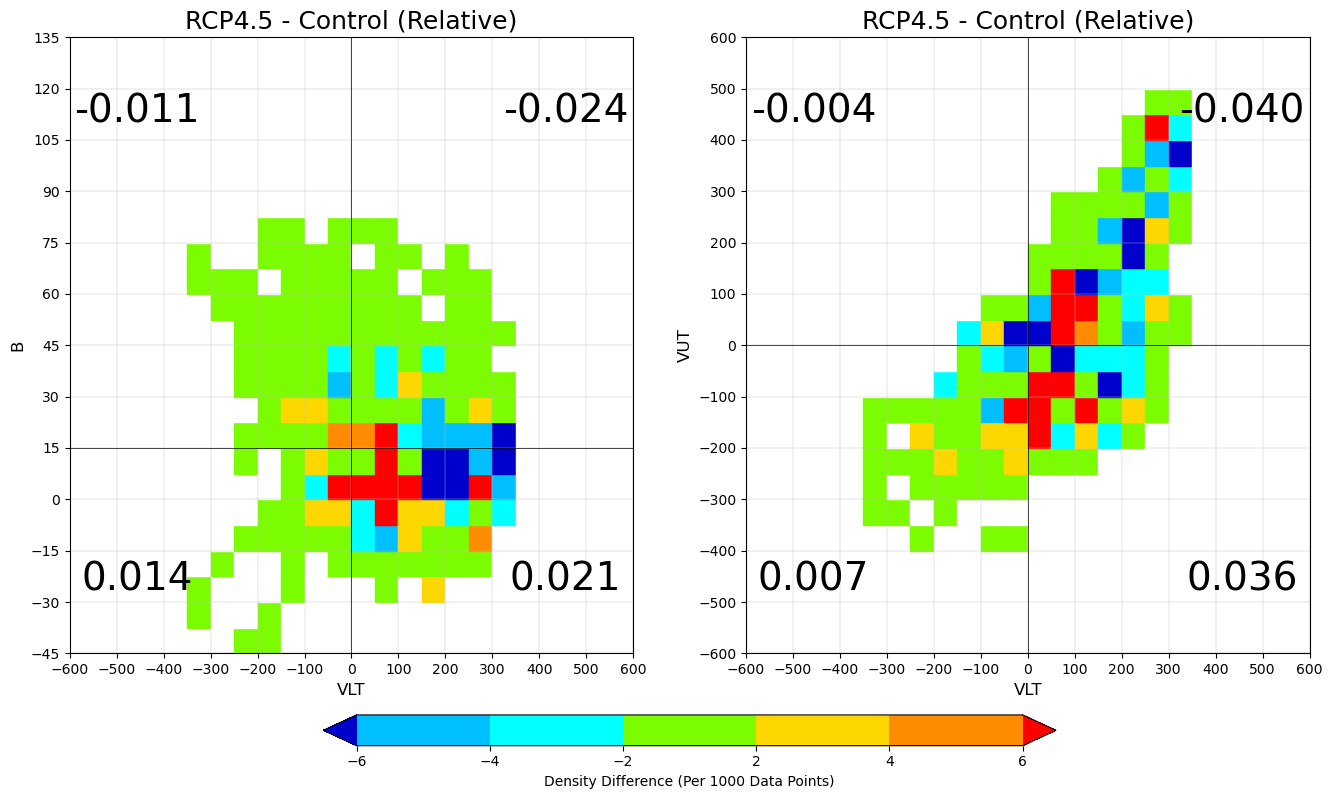

In [73]:
# Plot Relative Difference Between Phase Space Distributions of RCP4.5 - Control
Phase_Diff_Plot("RCP4.5", "Control", RCP45_VLT_B_35_40N, RCP45_VLT_VUT_35_40N, Control_VLT_B_35_40N, Control_VLT_VUT_35_40N, \
True, False, "RCP45-Control_Phase_Diff_35_40N")

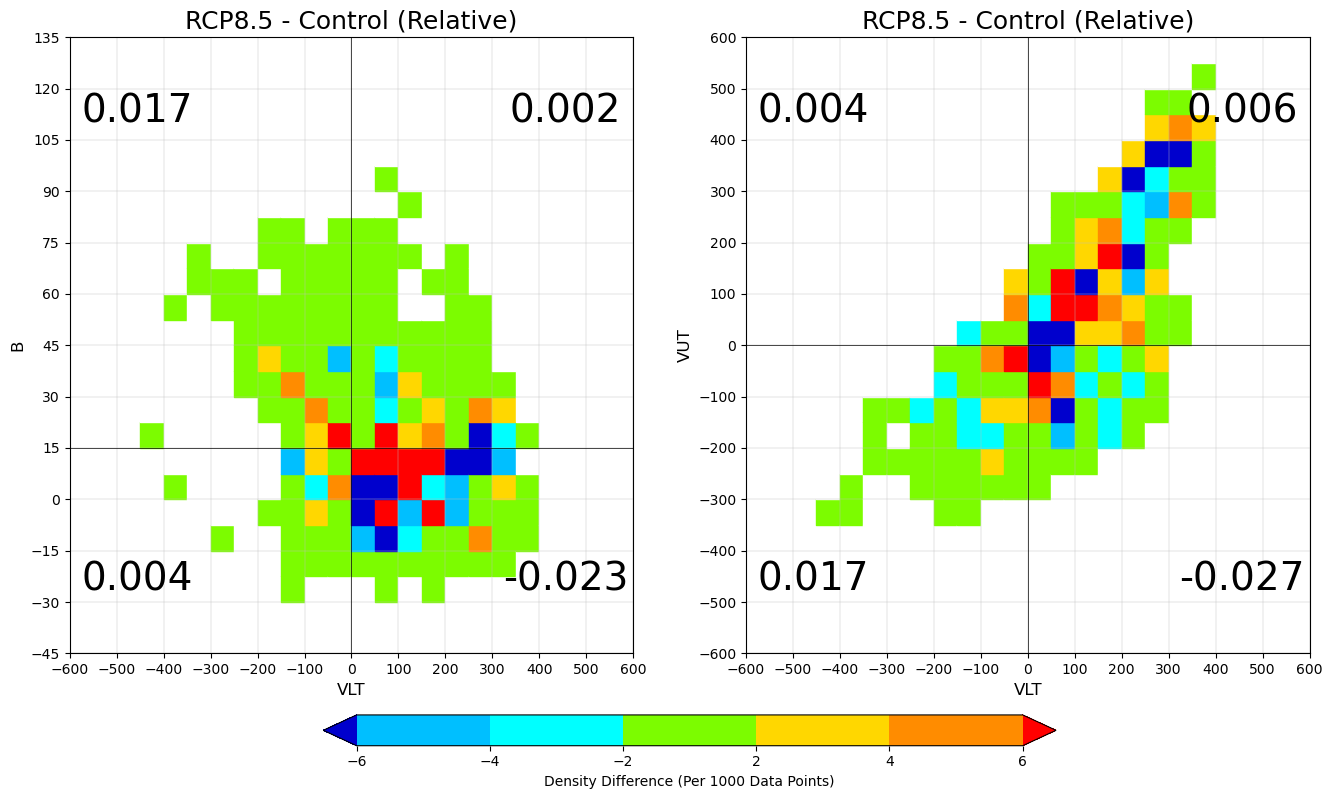

In [74]:
# Plot Relative Difference Between Phase Space Distributions of RCP8.5 - Control
Phase_Diff_Plot("RCP8.5", "Control", RCP85_VLT_B_35_40N, RCP85_VLT_VUT_35_40N, Control_VLT_B_35_40N, Control_VLT_VUT_35_40N, \
True, False, "RCP85-Control_Phase_Diff_35_40N")

In [75]:
# Create Subset of Data: 40~45N Latitude
Control_40_45N = Control_Data[(Control_Data["Lat"] >= 40) & (Control_Data["Lat"] < 45)].reset_index()
RCP45_40_45N = RCP45_Data[(RCP45_Data["Lat"] >= 40) & (RCP45_Data["Lat"] < 45)].reset_index()
RCP85_40_45N = RCP85_Data[(RCP85_Data["Lat"] >= 40) & (RCP85_Data["Lat"] < 45)].reset_index()

In [76]:
# Phase Space Distribution For Control Run (Relative)
Control_VLT_B_40_45N, Control_VLT_VUT_40_45N = Phase_Space_Distribution(Control_40_45N, VLT_Bins, B_Bins, "Control", True)
# Phase Space Distribution For RCP4.5 Run (Relative)
RCP45_VLT_B_40_45N, RCP45_VLT_VUT_40_45N = Phase_Space_Distribution(RCP45_40_45N, VLT_Bins, B_Bins, "RCP4.5", True)
# Phase Space Distribution For RCP8.5 Run (Relative)
RCP85_VLT_B_40_45N, RCP85_VLT_VUT_40_45N = Phase_Space_Distribution(RCP85_40_45N, VLT_Bins, B_Bins, "RCP8.5", True)

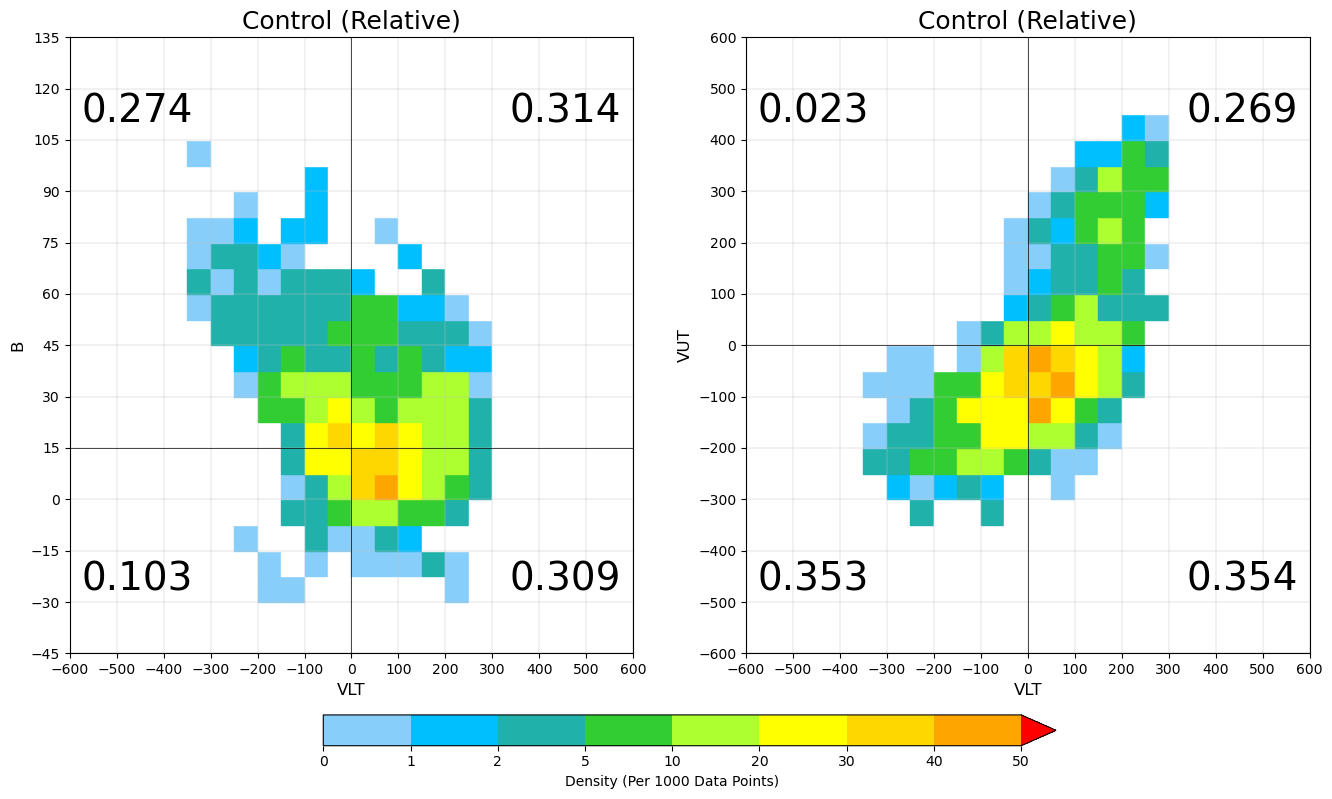

In [77]:
# Plot Relative Phase Space Distribution For Control Run
Fig = Phase_Distr_Plot(Control_VLT_B_40_45N, Control_VLT_VUT_40_45N, "Control", True, False, \
"Control_Phase_Distr_40_45N")

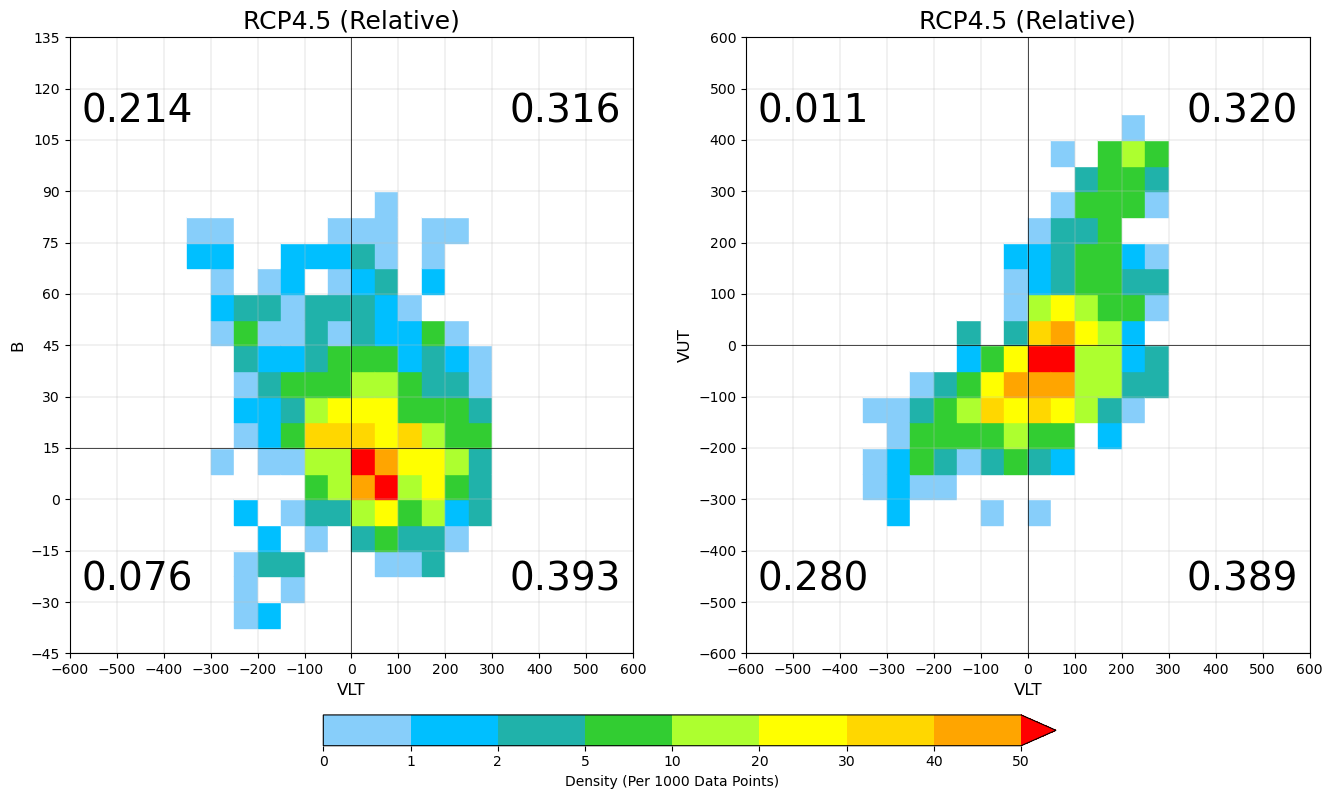

In [78]:
# Plot Relative Phase Space Distribution For RCP4.5 Run
Fig = Phase_Distr_Plot(RCP45_VLT_B_40_45N, RCP45_VLT_VUT_40_45N, "RCP4.5", True, False, "")

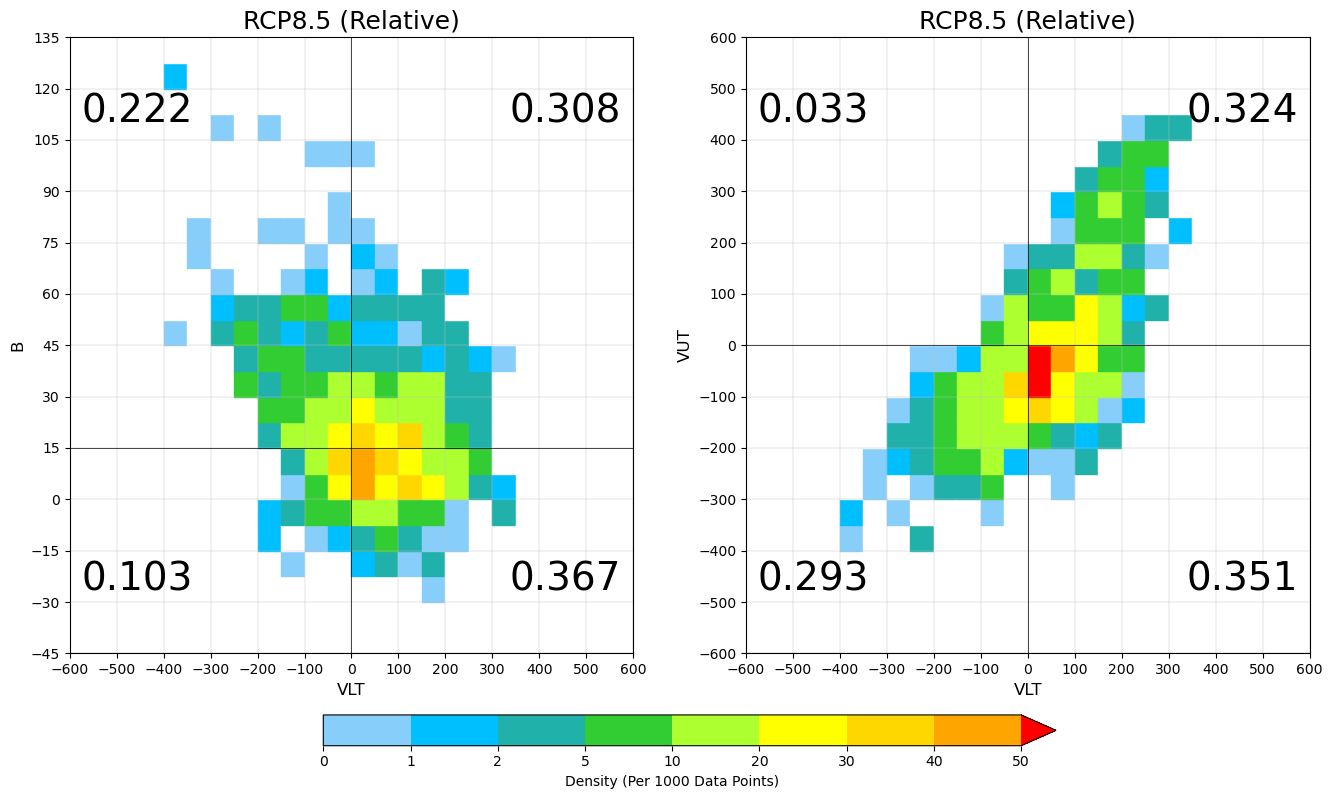

In [79]:
# Plot Relative Phase Space Distribution For RCP8.5 Run
Fig = Phase_Distr_Plot(RCP85_VLT_B_40_45N, RCP85_VLT_VUT_40_45N, "RCP8.5", True, False, "")

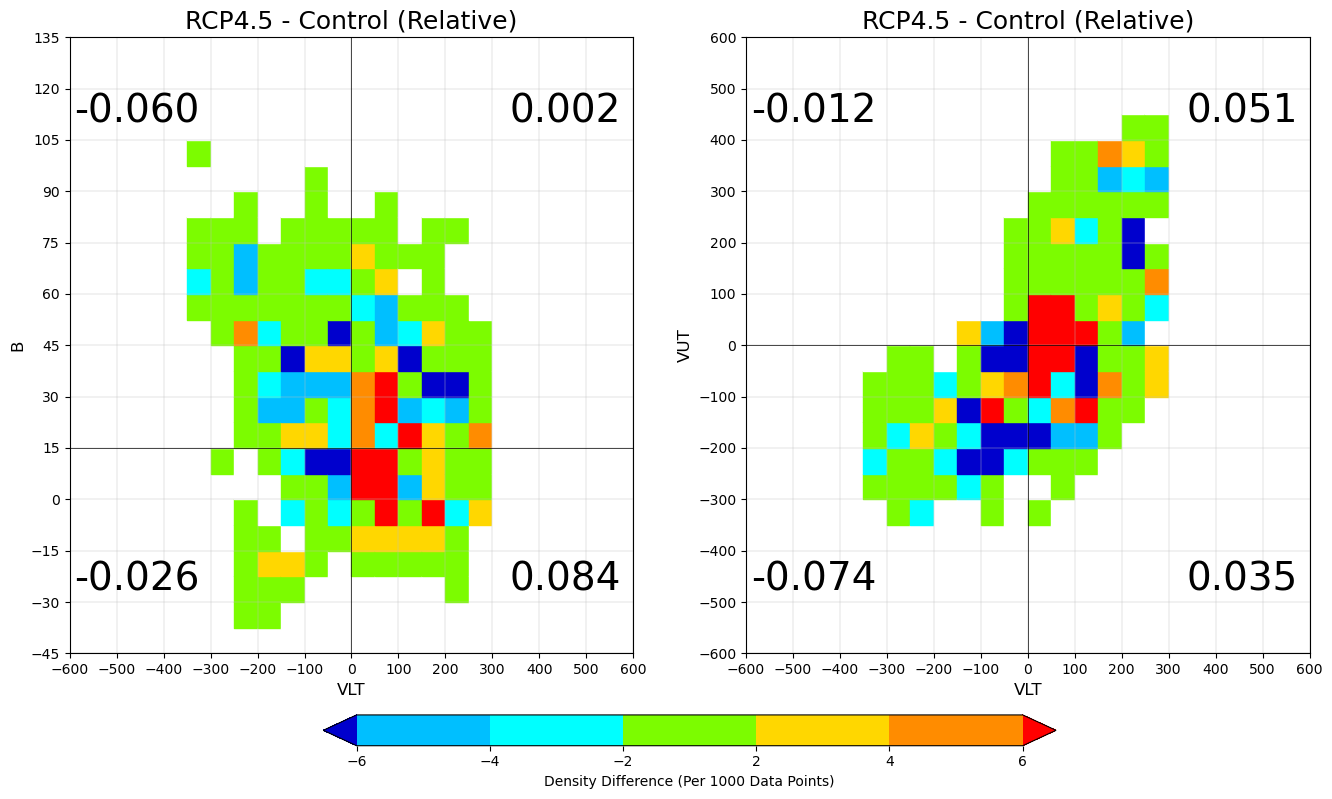

In [80]:
# Plot Relative Difference Between Phase Space Distributions of RCP4.5 - Control
Phase_Diff_Plot("RCP4.5", "Control", RCP45_VLT_B_40_45N, RCP45_VLT_VUT_40_45N, Control_VLT_B_40_45N, Control_VLT_VUT_40_45N, \
True, False, "RCP45-Control_Phase_Diff_40_45N")

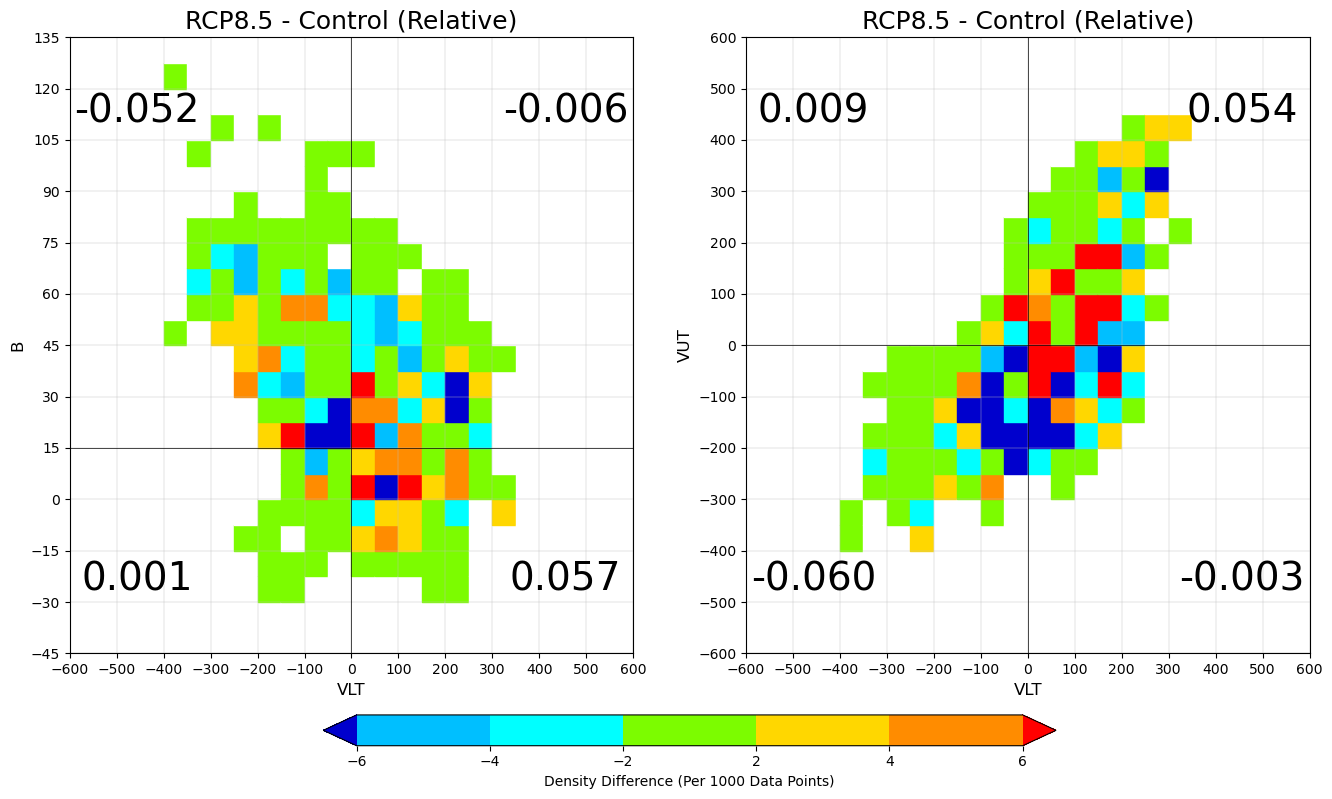

In [81]:
# Plot Relative Difference Between Phase Space Distributions of RCP8.5 - Control
Phase_Diff_Plot("RCP8.5", "Control", RCP85_VLT_B_40_45N, RCP85_VLT_VUT_40_45N, Control_VLT_B_40_45N, Control_VLT_VUT_40_45N, \
True, False, "RCP85-Control_Phase_Diff_40_45N")

In [82]:
# Create Subset of Data: Above 45N Latitude
Control_45N_Above = Control_Data[(Control_Data["Lat"] >= 45)].reset_index()
RCP45_45N_Above = RCP45_Data[(RCP45_Data["Lat"] >= 45)].reset_index()
RCP85_45N_Above = RCP85_Data[(RCP85_Data["Lat"] >= 45)].reset_index()

In [83]:
# Phase Space Distribution For Control Run (Relative)
Control_VLT_B_45N_Above, Control_VLT_VUT_45N_Above = Phase_Space_Distribution(Control_45N_Above, VLT_Bins, B_Bins, "Control", True)
# Phase Space Distribution For RCP4.5 Run (Relative)
RCP45_VLT_B_45N_Above, RCP45_VLT_VUT_45N_Above = Phase_Space_Distribution(RCP45_45N_Above, VLT_Bins, B_Bins, "RCP4.5", True)
# Phase Space Distribution For RCP8.5 Run (Relative)
RCP85_VLT_B_45N_Above, RCP85_VLT_VUT_45N_Above = Phase_Space_Distribution(RCP85_45N_Above, VLT_Bins, B_Bins, "RCP8.5", True)

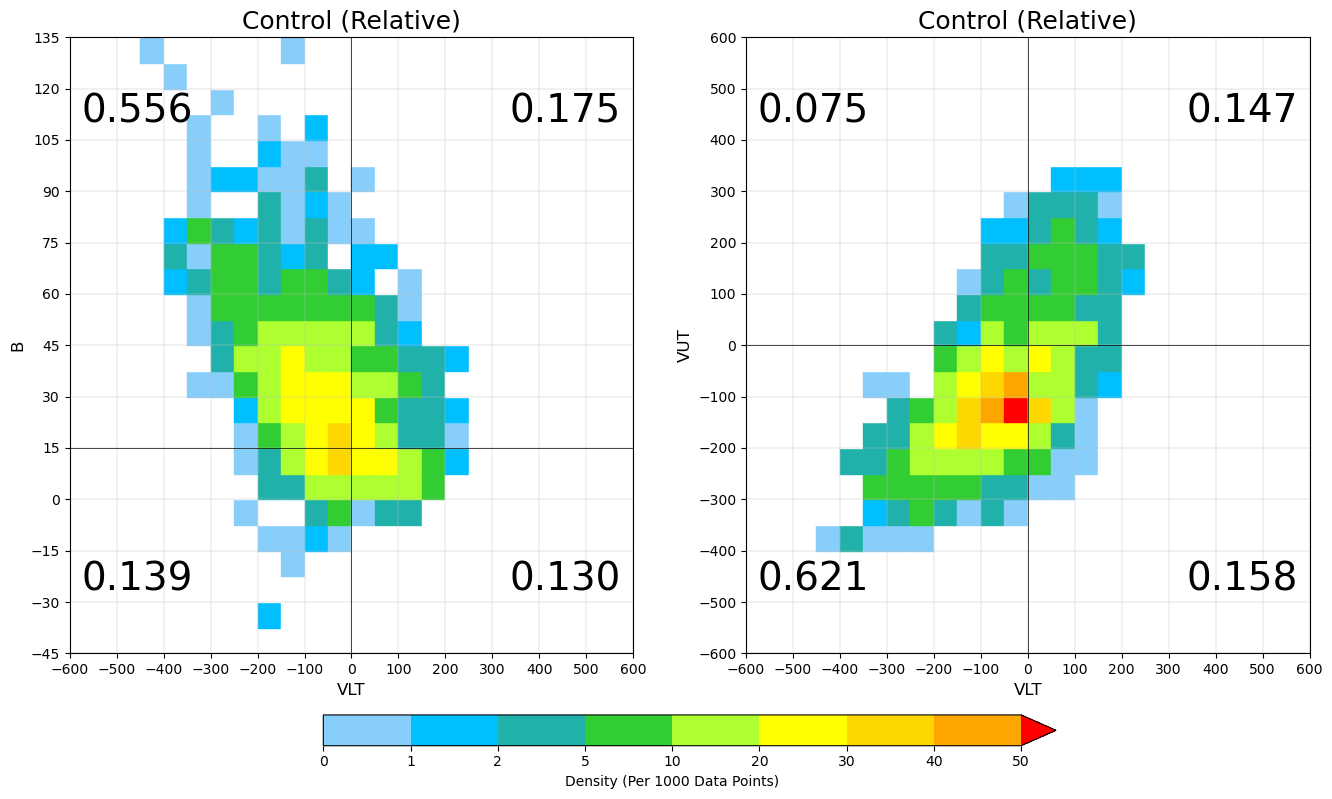

In [84]:
# Plot Relative Phase Space Distribution For Control Run
Fig = Phase_Distr_Plot(Control_VLT_B_45N_Above, Control_VLT_VUT_45N_Above, "Control", True, False, \
"Control_Phase_Distr_45N_Above")

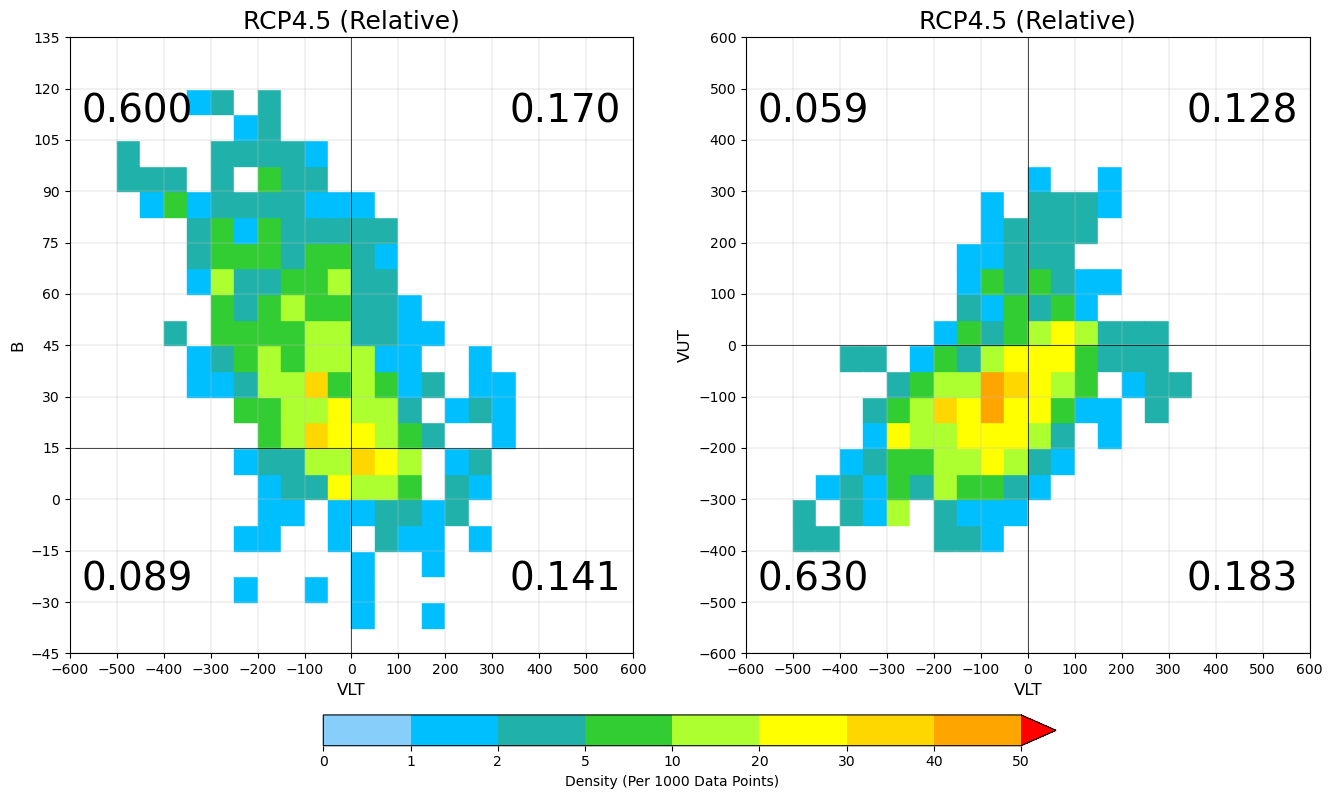

In [85]:
# Plot Relative Phase Space Distribution For RCP4.5 Run
Fig = Phase_Distr_Plot(RCP45_VLT_B_45N_Above, RCP45_VLT_VUT_45N_Above, "RCP4.5", True, False, "")

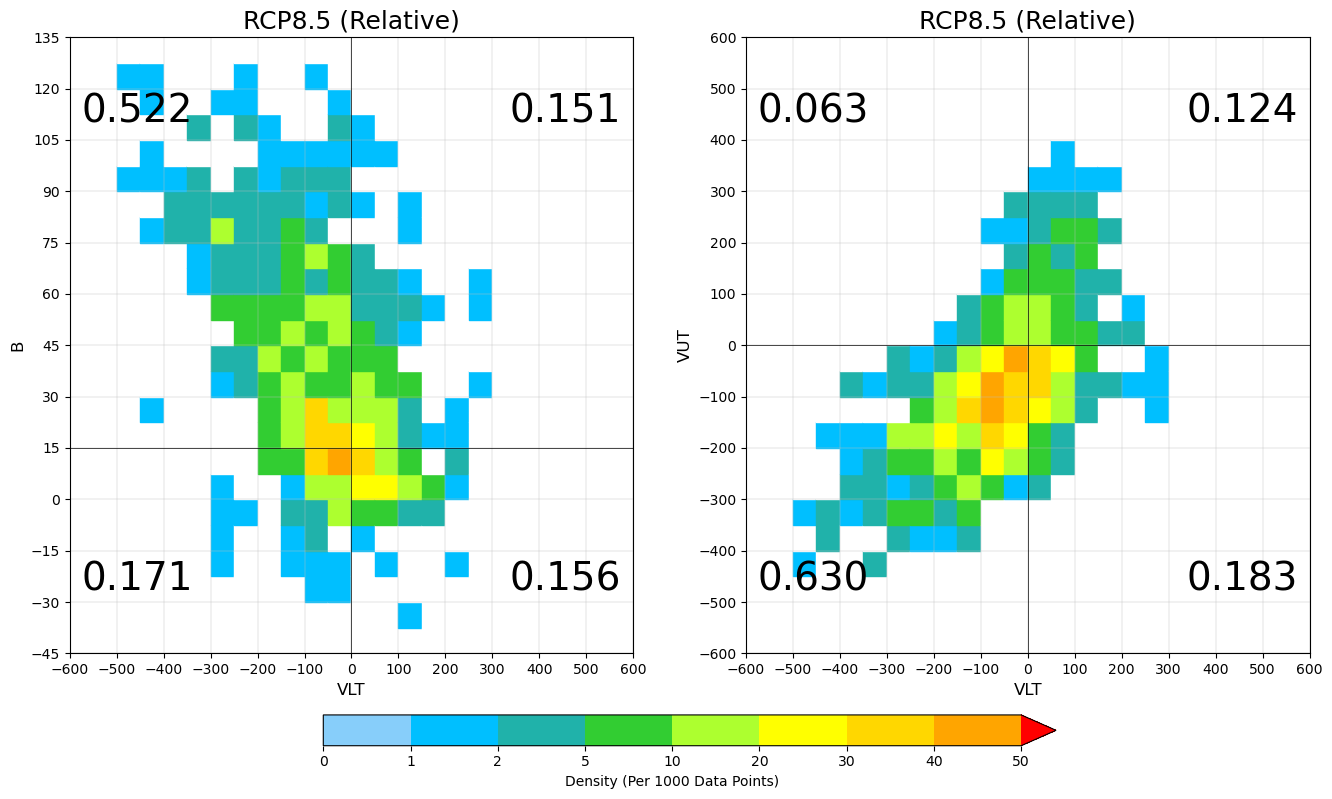

In [86]:
# Plot Relative Phase Space Distribution For RCP8.5 Run
Fig = Phase_Distr_Plot(RCP85_VLT_B_45N_Above, RCP85_VLT_VUT_45N_Above, "RCP8.5", True, False, "")

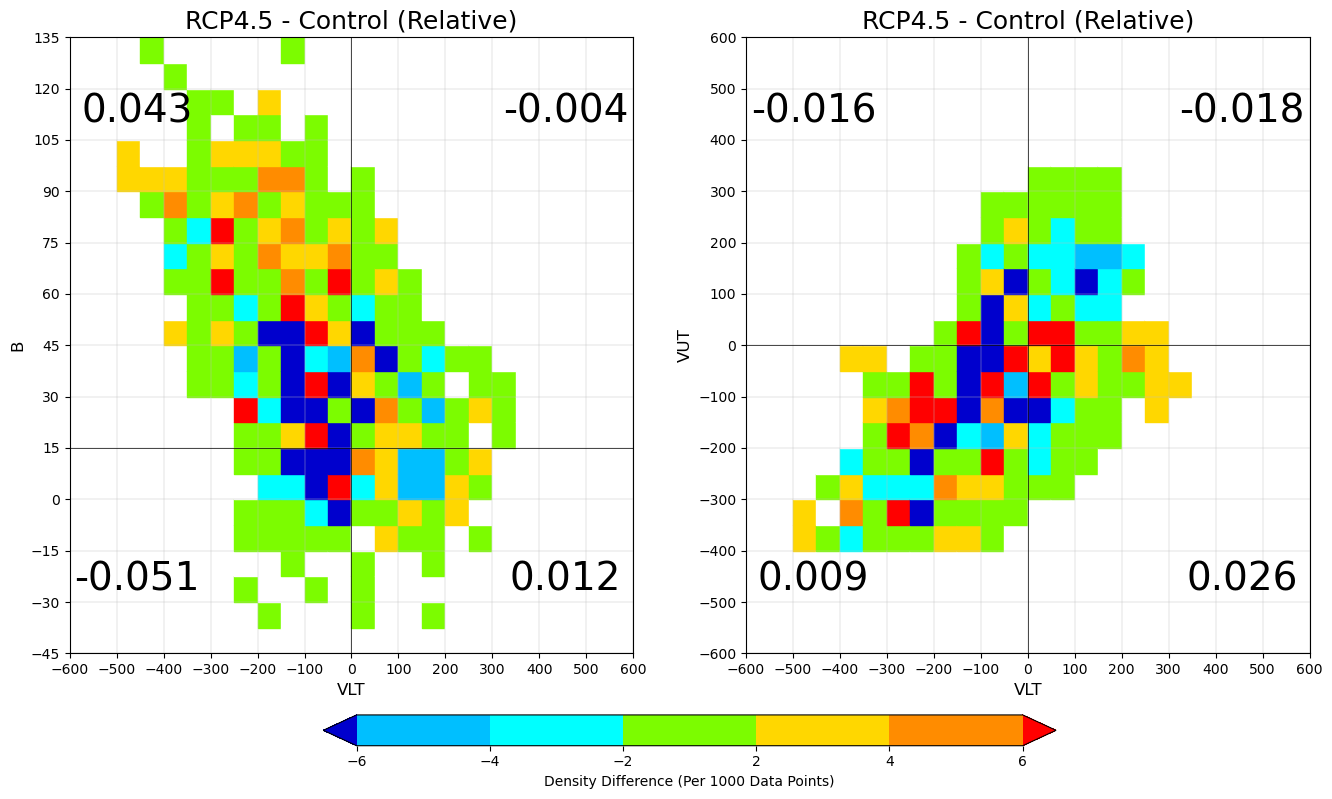

In [87]:
# Plot Relative Difference Between Phase Space Distributions of RCP4.5 - Control
Phase_Diff_Plot("RCP4.5", "Control", RCP45_VLT_B_45N_Above, RCP45_VLT_VUT_45N_Above, Control_VLT_B_45N_Above, Control_VLT_VUT_45N_Above, \
True, False, "RCP45-Control_Phase_Diff_45N_Above")

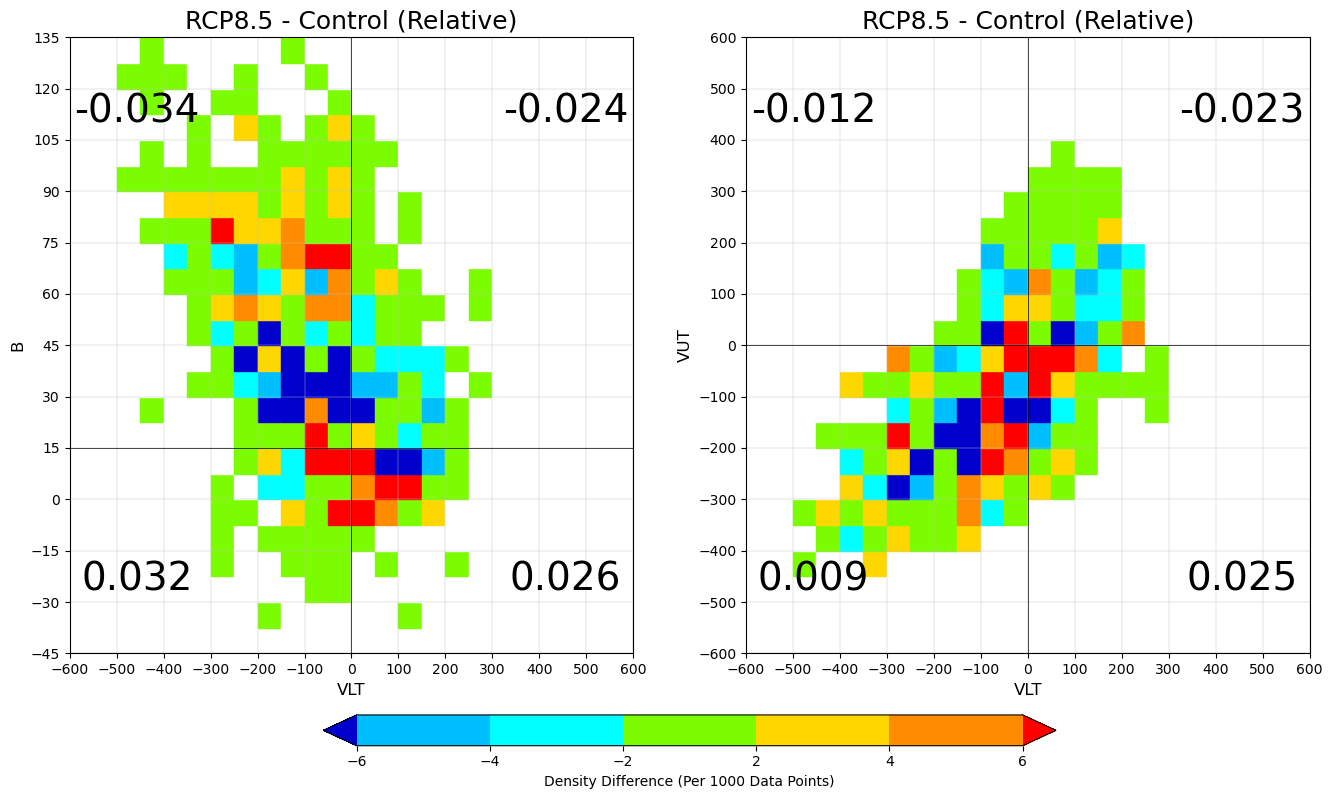

In [88]:
# Plot Relative Difference Between Phase Space Distributions of RCP8.5 - Control
Phase_Diff_Plot("RCP8.5", "Control", RCP85_VLT_B_45N_Above, RCP85_VLT_VUT_45N_Above, Control_VLT_B_45N_Above, Control_VLT_VUT_45N_Above, \
True, False, "RCP85-Control_Phase_Diff_45N_Above")

In [89]:
# Create Subset of Data: October to December
Control_Oct_Dec = Control_Data[(Control_Data["Month"] >= 10)].reset_index()
RCP45_Oct_Dec = RCP45_Data[(RCP45_Data["Month"] >= 10)].reset_index()
RCP85_Oct_Dec = RCP85_Data[(RCP85_Data["Month"] >= 10)].reset_index()

In [90]:
# Phase Space Distribution For Control Run (Relative)
Control_VLT_B_Rela_Oct_Dec, Control_VLT_VUT_Rela_Oct_Dec = Phase_Space_Distribution(Control_Oct_Dec, VLT_Bins, B_Bins, "Control", True)
# Phase Space Distribution For RCP4.5 Run (Relative)
RCP45_VLT_B_Rela_Oct_Dec, RCP45_VLT_VUT_Rela_Oct_Dec = Phase_Space_Distribution(RCP45_Oct_Dec, VLT_Bins, B_Bins, "RCP4.5", True)
# Phase Space Distribution For RCP8.5 Run (Relative)
RCP85_VLT_B_Rela_Oct_Dec, RCP85_VLT_VUT_Rela_Oct_Dec = Phase_Space_Distribution(RCP85_Oct_Dec, VLT_Bins, B_Bins, "RCP8.5", True)

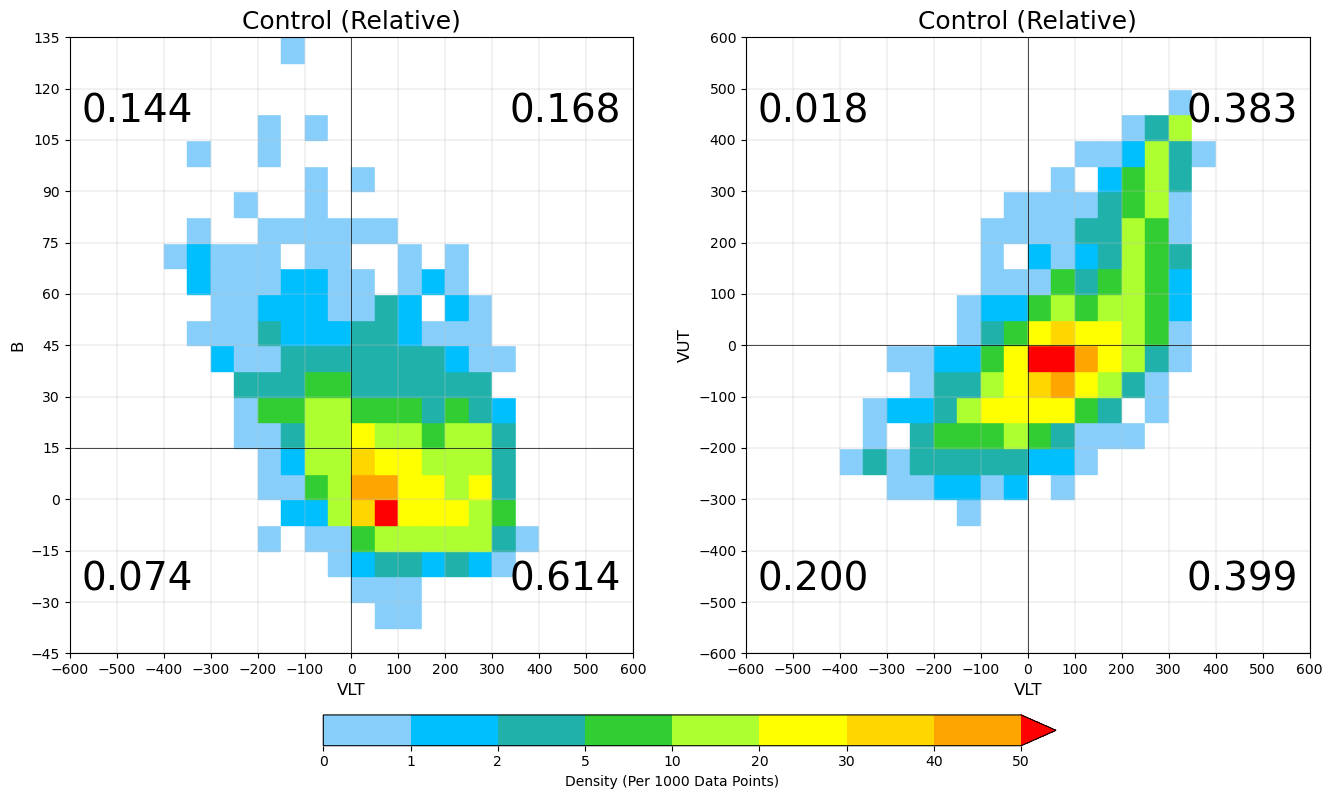

In [91]:
# Plot Relative Phase Space Distribution For Control Run
Fig = Phase_Distr_Plot(Control_VLT_B_Rela_Oct_Dec, Control_VLT_VUT_Rela_Oct_Dec, "Control", True, False, \
"Control_Phase_Distr_Oct_Dec")

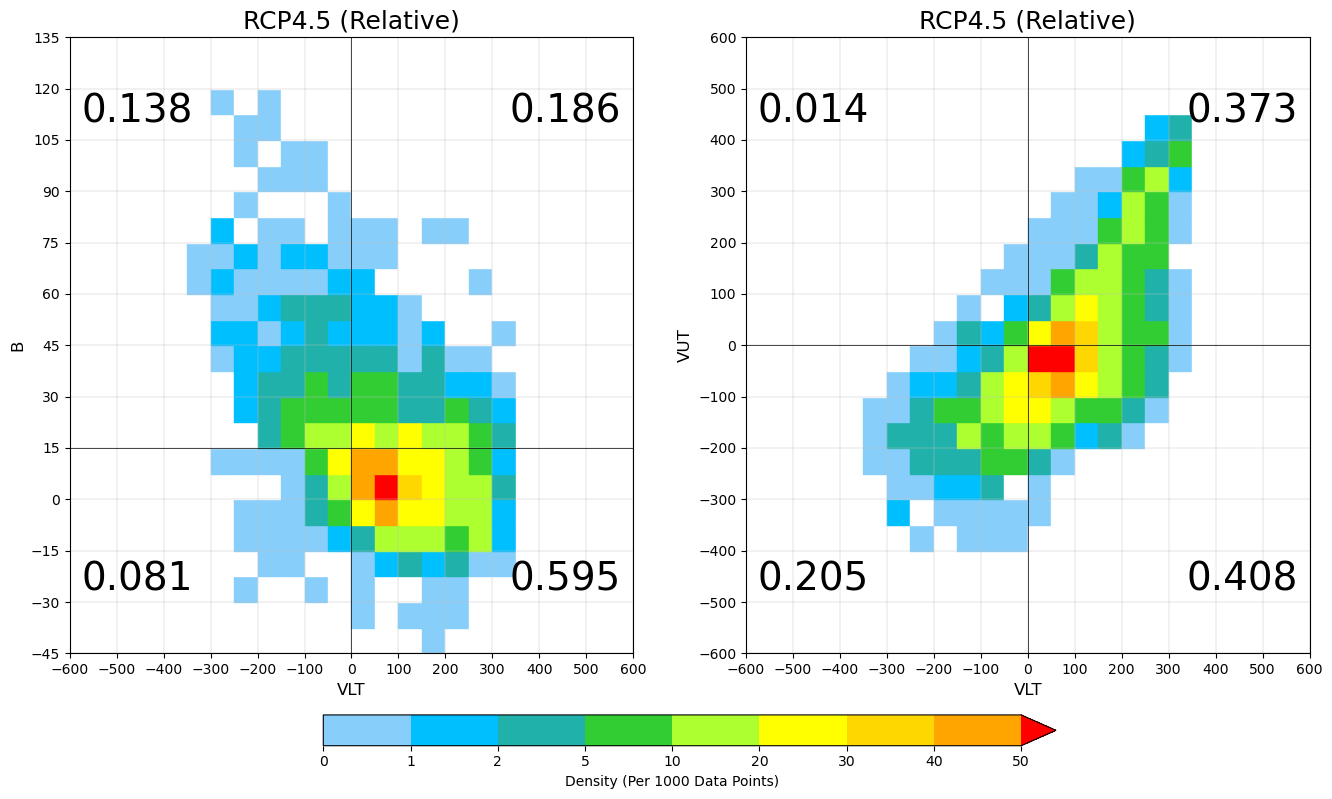

In [92]:
# Plot Relative Phase Space Distribution For RCP4.5 Run
Fig = Phase_Distr_Plot(RCP45_VLT_B_Rela_Oct_Dec, RCP45_VLT_VUT_Rela_Oct_Dec, "RCP4.5", True, False, "")

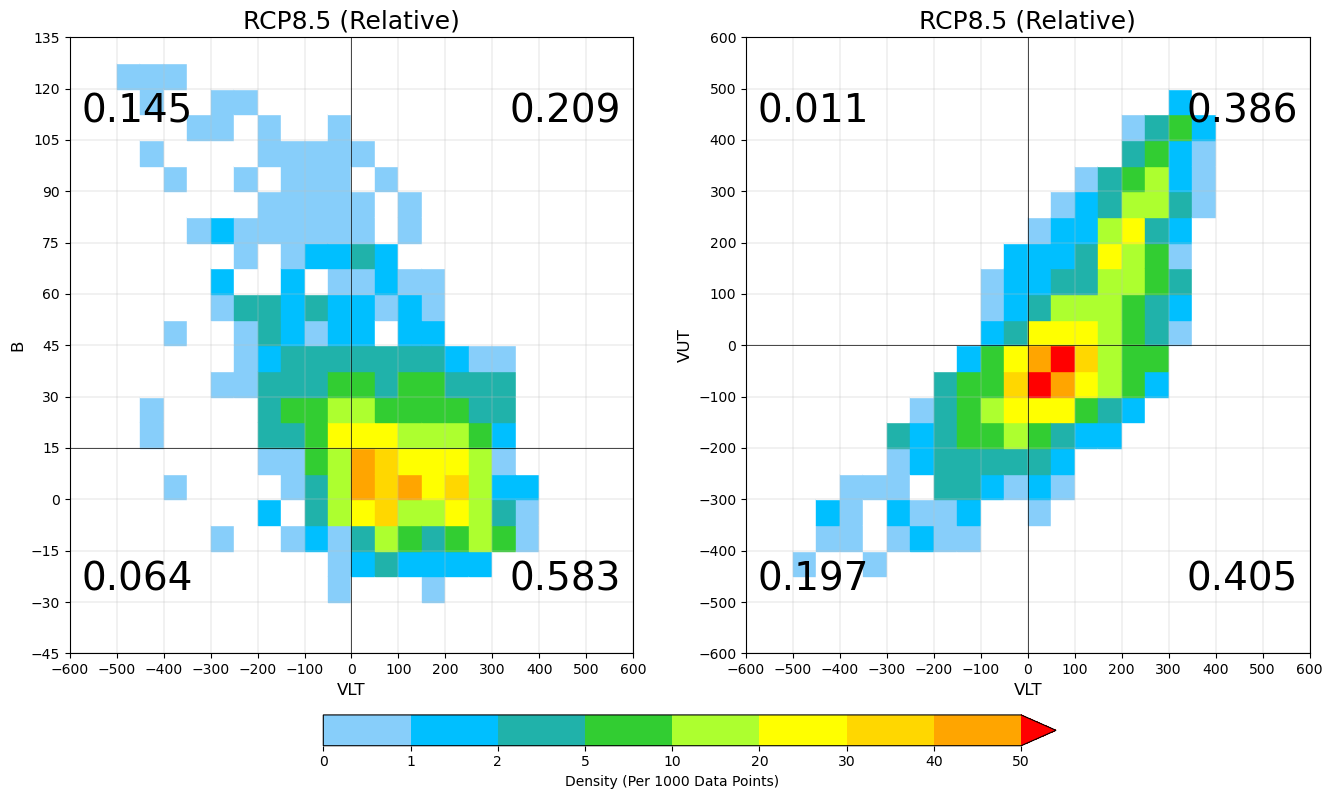

In [93]:
# Plot Relative Phase Space Distribution For RCP8.5 Run
Fig = Phase_Distr_Plot(RCP85_VLT_B_Rela_Oct_Dec, RCP85_VLT_VUT_Rela_Oct_Dec, "RCP8.5", True, False, "")

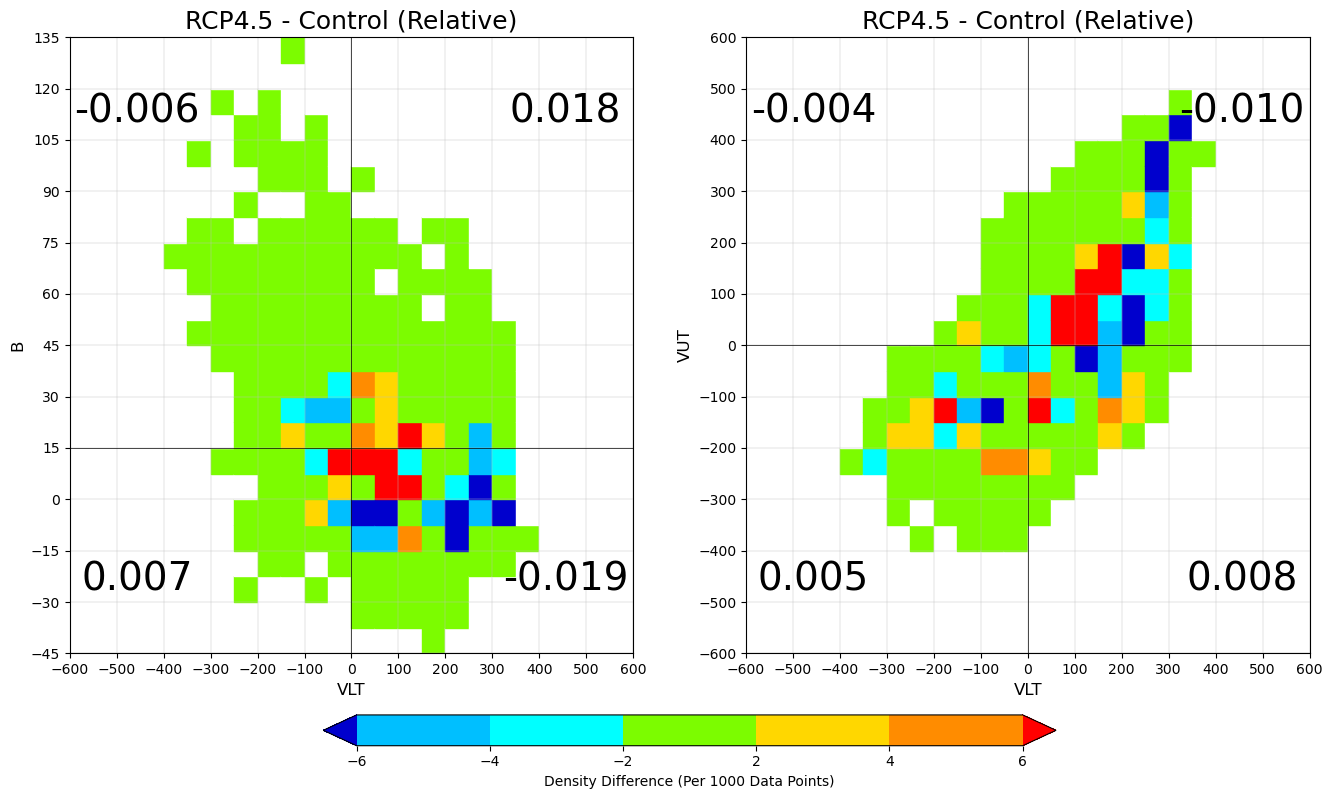

In [94]:
# Plot Relative Difference Between Phase Space Distributions of RCP4.5 - Control
Phase_Diff_Plot("RCP4.5", "Control", RCP45_VLT_B_Rela_Oct_Dec, RCP45_VLT_VUT_Rela_Oct_Dec, Control_VLT_B_Rela_Oct_Dec, Control_VLT_VUT_Rela_Oct_Dec, \
True, False, "RCP45-Control_Phase_Diff_Oct_Dec")

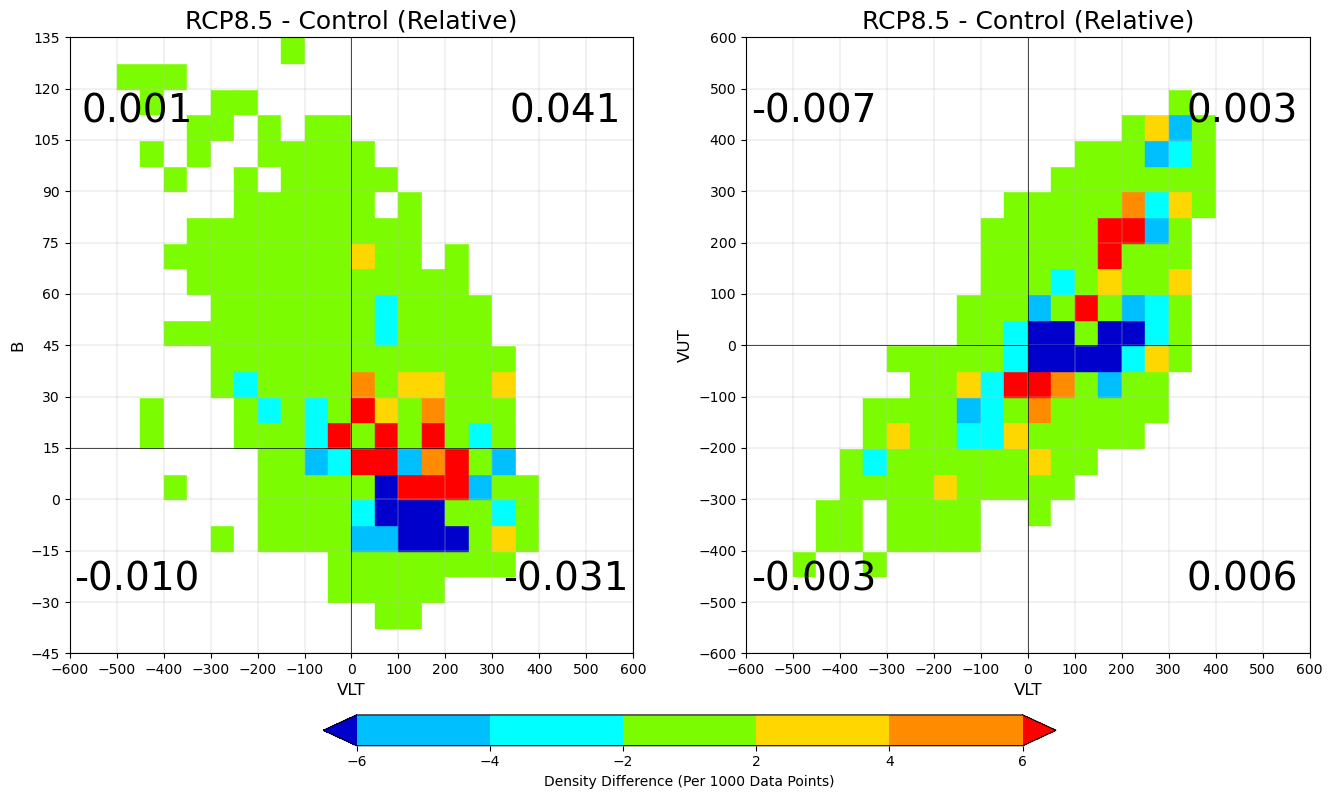

In [95]:
# Plot Relative Difference Between Phase Space Distributions of RCP8.5 - Control
Phase_Diff_Plot("RCP8.5", "Control", RCP85_VLT_B_Rela_Oct_Dec, RCP85_VLT_VUT_Rela_Oct_Dec, Control_VLT_B_Rela_Oct_Dec, Control_VLT_VUT_Rela_Oct_Dec, \
True, False, "RCP85-Control_Phase_Diff_Oct_Dec")

In [48]:
# Calculate Median Windspeed Snapshots
Control_Wind_Snap_Median = Snaps_Combine("850hPa Windspeed", Control_Subset_Codes, Control_Data, Control_ET, \
Control_Compo, Control_A_Compo_nc, Control_B_Compo_nc, Control_C_Compo_nc, 50)
RCP45_Wind_Snap_Median = Snaps_Combine("850hPa Windspeed", RCP45_Subset_Codes, RCP45_Data, RCP45_ET, \
RCP45_Compo, RCP45_A_Compo_nc, RCP45_B_Compo_nc, RCP45_C_Compo_nc, 50)
RCP85_Wind_Snap_Median = Snaps_Combine("850hPa Windspeed", RCP85_Subset_Codes, RCP85_Data, RCP85_ET, \
RCP85_Compo, RCP85_A_Compo_nc, RCP85_B_Compo_nc, RCP85_C_Compo_nc, 50)

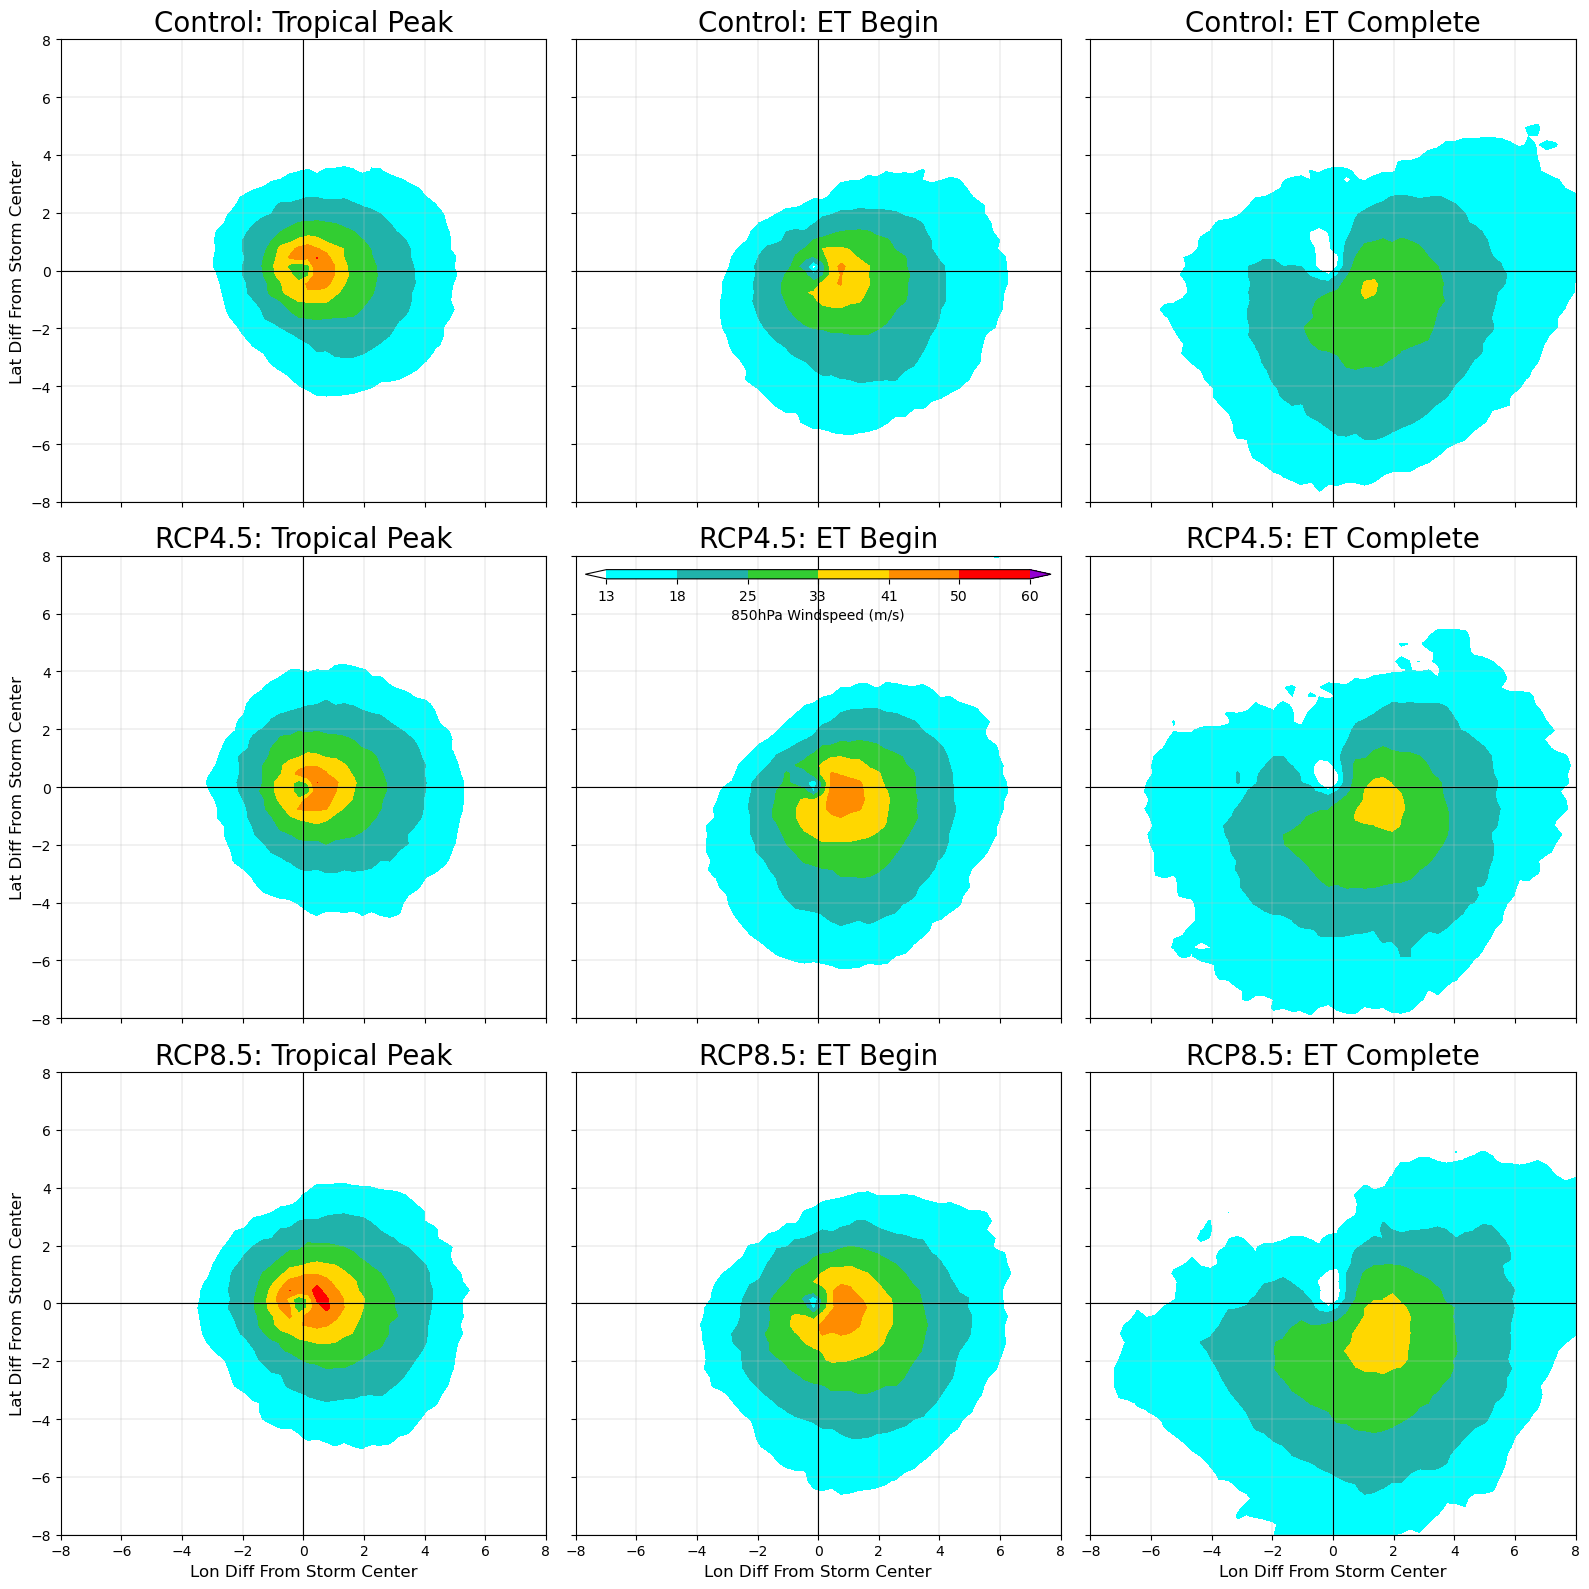

In [49]:
# Plot Median Windspeed Snapshots
Snap_Plots("850hPa Windspeed", [Control_Wind_Snap_Median, RCP45_Wind_Snap_Median, RCP85_Wind_Snap_Median], \
Control_A_Compo_nc, Time_Labels, Windspeed_Bounds, Windspeed_Colours, True, 'Wind_Snaps_Median.png')

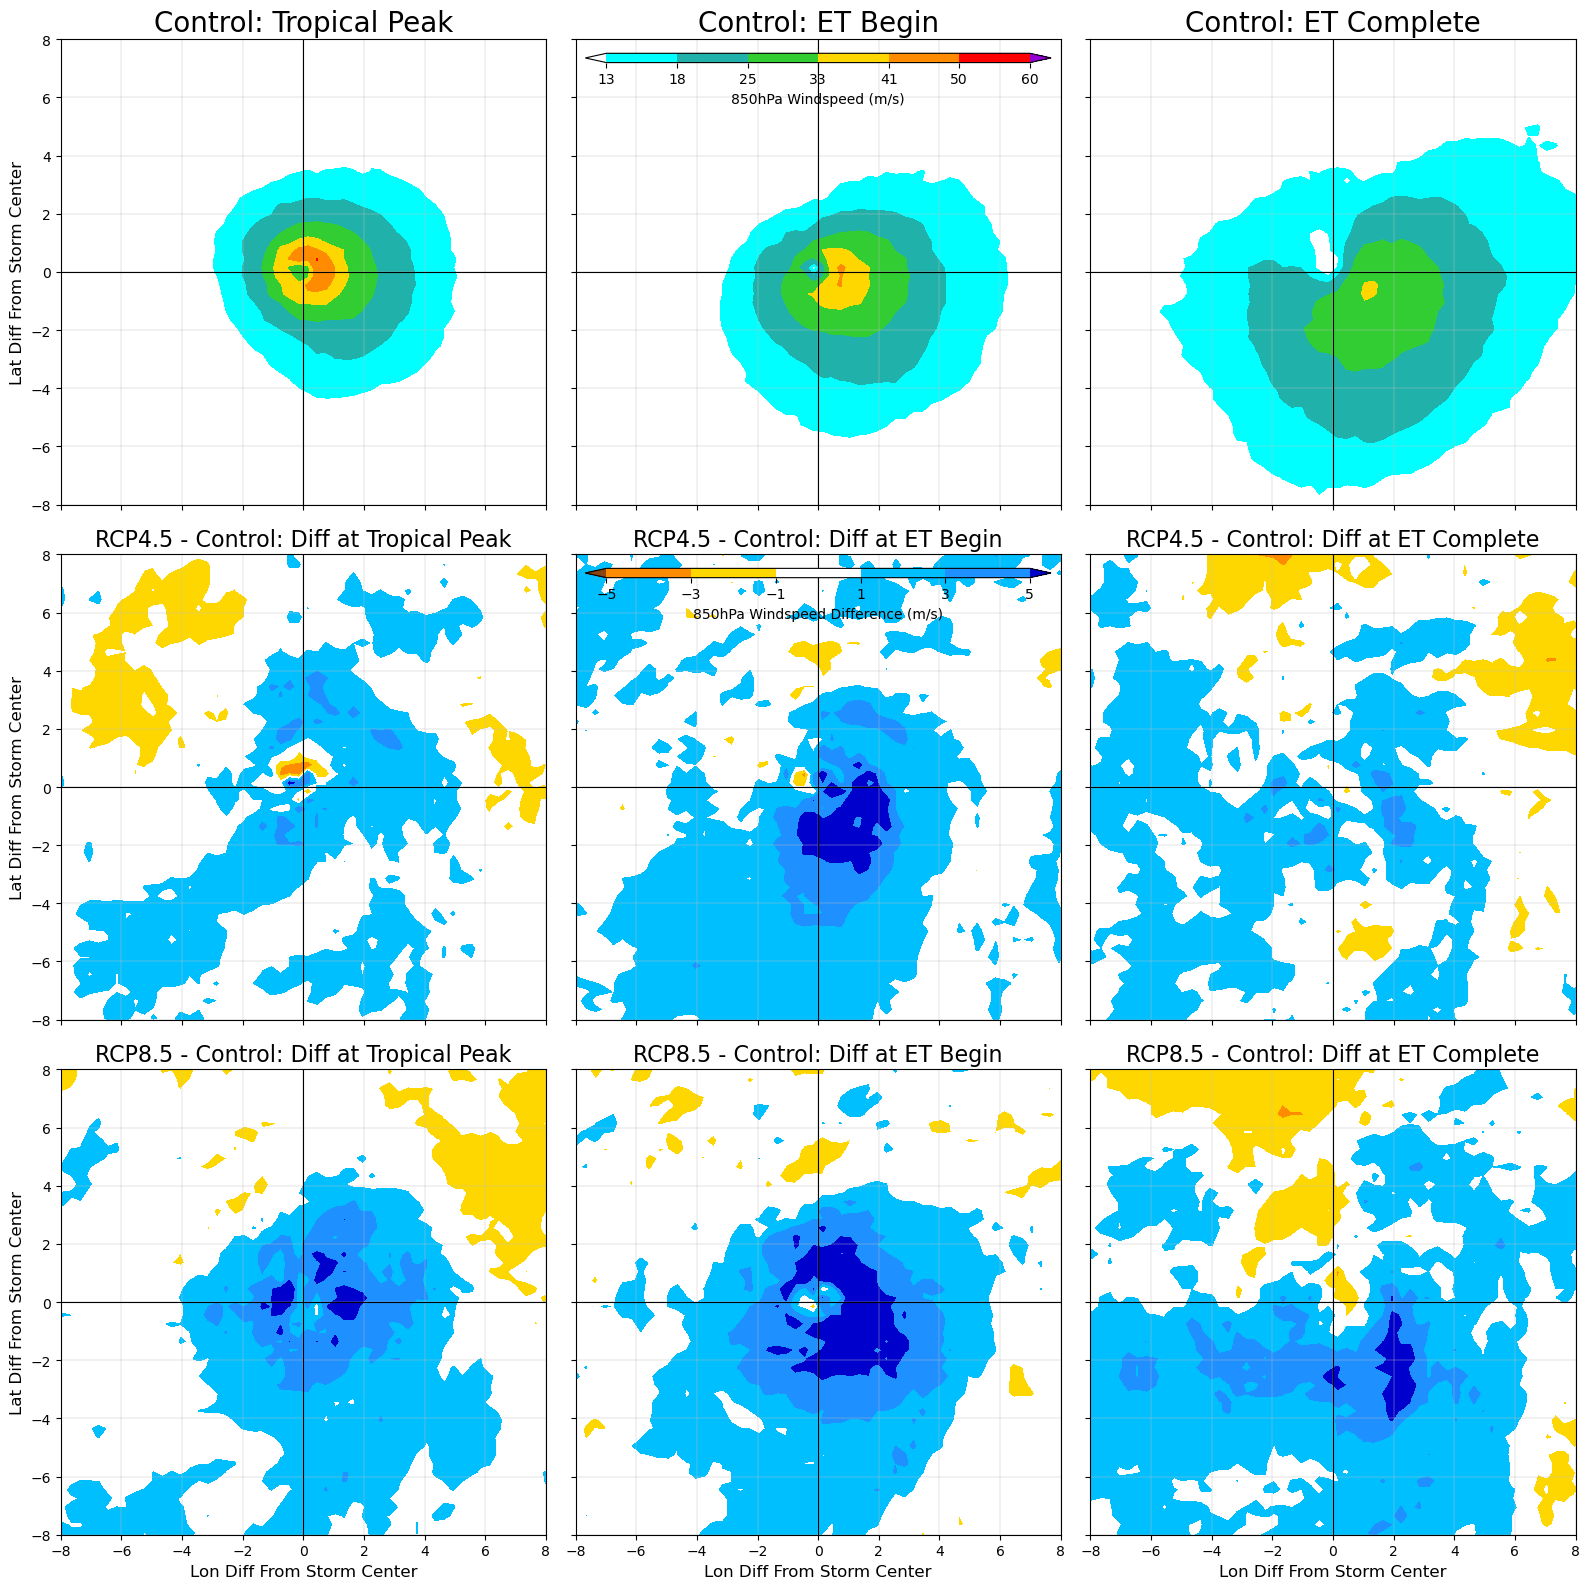

In [50]:
# Plot Median Windspeed Difference Snapshots
Snap_Diff_Plots("850hPa Windspeed", [Control_Wind_Snap_Median, RCP45_Wind_Snap_Median, RCP85_Wind_Snap_Median], \
Control_A_Compo_nc, Time_Labels, Windspeed_Bounds, Windspeed_Colours, \
Wind_Diff_Bounds, Wind_Diff_Colours, True, 'Wind_Snaps_Diff_Median.png')

In [51]:
# Calculate Median Precip Rate Snapshots
Control_Precip_Rate_Snap_Median = Snaps_Combine("Precip Rate", Control_Subset_Codes, Control_Data, Control_ET, \
Control_Compo, Control_A_Compo_nc, Control_B_Compo_nc, Control_C_Compo_nc, 50)
RCP45_Precip_Rate_Snap_Median = Snaps_Combine("Precip Rate", RCP45_Subset_Codes, RCP45_Data, RCP45_ET, \
RCP45_Compo, RCP45_A_Compo_nc, RCP45_B_Compo_nc, RCP45_C_Compo_nc, 50)
RCP85_Precip_Rate_Snap_Median = Snaps_Combine("Precip Rate", RCP85_Subset_Codes, RCP85_Data, RCP85_ET, \
RCP85_Compo, RCP85_A_Compo_nc, RCP85_B_Compo_nc, RCP85_C_Compo_nc, 50)

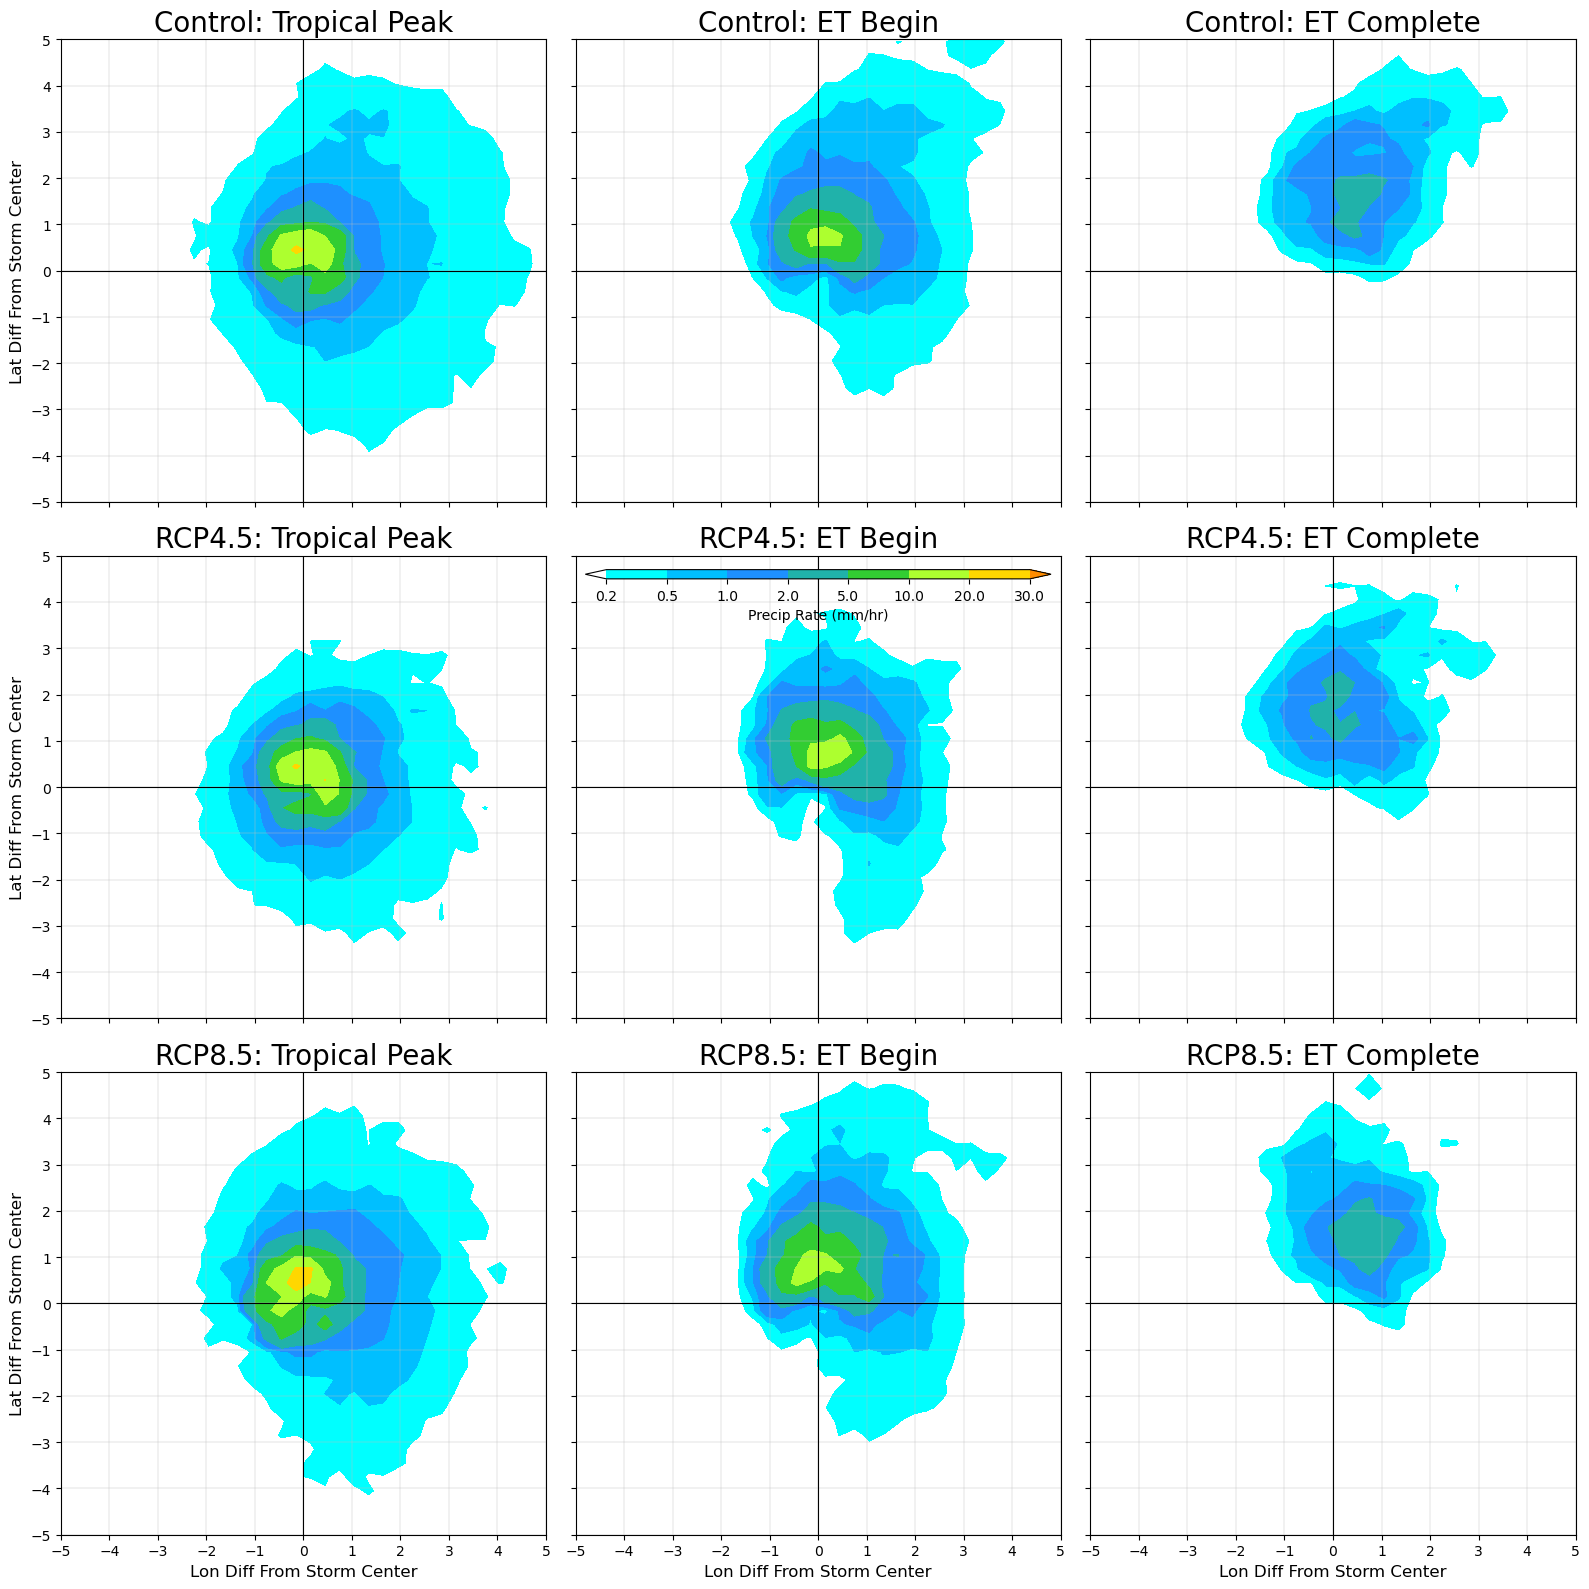

In [52]:
# Plot Median Precip Rate Snapshots
Snap_Plots("Precip Rate", [Control_Precip_Rate_Snap_Median, RCP45_Precip_Rate_Snap_Median, RCP85_Precip_Rate_Snap_Median], \
Control_A_Compo_nc, Time_Labels, Precip_Rate_Bounds, Precip_Rate_Colours, True, 'Precip_Rate_Snaps_Median.png')

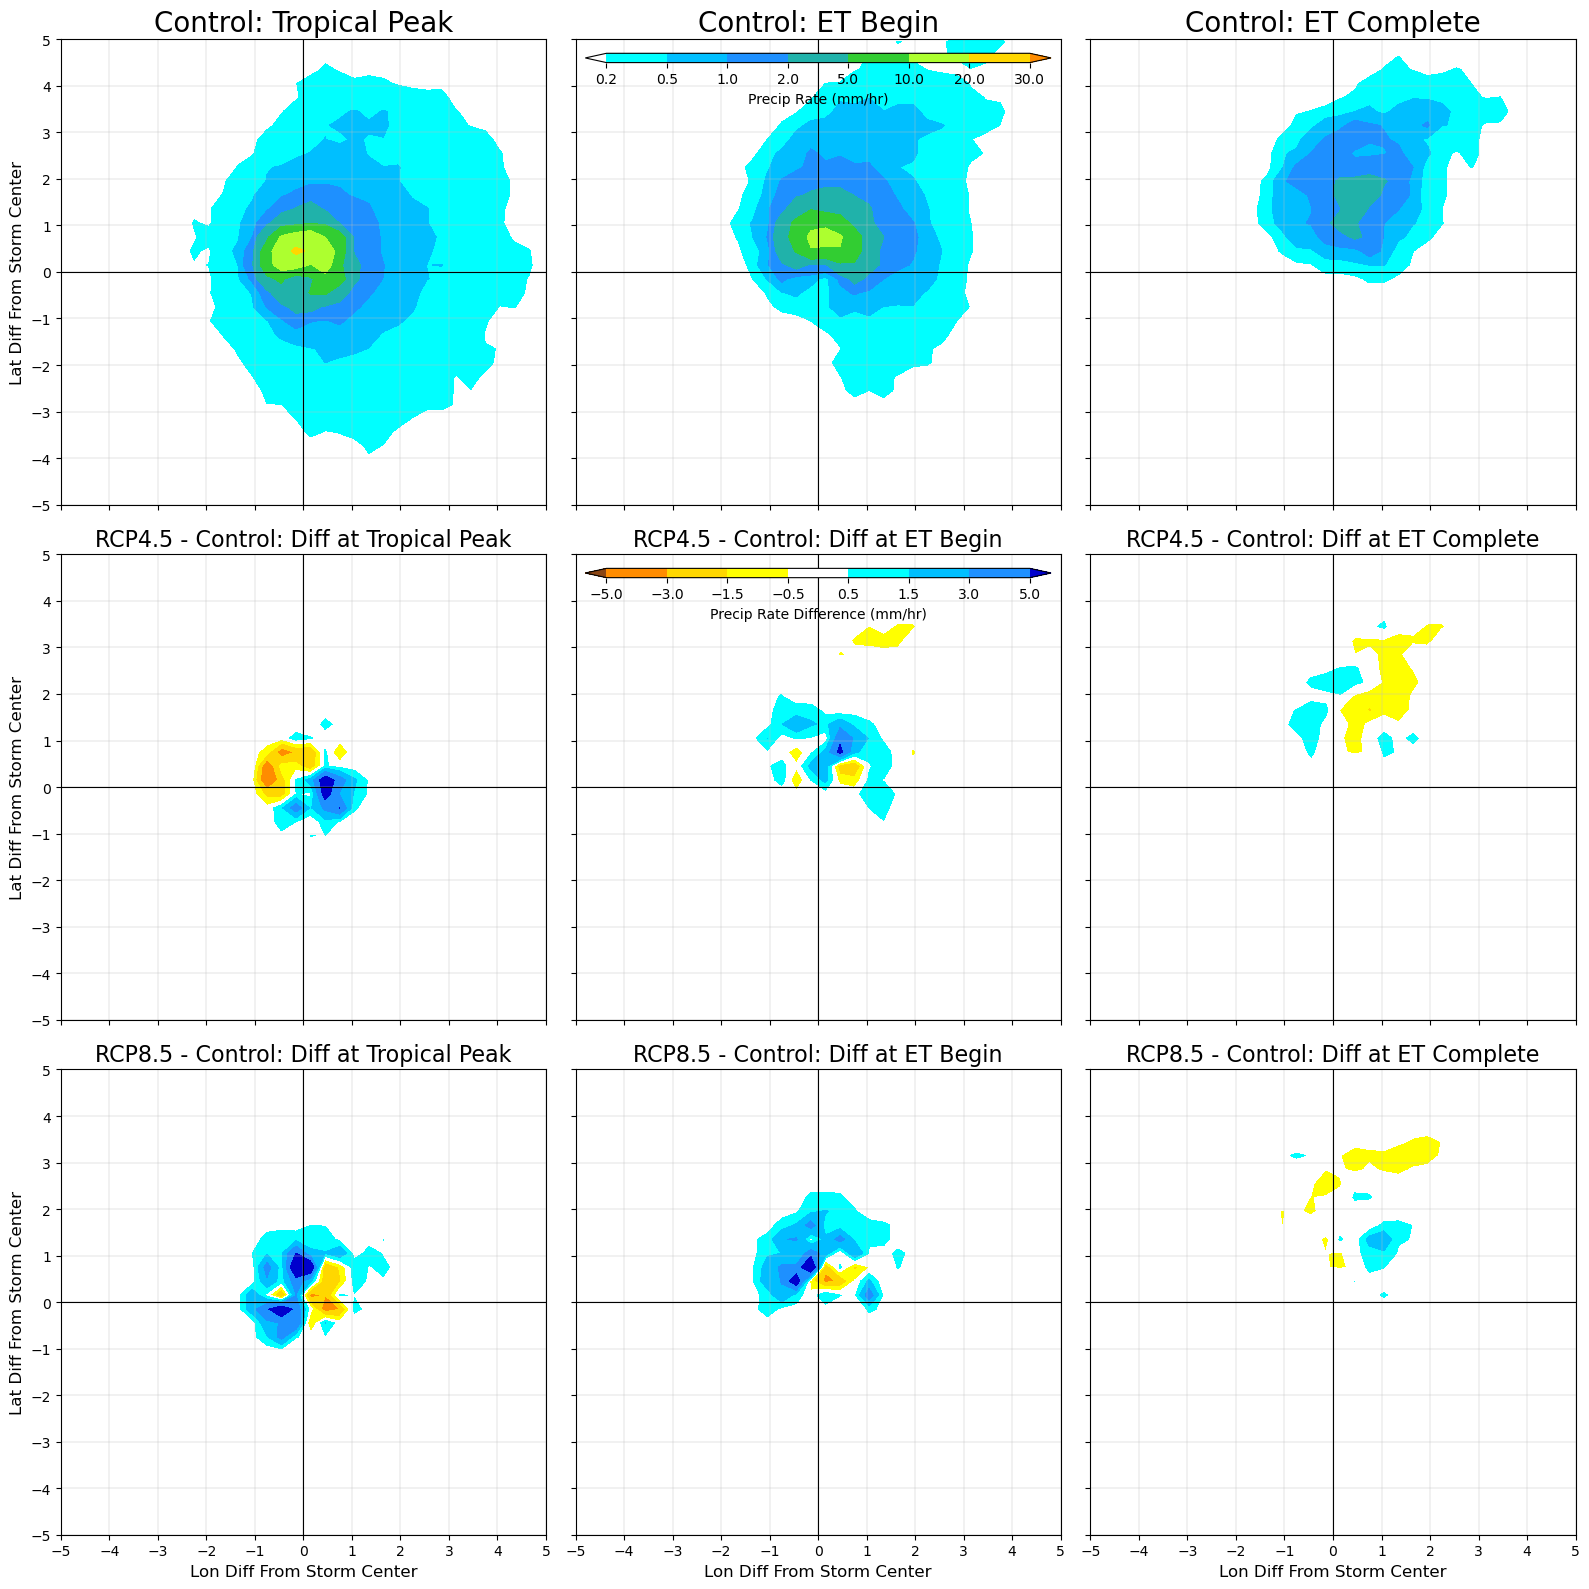

In [53]:
# Plot Median Precip Rate Difference Snapshots
Snap_Diff_Plots("Precip Rate", [Control_Precip_Rate_Snap_Median, RCP45_Precip_Rate_Snap_Median, RCP85_Precip_Rate_Snap_Median], \
Control_A_Compo_nc, Time_Labels, Precip_Rate_Bounds, Precip_Rate_Colours, \
Precip_Rate_Diff_Bounds, Precip_Rate_Diff_Colours, True, 'Precip_Rate_Snaps_Diff_Median.png')

In [54]:
# Calculate Median Precipitable Water Snapshots
Control_Precip_Water_Snap_Median = Snaps_Combine("Precipitable Water", Control_Subset_Codes, Control_Data, Control_ET, \
Control_Compo, Control_A_Compo_nc, Control_B_Compo_nc, Control_C_Compo_nc, 50)
RCP45_Precip_Water_Snap_Median = Snaps_Combine("Precipitable Water", RCP45_Subset_Codes, RCP45_Data, RCP45_ET, \
RCP45_Compo, RCP45_A_Compo_nc, RCP45_B_Compo_nc, RCP45_C_Compo_nc, 50)
RCP85_Precip_Water_Snap_Median = Snaps_Combine("Precipitable Water", RCP85_Subset_Codes, RCP85_Data, RCP85_ET, \
RCP85_Compo, RCP85_A_Compo_nc, RCP85_B_Compo_nc, RCP85_C_Compo_nc, 50)

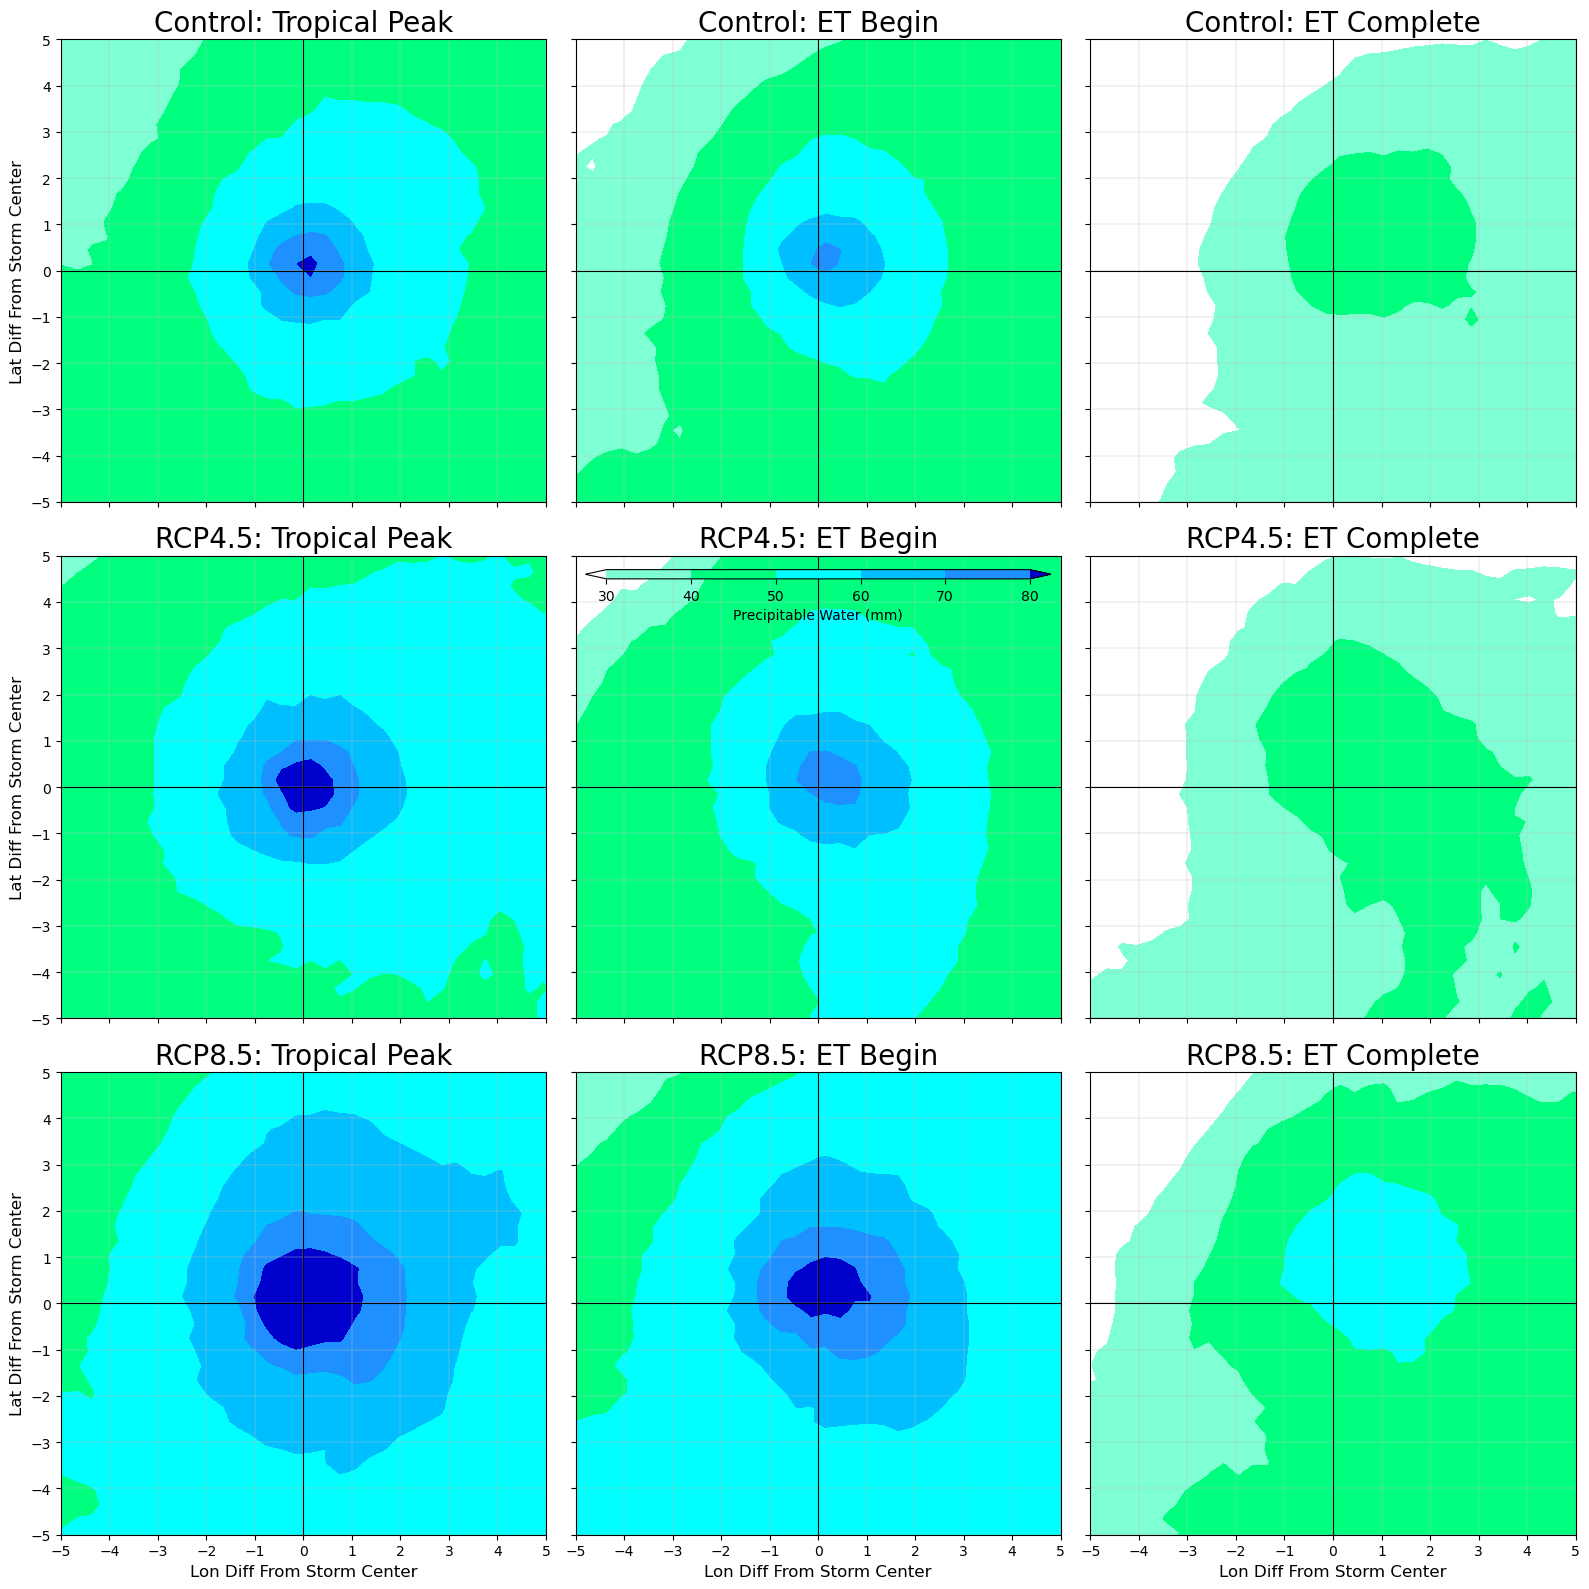

In [55]:
# Plot Median Precipitable Water Snapshots
Snap_Plots("Precipitable Water", [Control_Precip_Water_Snap_Median, RCP45_Precip_Water_Snap_Median, RCP85_Precip_Water_Snap_Median], \
Control_A_Compo_nc, Time_Labels, Precip_Water_Bounds, Precip_Water_Colours, True, 'Precip_Water_Snaps_Median.png')

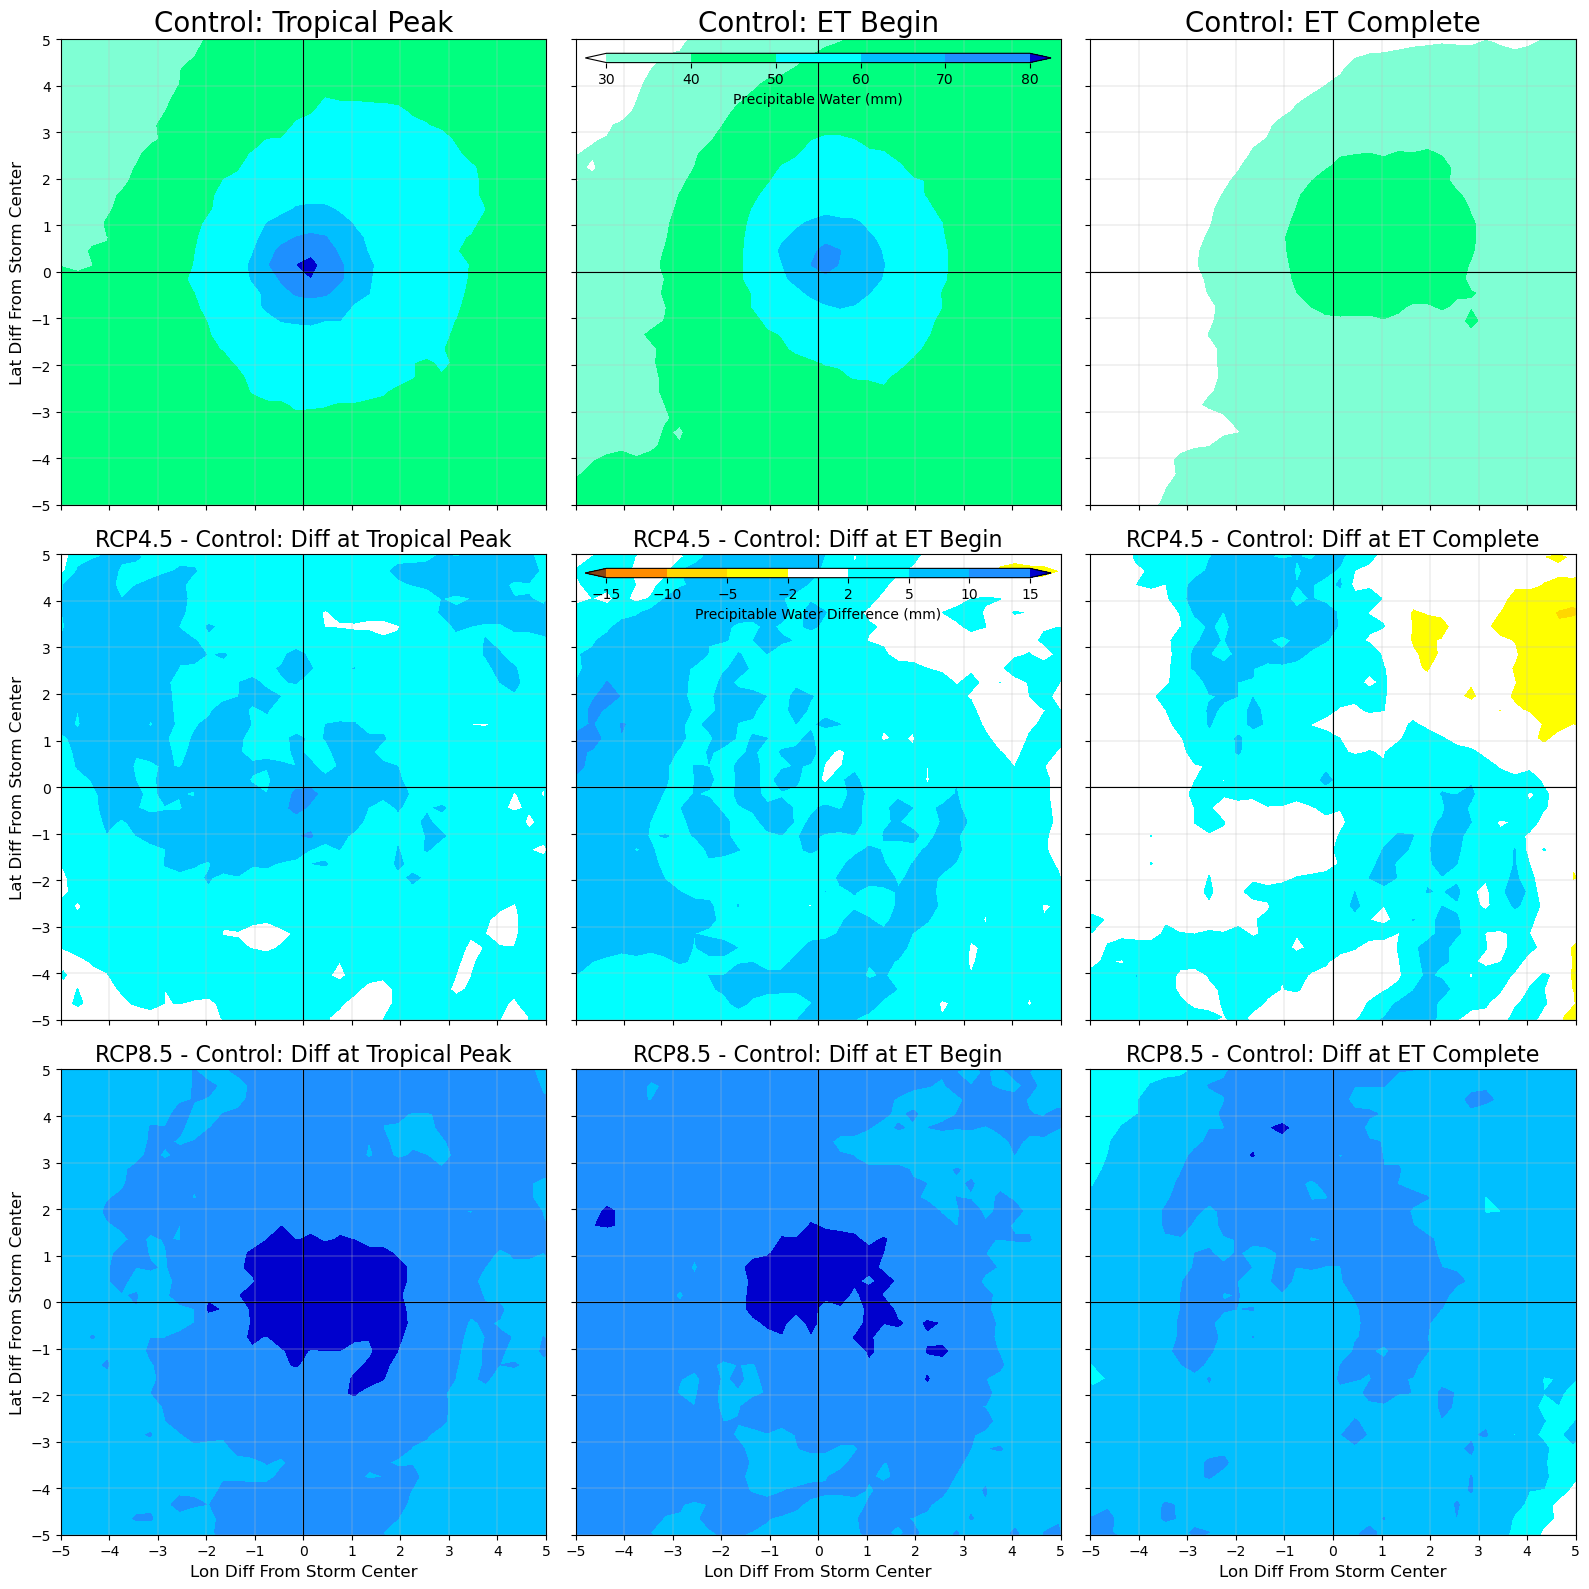

In [56]:
# Plot Median Precip Water Difference Snapshots
Snap_Diff_Plots("Precipitable Water", [Control_Precip_Water_Snap_Median, RCP45_Precip_Water_Snap_Median, RCP85_Precip_Water_Snap_Median], \
Control_A_Compo_nc, Time_Labels, Precip_Water_Bounds, Precip_Water_Colours, \
Precip_Water_Diff_Bounds, Precip_Water_Diff_Colours, True, 'Precip_Water_Snaps_Diff_Median.png')

In [57]:
# Calculate 75th Percentile Windspeed Snapshots
Control_Wind_Snap_75 = Snaps_Combine("850hPa Windspeed", Control_Subset_Codes, Control_Data, Control_ET, \
Control_Compo, Control_A_Compo_nc, Control_B_Compo_nc, Control_C_Compo_nc, 75)
RCP45_Wind_Snap_75 = Snaps_Combine("850hPa Windspeed", RCP45_Subset_Codes, RCP45_Data, RCP45_ET, \
RCP45_Compo, RCP45_A_Compo_nc, RCP45_B_Compo_nc, RCP45_C_Compo_nc, 75)
RCP85_Wind_Snap_75 = Snaps_Combine("850hPa Windspeed", RCP85_Subset_Codes, RCP85_Data, RCP85_ET, \
RCP85_Compo, RCP85_A_Compo_nc, RCP85_B_Compo_nc, RCP85_C_Compo_nc, 75)

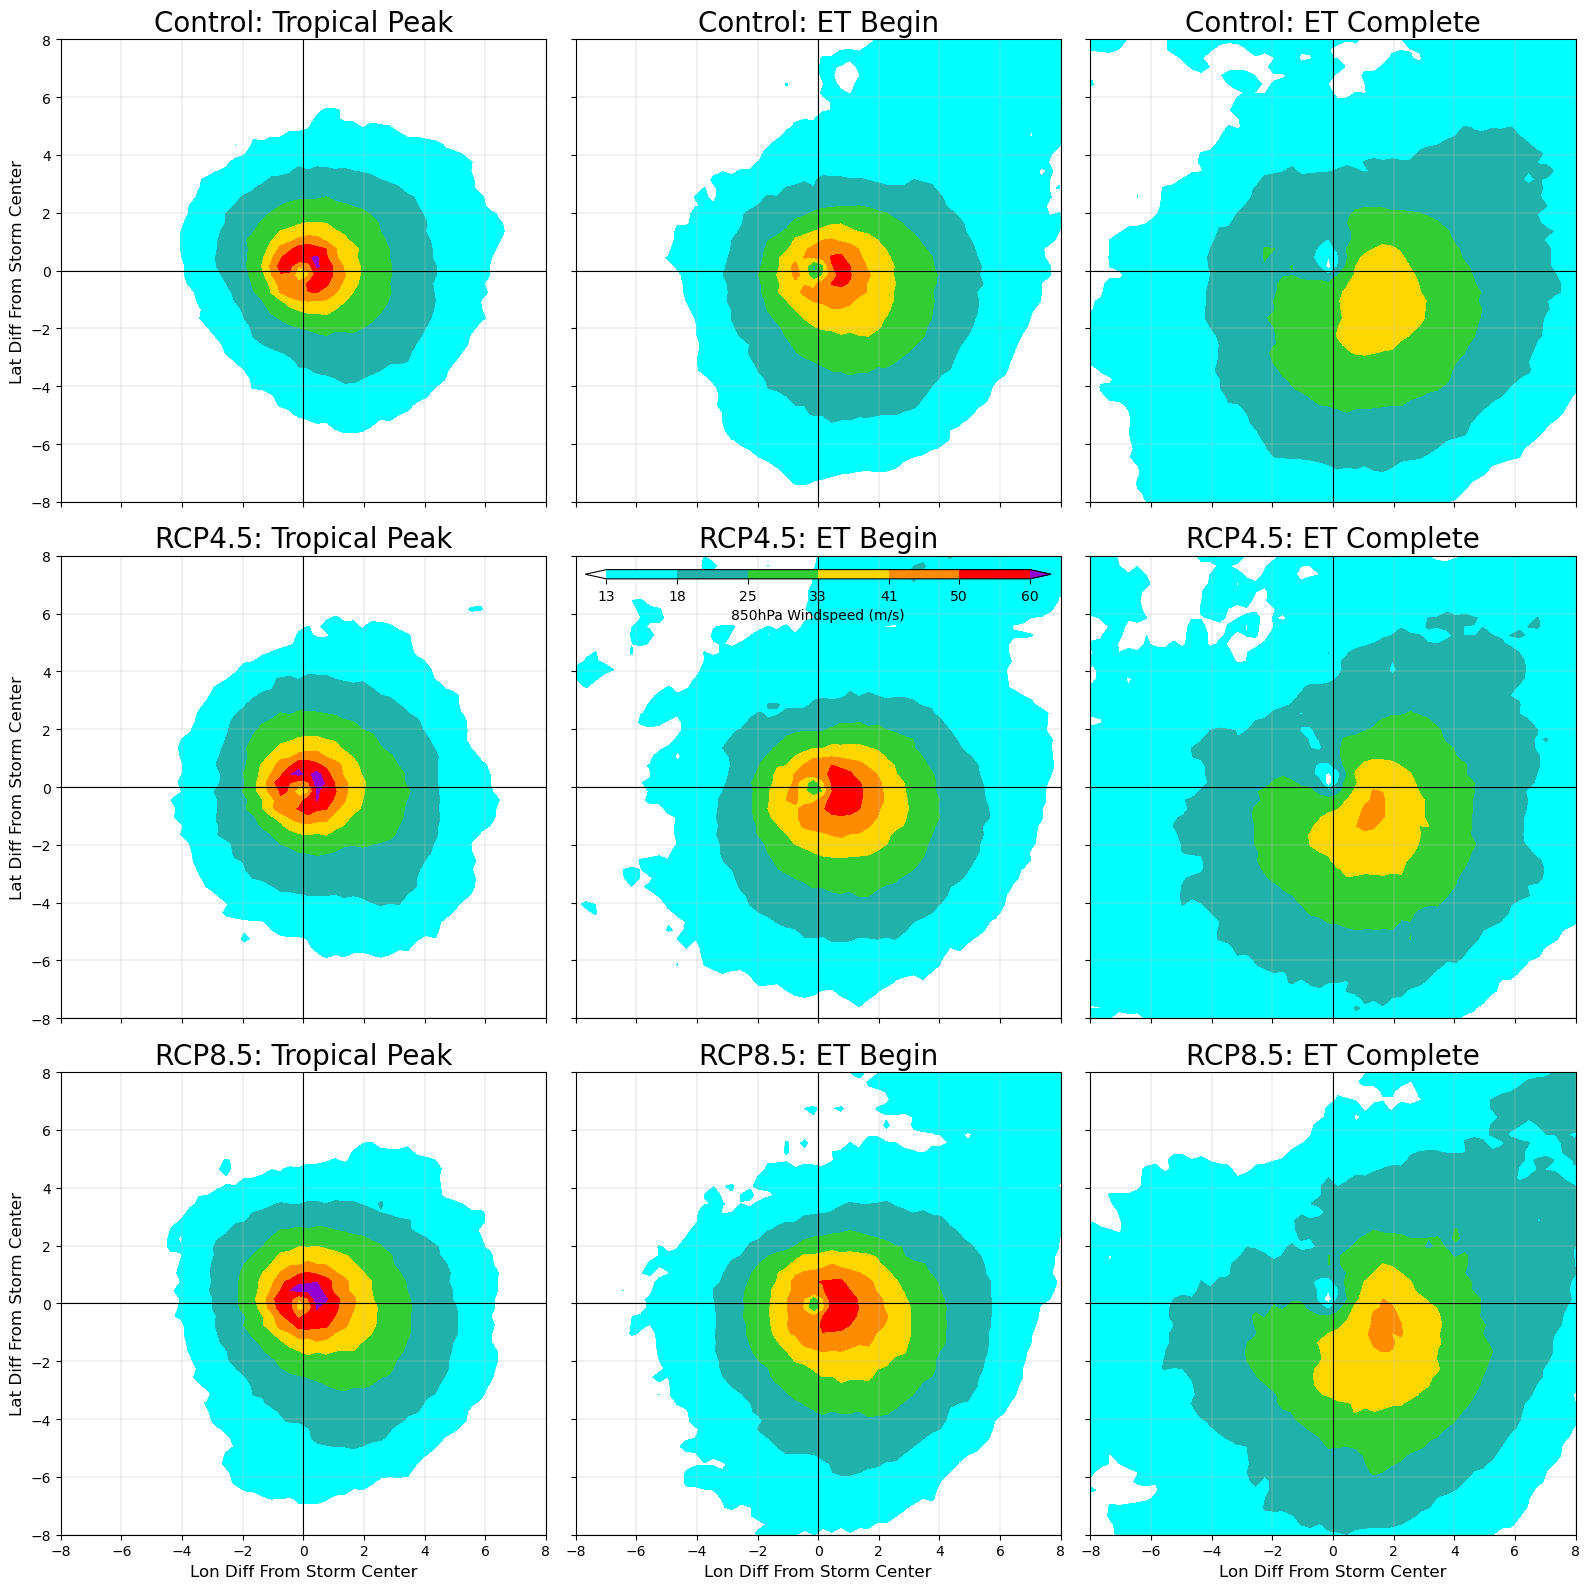

In [58]:
# Plot 75th Percentile Windspeed Snapshots
Snap_Plots("850hPa Windspeed", [Control_Wind_Snap_75, RCP45_Wind_Snap_75, RCP85_Wind_Snap_75], \
Control_A_Compo_nc, Time_Labels, Windspeed_Bounds, Windspeed_Colours, True, 'Wind_Snaps_75%.png')

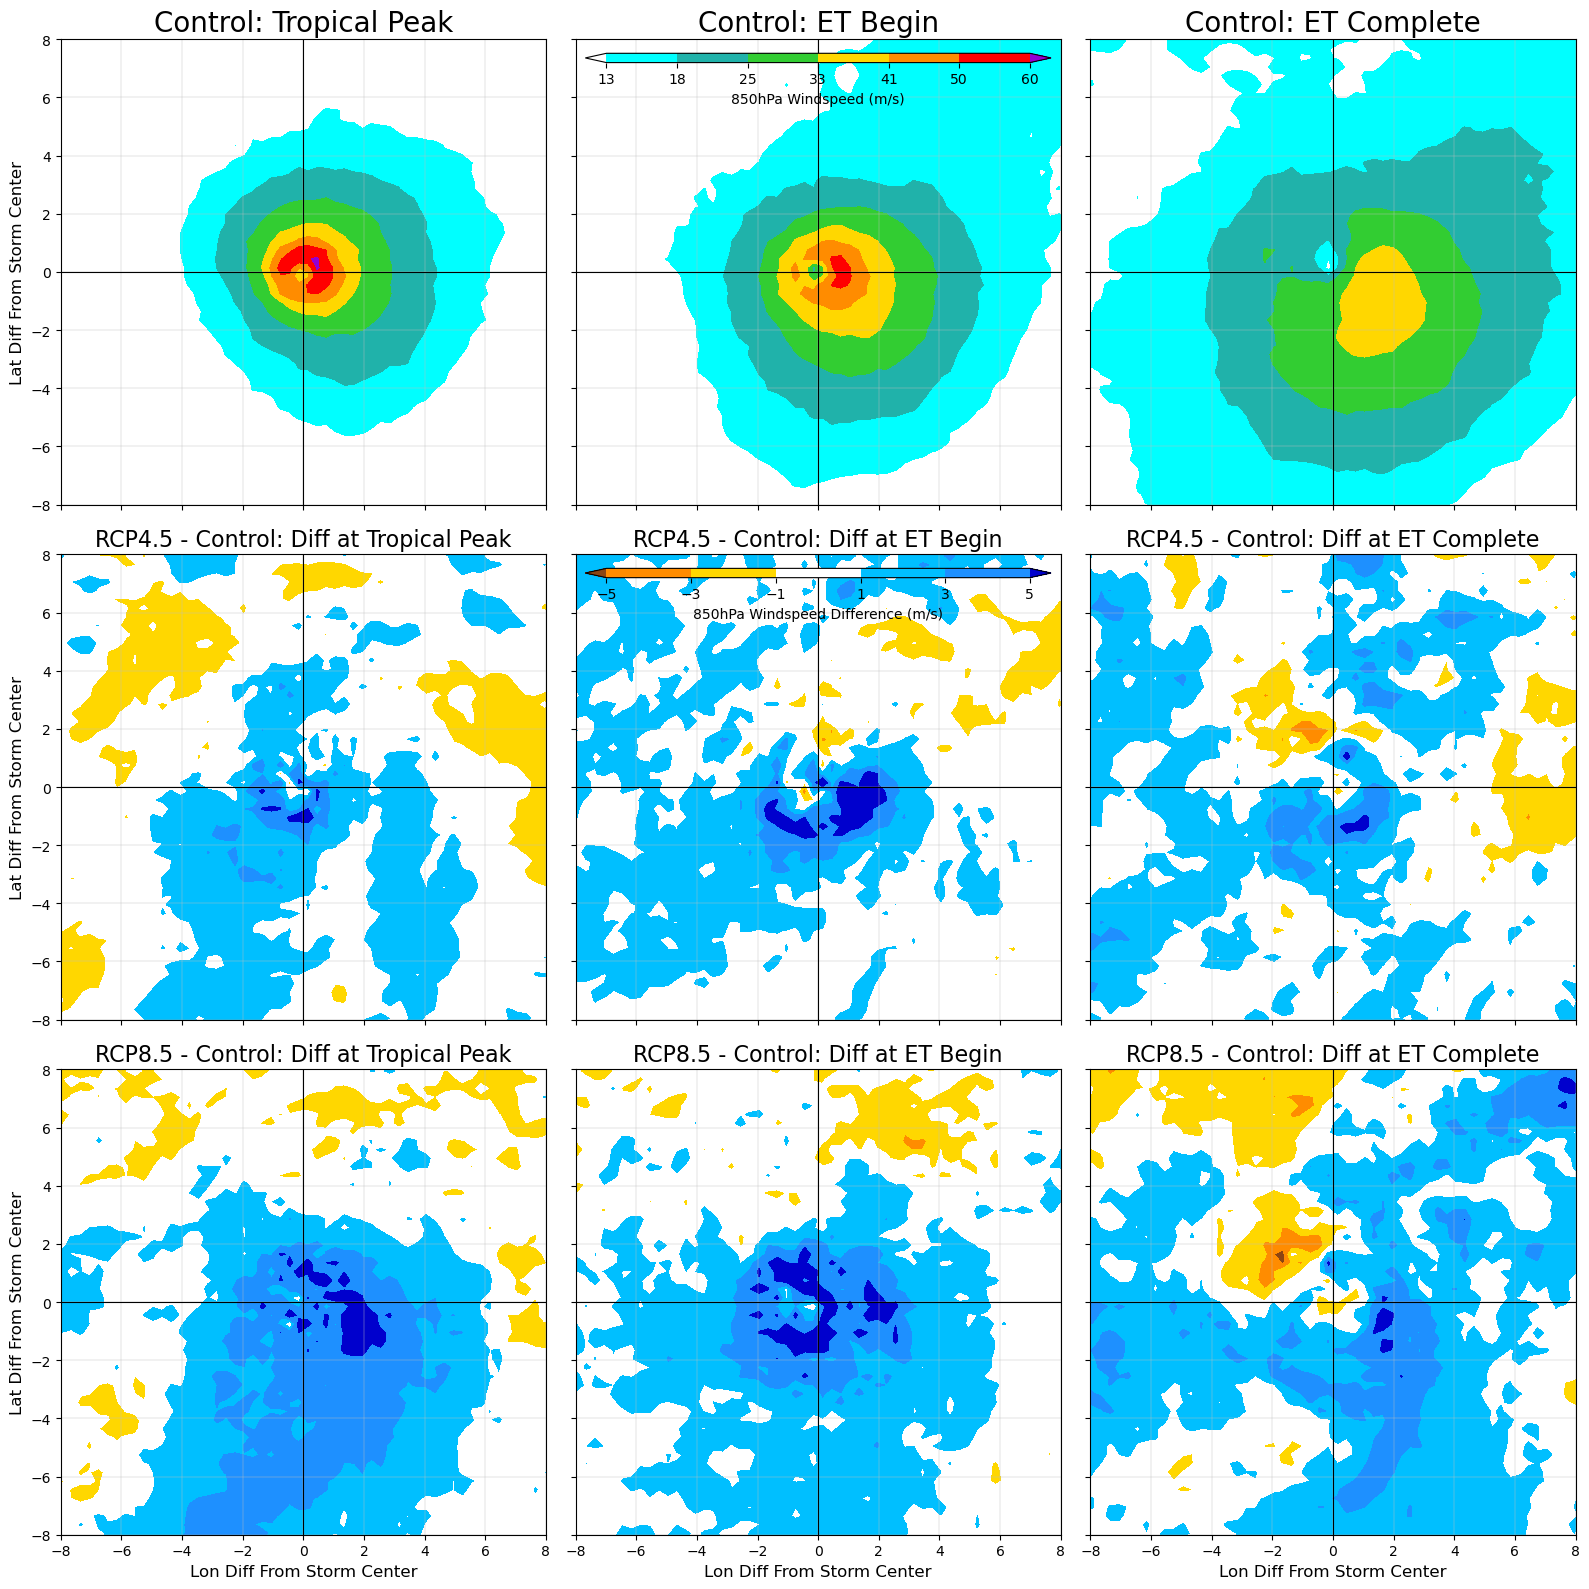

In [59]:
# Plot 75th Percentile Windspeed Difference Snapshots
Snap_Diff_Plots("850hPa Windspeed", [Control_Wind_Snap_75, RCP45_Wind_Snap_75, RCP85_Wind_Snap_75], \
Control_A_Compo_nc, Time_Labels, Windspeed_Bounds, Windspeed_Colours, \
Wind_Diff_Bounds, Wind_Diff_Colours, True, 'Wind_Snaps_Diff_75%.png')

In [60]:
# Calculate 75th Percentile Precip Rate Snapshots
Control_Precip_Rate_Snap_75 = Snaps_Combine("Precip Rate", Control_Subset_Codes, Control_Data, Control_ET, \
Control_Compo, Control_A_Compo_nc, Control_B_Compo_nc, Control_C_Compo_nc, 75)
RCP45_Precip_Rate_Snap_75 = Snaps_Combine("Precip Rate", RCP45_Subset_Codes, RCP45_Data, RCP45_ET, \
RCP45_Compo, RCP45_A_Compo_nc, RCP45_B_Compo_nc, RCP45_C_Compo_nc, 75)
RCP85_Precip_Rate_Snap_75 = Snaps_Combine("Precip Rate", RCP85_Subset_Codes, RCP85_Data, RCP85_ET, \
RCP85_Compo, RCP85_A_Compo_nc, RCP85_B_Compo_nc, RCP85_C_Compo_nc, 75)

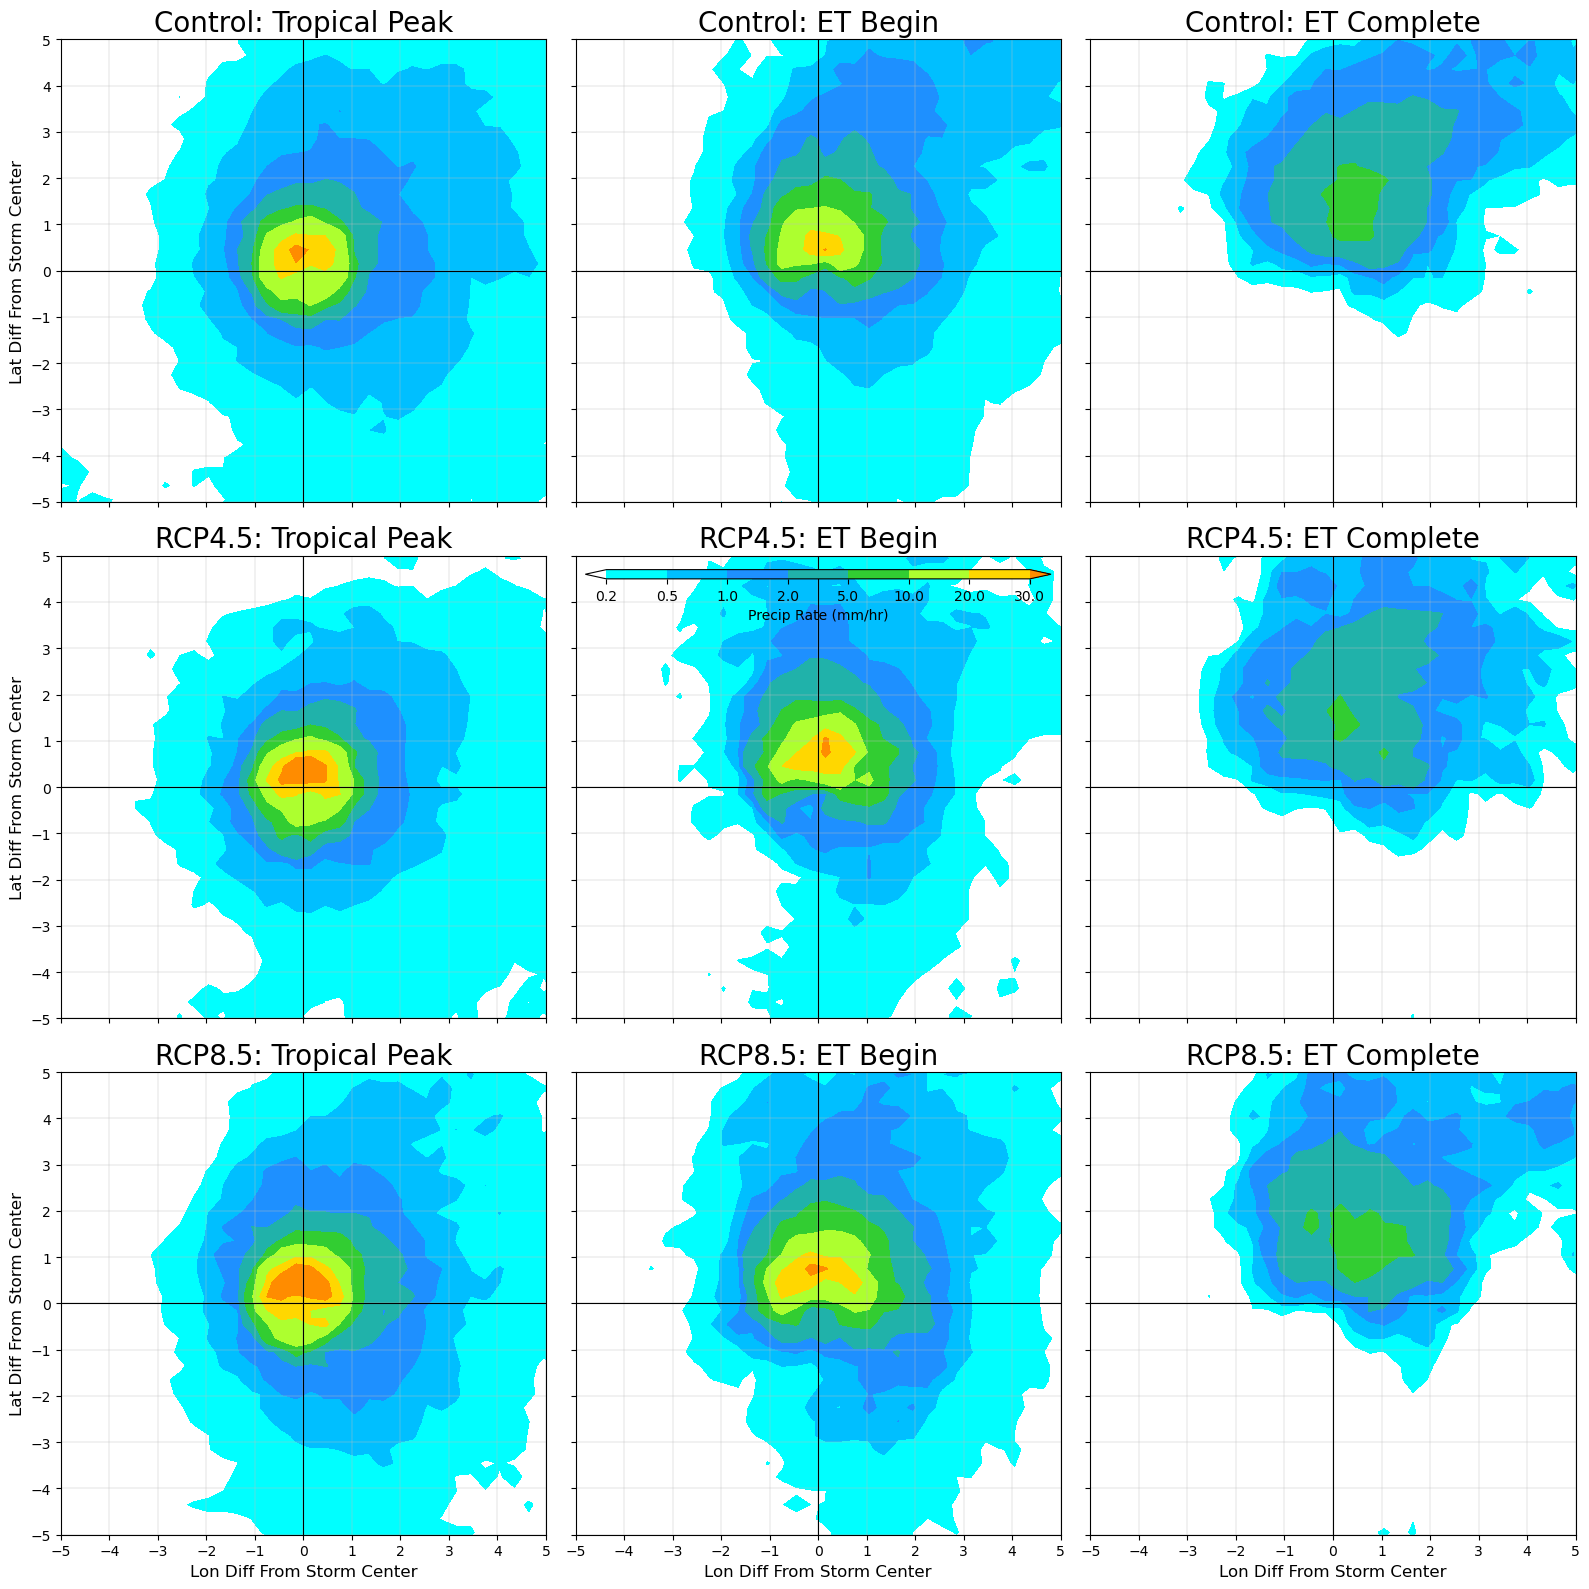

In [61]:
# Plot 75th Percentile Precip Rate Snapshots
Snap_Plots("Precip Rate", [Control_Precip_Rate_Snap_75, RCP45_Precip_Rate_Snap_75, RCP85_Precip_Rate_Snap_75], \
Control_A_Compo_nc, Time_Labels, Precip_Rate_Bounds, Precip_Rate_Colours, True, 'Precip_Rate_Snaps_75%.png')

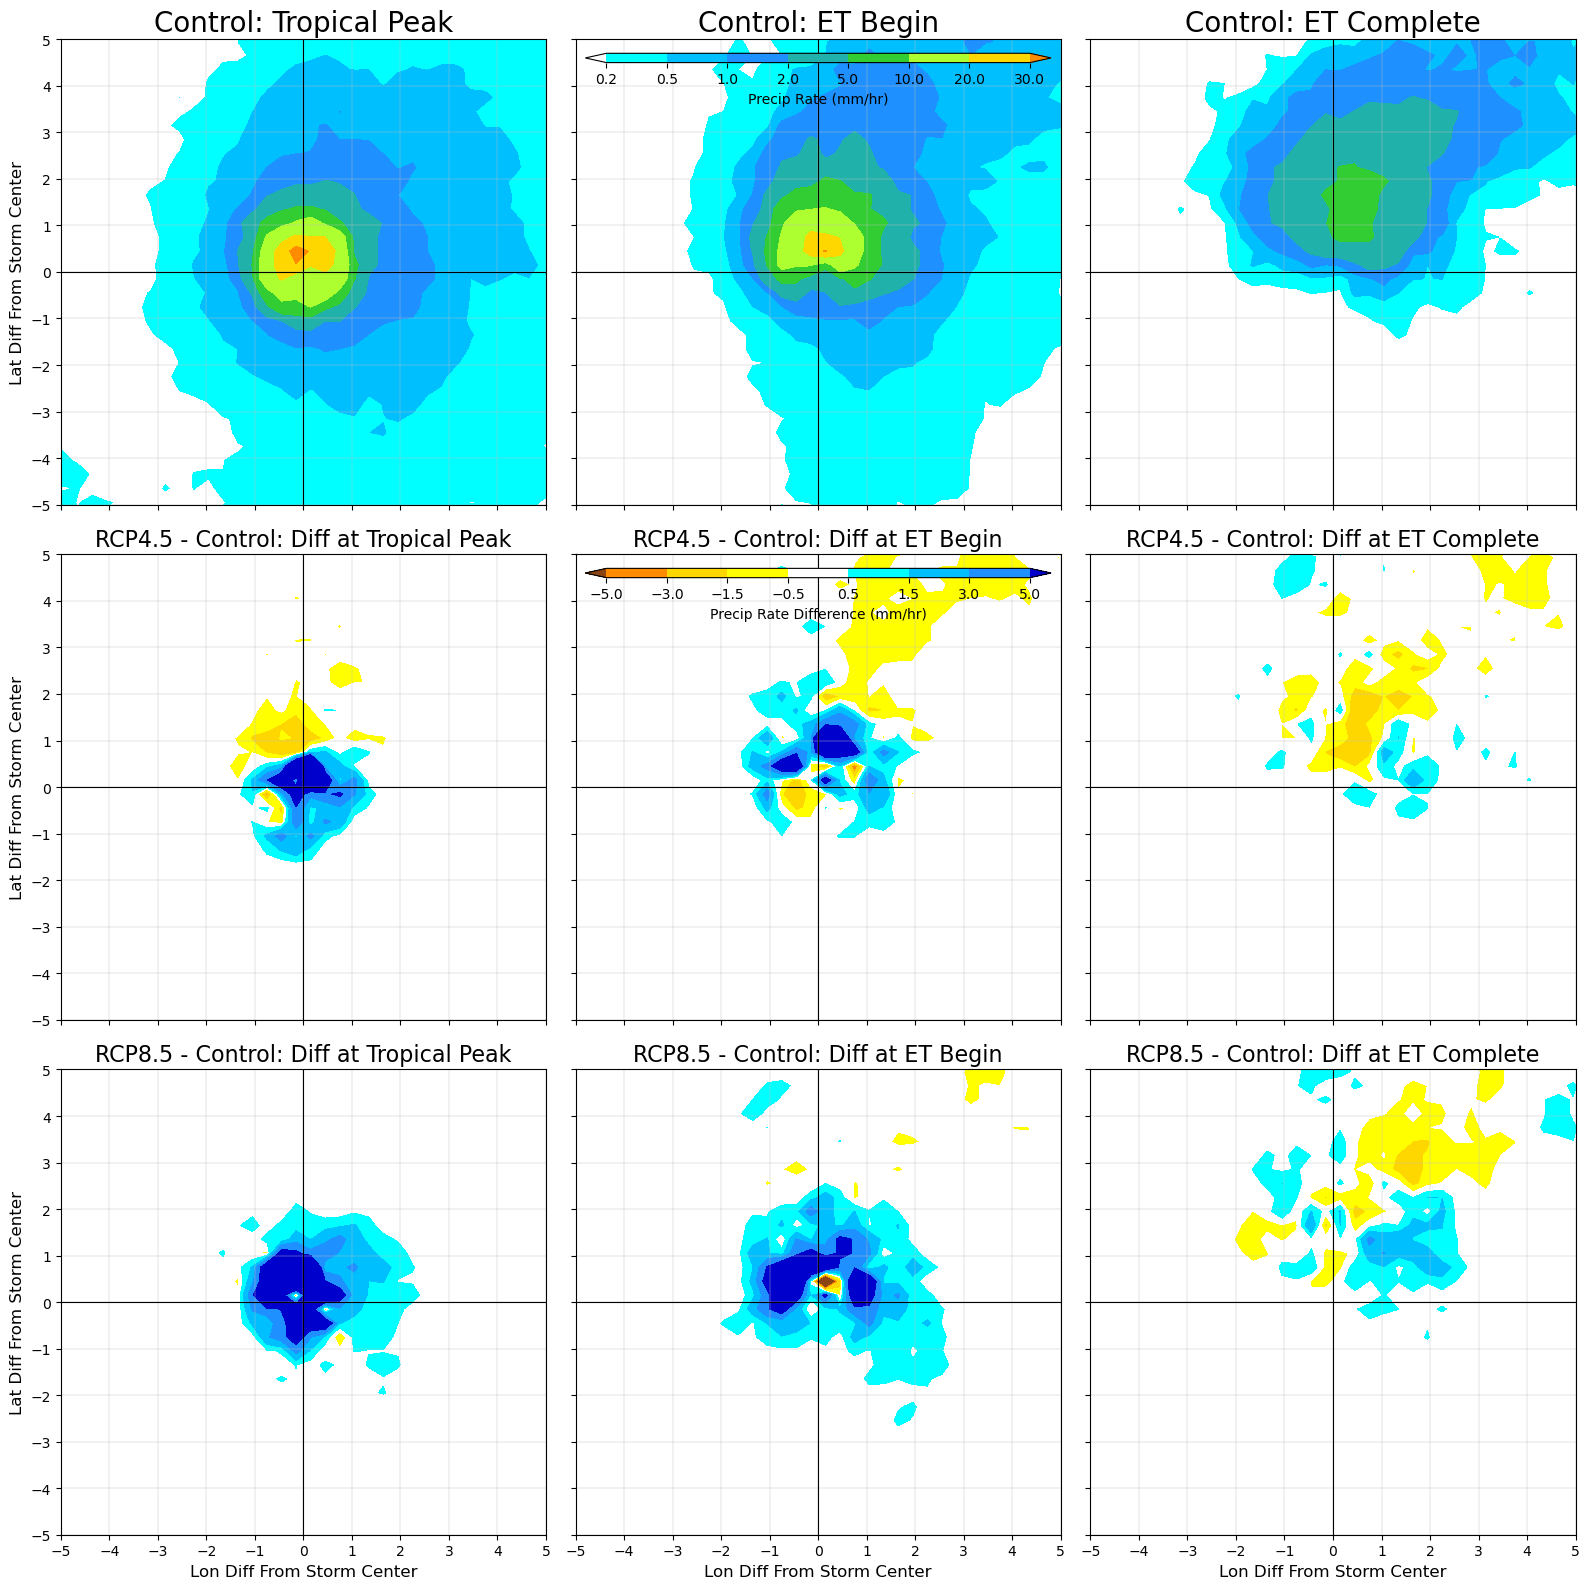

In [62]:
# Plot 75th Percentile Precip Rate Difference Snapshots
Snap_Diff_Plots("Precip Rate", [Control_Precip_Rate_Snap_75, RCP45_Precip_Rate_Snap_75, RCP85_Precip_Rate_Snap_75], \
Control_A_Compo_nc, Time_Labels, Precip_Rate_Bounds, Precip_Rate_Colours, \
Precip_Rate_Diff_Bounds, Precip_Rate_Diff_Colours, True, 'Precip_Rate_Snaps_Diff_75%.png')

In [63]:
# Calculate 75th Percentile Precipitable Water Snapshots
Control_Precip_Water_Snap_75 = Snaps_Combine("Precipitable Water", Control_Subset_Codes, Control_Data, Control_ET, \
Control_Compo, Control_A_Compo_nc, Control_B_Compo_nc, Control_C_Compo_nc, 75)
RCP45_Precip_Water_Snap_75 = Snaps_Combine("Precipitable Water", RCP45_Subset_Codes, RCP45_Data, RCP45_ET, \
RCP45_Compo, RCP45_A_Compo_nc, RCP45_B_Compo_nc, RCP45_C_Compo_nc, 75)
RCP85_Precip_Water_Snap_75 = Snaps_Combine("Precipitable Water", RCP85_Subset_Codes, RCP85_Data, RCP85_ET, \
RCP85_Compo, RCP85_A_Compo_nc, RCP85_B_Compo_nc, RCP85_C_Compo_nc, 75)

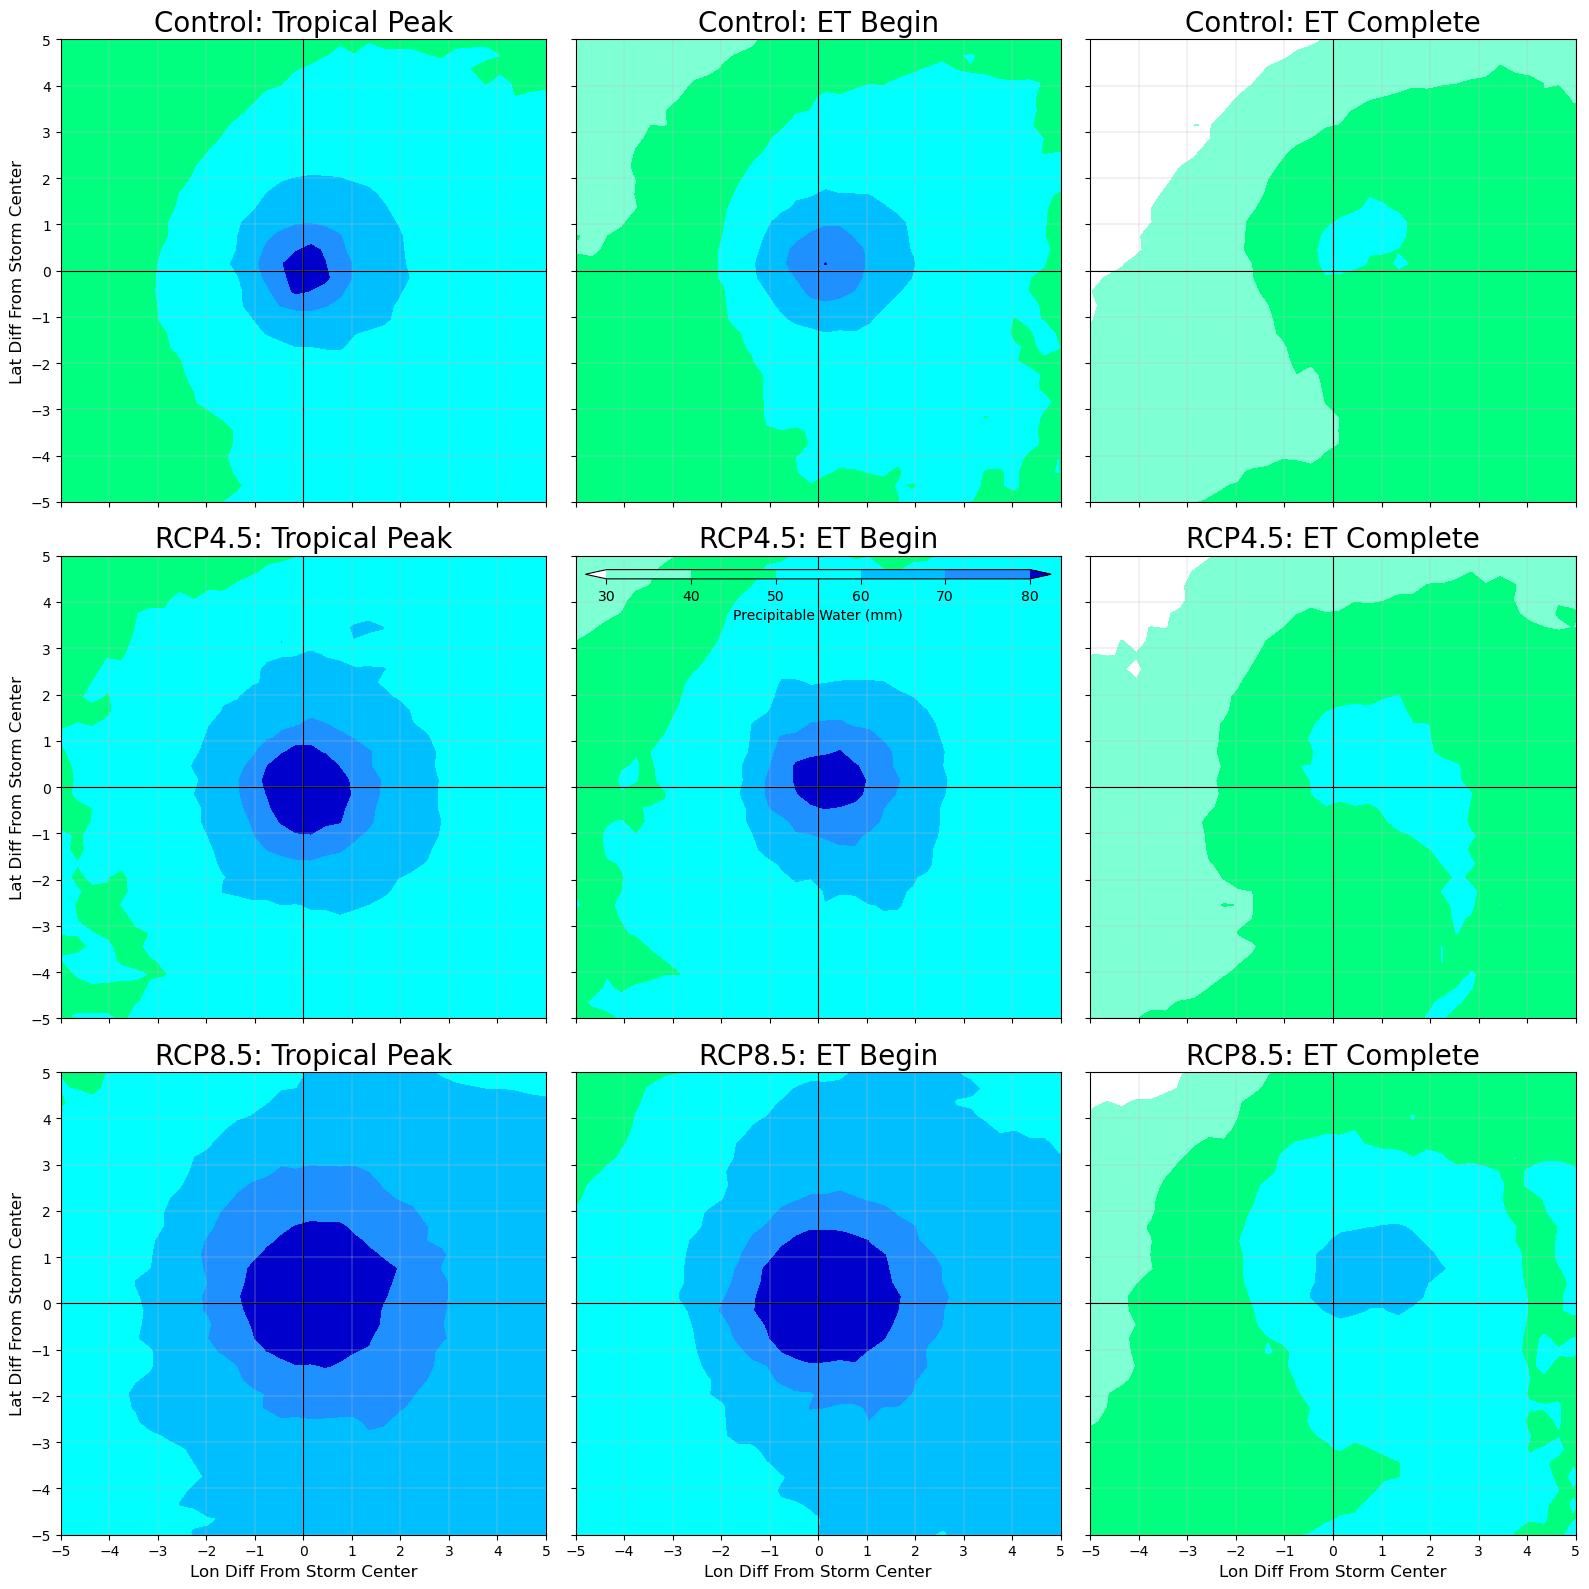

In [64]:
# Plot 75th Percentile Precipitable Water Snapshots
Snap_Plots("Precipitable Water", [Control_Precip_Water_Snap_75, RCP45_Precip_Water_Snap_75, RCP85_Precip_Water_Snap_75], \
Control_A_Compo_nc, Time_Labels, Precip_Water_Bounds, Precip_Water_Colours, True, 'Precip_Water_Snaps_75%.png')

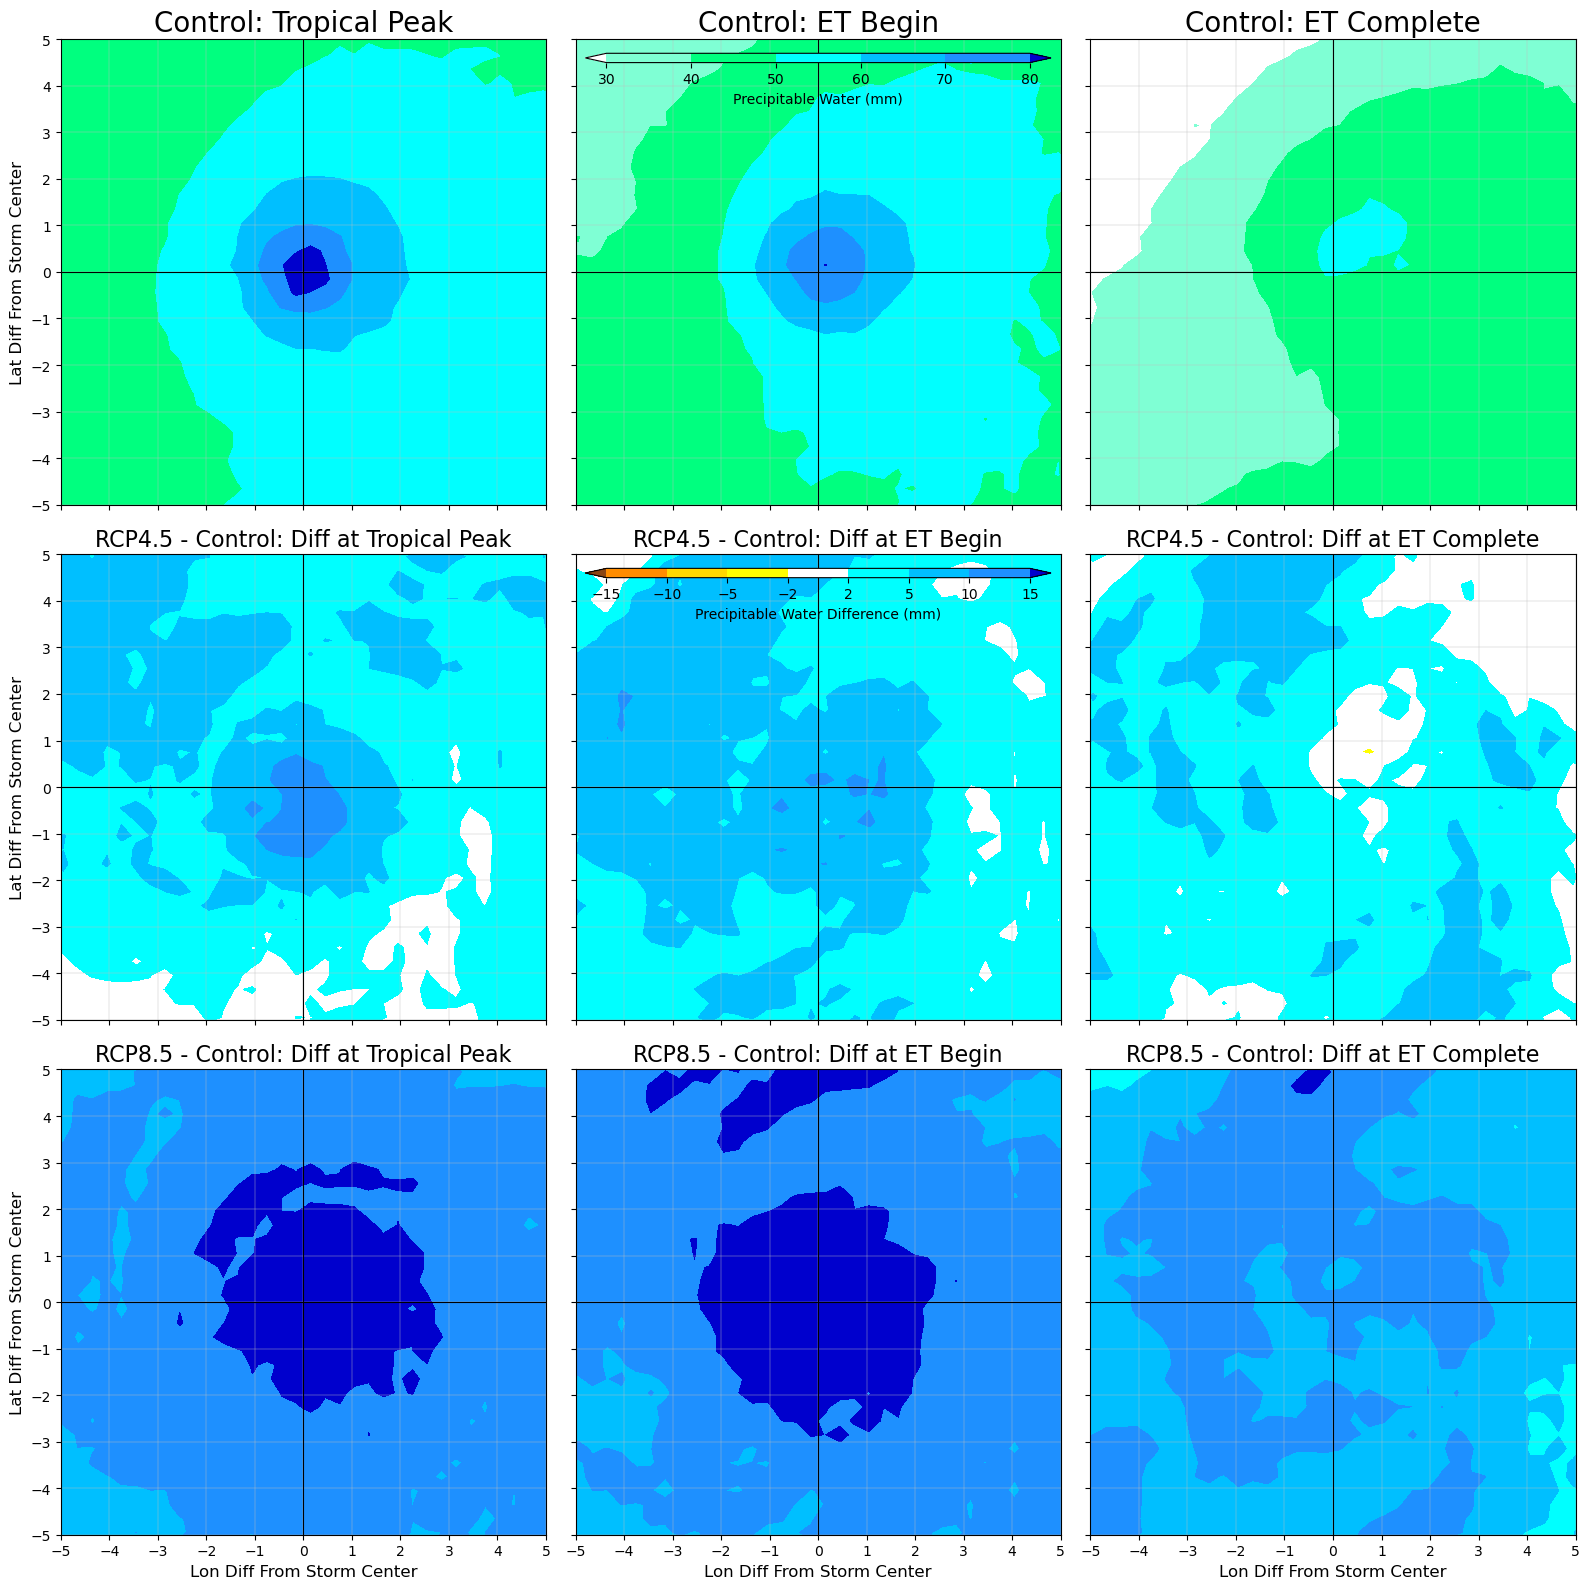

In [65]:
# Plot 75th Percentile Precip Water Difference Snapshots
Snap_Diff_Plots("Precipitable Water", [Control_Precip_Water_Snap_75, RCP45_Precip_Water_Snap_75, RCP85_Precip_Water_Snap_75], \
Control_A_Compo_nc, Time_Labels, Precip_Water_Bounds, Precip_Water_Colours, \
Precip_Water_Diff_Bounds, Precip_Water_Diff_Colours, True, 'Precip_Water_Snaps_Diff_75%.png')